# Clustering Using Machine Learning & Forecast Feature Pirce Using Deep Learning

In [1]:
!pip install plotly

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.6/15.6 MB 83.1 MB/s eta 0:00:0000:0100:01


In [2]:
!pip install tensorflow_decision_forests

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 64.0 MB/s eta 0:00:0000:010:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 5.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 102.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 102.7 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 81.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 82.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 117.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 66.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 304.5/304.5 kB 65.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 107.6 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 1.12
    Uninstalling flatbuffers-1.12:
      Successfully uninstalle

In [3]:
pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 15.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 104.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.9/233.9 kB 63.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 71.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.6/36.6 MB 47.4 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.3
    Uninstalling numpy-1.26.3:
      Successfully uninstalled numpy-1.26.3
  Attempting uninstall: scipy
    Found existing installation: scipy 1.9.2
    Uninstalling scipy-1.9.2:
      Successfully uninstalled scipy-1.9.2
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install db_dtypes

Note: you may need to restart the kernel to use updated packages.


## Import Library

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
%matplotlib inline
from datetime import datetime # we use this for its built-in function called to_datetime()that converts date and time in string format to a DateTime object.
from datetime import timedelta

# TensorFlow for Deep Learning (Neural Network)
import sklearn
import warnings
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2

print(f"Found TensorFlow version: {tf.__version__}")

# Machine Learning
from scipy import stats
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn import svm
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import norm  # Add this line to import norm

Found TensorFlow version: 2.15.0


## Exploring And Wrangling Data

In [8]:
!ls /datasets/clusteringdata2

df_trans.pickle


In [9]:
df = pd.read_pickle("/datasets/clusteringdata2/df_trans.pickle")
df.head()

po_number transaction_date  order_id order_status  \
0  PO-2022-12-12-8804434       2022-12-12    463776      Selesai   
1  PO-2022-10-11-4866339       2022-10-11    426155      Selesai   
2  PO-2022-10-11-4866339       2022-10-11    426155      Selesai   
3  PO-2022-10-11-4866339       2022-10-11    426155      Selesai   
4  PO-2022-10-11-4866339       2022-10-11    426155      Selesai   

  payment_group shipping_agency  shipping_cost  total_project_value  revenue  \
0           TOP       mandiriva              0             53280000   399600   
1           TOP       mps-briva              0             78775501   590816   
2           TOP       mps-briva              0             78775501   590816   
3           TOP       mps-briva              0             78775501   590816   
4           TOP       mps-briva              0             78775501   590816   

                  seller_id  ...  \
0                      None  ...   
1  631a50645b9755003d24d6b9  ...   
2  631a50645b9755003d24d6b9  ...   
3  631a50645b9755003d24d6b9  ...   
4  631a50645b9755003d24d6b9  ...   

                                       product_name                 main_cat  \
0               Oli Compressor ATLAS Synthetic base              Pertukangan   
1  Neonbox LED dengan tiang Saung Pananjung Bandung         Jasa Advertising   
2          Wallpaper Ayam Goreng Bang Toung Jakarta  Jasa Percetakan & Media   
3               Backdrop Pondok Indah Cipala Banten  Jasa Percetakan & Media   
4              Alas Meja Pondok Indah Cipala Banten  Jasa Percetakan & Media   

            brand price_per_item quantity price_total free_shipping      ppn  \
0  ROTO Synthetic     16000000.0        3    48000000          True  5280000   
1            None      6000000.0        1     6000000          True   660000   
2            None      2348760.0        1     2348760          True   258364   
3            None      1898750.0        1     1898750          True   208862   
4            None      1021410.0        1     1021410          True   112355   

  weight_total unit  
0        90000  pcs  
1        17500  pcs  
2        10967  pcs  
3         6767  pcs  
4         3440  pcs  

[5 rows x 29 columns]

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 474570 entries, 0 to 474569
Data columns (total 29 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   po_number            474570 non-null  object 
 1   transaction_date     474570 non-null  dbdate 
 2   order_id             474570 non-null  Int64  
 3   order_status         474570 non-null  object 
 4   payment_group        474570 non-null  object 
 5   shipping_agency      474570 non-null  object 
 6   shipping_cost        474570 non-null  Int64  
 7   total_project_value  474570 non-null  Int64  
 8   revenue              474570 non-null  Int64  
 9   seller_id            474559 non-null  object 
 10  seller_category      474559 non-null  object 
 11  buyer_id             474570 non-null  object 
 12  seller_province      474559 non-null  object 
 13  seller_city          474559 non-null  object 
 14  seller_flag          474559 non-null  object 
 15  buyer_province   

In [11]:
df.isna().sum()

po_number                   0
transaction_date            0
order_id                    0
order_status                0
payment_group               0
shipping_agency             0
shipping_cost               0
total_project_value         0
revenue                     0
seller_id                  11
seller_category            11
buyer_id                    0
seller_province            11
seller_city                11
seller_flag                11
buyer_province           4623
buyer_city               4623
buyer_flag               4623
product_id                  0
product_name                0
main_cat                   15
brand                  239572
price_per_item              0
quantity                    0
price_total                 0
free_shipping               0
ppn                         0
weight_total                0
unit                       69
dtype: int64

In [12]:
df.duplicated().sum()

302

## Handling Data Missing Value And Data Manipulation

In [13]:
# looping untuk mendapatkan nama kolom dengan nilai yang hilang
missing_columns = []

for column in df.columns:
    if df[column].isnull().any():
        missing_columns.append(f"{column}: {df[column].dtype}")

print("Kolom dengan nilai yang hilang:")
for col in missing_columns:
    print(col)

Kolom dengan nilai yang hilang:
seller_id: object
seller_category: object
seller_province: object
seller_city: object
seller_flag: object
buyer_province: object
buyer_city: object
buyer_flag: object
main_cat: object
brand: object
unit: object


In [14]:
df[['seller_id','seller_category','seller_province','seller_city','seller_flag','buyer_province','buyer_city','buyer_flag','main_cat','brand','unit']]

seller_id seller_category seller_province  \
0                           None            None            None   
1       631a50645b9755003d24d6b9           Kecil         Jakarta   
2       631a50645b9755003d24d6b9           Kecil         Jakarta   
3       631a50645b9755003d24d6b9           Kecil         Jakarta   
4       631a50645b9755003d24d6b9           Kecil         Jakarta   
...                          ...             ...             ...   
474565  63aa70cbcb47446d5bdef77a           Mikro         Jakarta   
474566  63aa720fcb47446d5bdf1413           Mikro         Jakarta   
474567  63aa720fcb47446d5bdf1413           Mikro         Jakarta   
474568  63aa832bcb47446d5be0c3dd           Mikro          Banten   
474569  63aa832bcb47446d5be0c3dd           Mikro          Banten   

            seller_city seller_flag buyer_province       buyer_city  \
0                  None        None        Jakarta  Jakarta Selatan   
1       Jakarta Selatan      Seller        Jakarta    Jakarta Pusat   
2       Jakarta Selatan      Seller        Jakarta    Jakarta Pusat   
3       Jakarta Selatan      Seller        Jakarta    Jakarta Pusat   
4       Jakarta Selatan      Seller        Jakarta    Jakarta Pusat   
...                 ...         ...            ...              ...   
474565    Jakarta Pusat      Seller           None             None   
474566    Jakarta Pusat      Seller        Jakarta    Jakarta Pusat   
474567    Jakarta Pusat      Seller        Jakarta    Jakarta Pusat   
474568   Kab. Tangerang      Seller           None             None   
474569   Kab. Tangerang      Seller           None             None   

       buyer_flag                 main_cat           brand  unit  
0           Buyer              Pertukangan  ROTO Synthetic   pcs  
1           Buyer         Jasa Advertising            None   pcs  
2           Buyer  Jasa Percetakan & Media            None   pcs  
3           Buyer  Jasa Percetakan & Media            None   pcs  
4           Buyer  Jasa Percetakan & Media            None   pcs  
...           ...                      ...             ...   ...  
474565       None        Makanan & Minuman          TRIQUE   pcs  
474566      Buyer        Makanan & Minuman     FROZEN CB 8  pack  
474567      Buyer        Makanan & Minuman     FROZEN CB 8  pack  
474568       None           Barang Lainnya       Telkomsel   pcs  
474569       None           Barang Lainnya          I-Saku   pcs  

[474570 rows x 11 columns]

In [15]:
# Menampilkan baris-baris di mana 'main_cat' memiliki nilai null
df_null_main_cat = df[df['main_cat'].isna()]

# Menampilkan DataFrame hasil
print("\nBaris dengan Nilai Null pada Kolom 'main_cat':")
print(df_null_main_cat)


Baris dengan Nilai Null pada Kolom 'main_cat':
                    po_number transaction_date  order_id order_status  \
2636     PO-2022-06-23-131686       2022-06-23     44775      Selesai   
11535    PO-2022-08-01-149058       2022-08-01     53085      Selesai   
18683   PO-2022-11-12-8656790       2022-11-12    445252      Selesai   
124267    PO-2022-02-04-84007       2022-02-04    151112      Selesai   
212101   PO-2022-04-19-109806       2022-04-19    128500      Selesai   
212113   PO-2022-04-19-109806       2022-04-19    128500      Selesai   
212115   PO-2022-04-19-109806       2022-04-19    128500      Selesai   
212125   PO-2022-04-19-109806       2022-04-19    128500      Selesai   
212128   PO-2022-04-19-109806       2022-04-19    128500      Selesai   
212141   PO-2022-04-19-109806       2022-04-19    128500      Selesai   
212144   PO-2022-04-19-109806       2022-04-19    128500      Selesai   
212146   PO-2022-04-19-109806       2022-04-19    128500      Selesai   
212

In [16]:
handle_isna = df.copy()

#handle dengan mengganti data Kosong
handle_isna['brand'] = handle_isna['brand'].fillna('Product_Unknown')
handle_isna['seller_id'] = handle_isna['seller_id'].fillna('anonymous')
handle_isna['main_cat'] = handle_isna['main_cat'].fillna('Unknown')    
            
# Mengisi nilai yang hilang di kolom 'seller_category' dengan nilai mode
mode_seller_category = handle_isna['seller_category'].mode()[0]
handle_isna['seller_category'].fillna(mode_seller_category, inplace=True)
            
# Mengisi nilai yang hilang di kolom 'seller_province' dengan nilai mode
mode_seller_province = handle_isna['seller_province'].mode()[0]
handle_isna['seller_province'].fillna(mode_seller_province, inplace=True)
            
# Mengisi nilai yang hilang di kolom 'seller_city' dengan nilai mode
mode_seller_city = handle_isna['seller_city'].mode()[0]
handle_isna['seller_city'].fillna(mode_seller_city, inplace=True)
            
# Mengisi nilai yang hilang di kolom 'seller_flag' dengan nilai mode
mode_seller_flag = handle_isna['seller_flag'].mode()[0]
handle_isna['seller_flag'].fillna(mode_seller_flag, inplace=True)
            
# Mengisi nilai yang hilang di kolom 'buyer_province' dengan nilai mode
mode_buyer_province = handle_isna['buyer_province'].mode()[0]
handle_isna['buyer_province'].fillna(mode_buyer_province, inplace=True)

# Mengisi nilai yang hilang di kolom 'buyer_city' dengan nilai mode
mode_buyer_city = handle_isna['buyer_city'].mode()[0]
handle_isna['buyer_city'].fillna(mode_buyer_city, inplace=True)

# Mengisi nilai yang hilang di kolom 'buyer_flag' dengan nilai mode
mode_buyer_flag = handle_isna['buyer_flag'].mode()[0]
handle_isna['buyer_flag'].fillna(mode_buyer_flag, inplace=True)

# Mengisi nilai yang hilang di kolom 'buyer_flag' dengan nilai mode
mode_unit = handle_isna['unit'].mode()[0]
handle_isna['unit'].fillna(mode_unit, inplace=True)          

In [17]:
# Menggunakan map untuk mengganti nilai True dengan 1 dan False dengan 0
handle_isna['free_shipping'] = handle_isna['free_shipping'].map({True: 1, False: 0})

In [18]:
handle_isna.head()

handle_isna.isnull().sum()

po_number              0
transaction_date       0
order_id               0
order_status           0
payment_group          0
shipping_agency        0
shipping_cost          0
total_project_value    0
revenue                0
seller_id              0
seller_category        0
buyer_id               0
seller_province        0
seller_city            0
seller_flag            0
buyer_province         0
buyer_city             0
buyer_flag             0
product_id             0
product_name           0
main_cat               0
brand                  0
price_per_item         0
quantity               0
price_total            0
free_shipping          0
ppn                    0
weight_total           0
unit                   0
dtype: int64

# Data Exploratory Data Analysis

In [19]:
#data
cluster_df = handle_isna.copy()
cluster_df

po_number transaction_date  order_id     order_status  \
0       PO-2022-12-12-8804434       2022-12-12    463776          Selesai   
1       PO-2022-10-11-4866339       2022-10-11    426155          Selesai   
2       PO-2022-10-11-4866339       2022-10-11    426155          Selesai   
3       PO-2022-10-11-4866339       2022-10-11    426155          Selesai   
4       PO-2022-10-11-4866339       2022-10-11    426155          Selesai   
...                       ...              ...       ...              ...   
474565  PO-2022-11-30-4342388       2022-11-30    455045          Selesai   
474566   PO-2022-06-07-123774       2022-06-07    108108  Ditolak Penjual   
474567   PO-2022-06-07-123774       2022-06-07    108108  Ditolak Penjual   
474568   PO-2022-07-21-143881       2022-07-21    293510          Selesai   
474569  PO-2022-11-30-5473461       2022-11-30    455203          Selesai   

       payment_group shipping_agency  shipping_cost  total_project_value  \
0                TOP       mandiriva              0             53280000   
1                TOP       mps-briva              0             78775501   
2                TOP       mps-briva              0             78775501   
3                TOP       mps-briva              0             78775501   
4                TOP       mps-briva              0             78775501   
...              ...             ...            ...                  ...   
474565        Direct            QREN           9000                59000   
474566        Direct    bni_ecoll_va          42000               142000   
474567        Direct    bni_ecoll_va          42000               142000   
474568        Direct            QREN              0                 6500   
474569        Direct            QREN              0                27000   

        revenue                 seller_id  ...  \
0        399600                 anonymous  ...   
1        590816  631a50645b9755003d24d6b9  ...   
2        590816  631a50645b9755003d24d6b9  ...   
3        590816  631a50645b9755003d24d6b9  ...   
4        590816  631a50645b9755003d24d6b9  ...   
...         ...                       ...  ...   
474565      442  63aa70cbcb47446d5bdef77a  ...   
474566     1065  63aa720fcb47446d5bdf1413  ...   
474567     1065  63aa720fcb47446d5bdf1413  ...   
474568       48  63aa832bcb47446d5be0c3dd  ...   
474569      202  63aa832bcb47446d5be0c3dd  ...   

                                            product_name  \
0                    Oli Compressor ATLAS Synthetic base   
1       Neonbox LED dengan tiang Saung Pananjung Bandung   
2               Wallpaper Ayam Goreng Bang Toung Jakarta   
3                    Backdrop Pondok Indah Cipala Banten   
4                   Alas Meja Pondok Indah Cipala Banten   
...                                                  ...   
474565                                 Cheese Stick 100g   
474566                                        Kebab Mini   
474567                                    Tahu Baso Sapi   
474568                   Pulsa Elektrik Telkomsel 5 Ribu   
474569                       Top Up Saldo I-Saku 25 Ribu   

                       main_cat            brand price_per_item quantity  \
0                   Pertukangan   ROTO Synthetic     16000000.0        3   
1              Jasa Advertising  Product_Unknown      6000000.0        1   
2       Jasa Percetakan & Media  Product_Unknown      2348760.0        1   
3       Jasa Percetakan & Media  Product_Unknown      1898750.0        1   
4       Jasa Percetakan & Media  Product_Unknown      1021410.0        1   
...                         ...              ...            ...      ...   
474565        Makanan & Minuman           TRIQUE        50000.0        1   
474566        Makanan & Minuman      FROZEN CB 8        20000.0        2   
474567        Makanan & Minuman      FROZEN CB 8        20000.0        3   
474568           Barang Lainnya        Telkomsel         6500.0        1   
474569           Barang 

## ubah tipe data

In [20]:
cluster_df['transaction_date'] = pd.to_datetime(cluster_df['transaction_date'])

## Unvariate Analysis

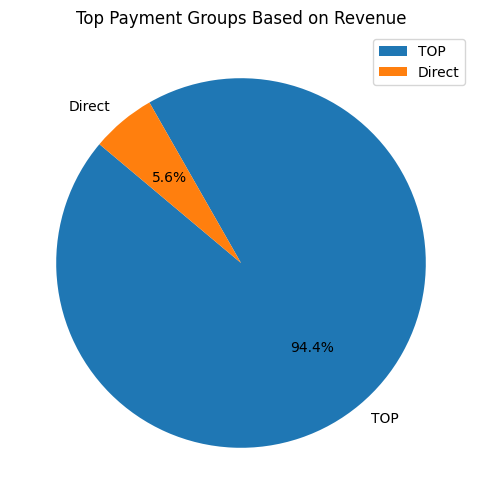

In [21]:
# TOP Payment Group Berdasarkan Revenue
top_payment_groups = cluster_df.groupby('payment_group')['revenue'].sum().sort_values(ascending=False).head(10)

# Create a figure canvas
plt.figure(figsize=(10, 6))

# Plotting the pie chart
plt.pie(top_payment_groups, labels=top_payment_groups.index, autopct='%1.1f%%', startangle=140)

# Adding a title
plt.title("Top Payment Groups Based on Revenue")

# Save the image
plt.savefig('top-payment-groups-revenue.jpg', format='jpeg')

# Show the legend and the pie chart
plt.legend(loc='best')
plt.show()

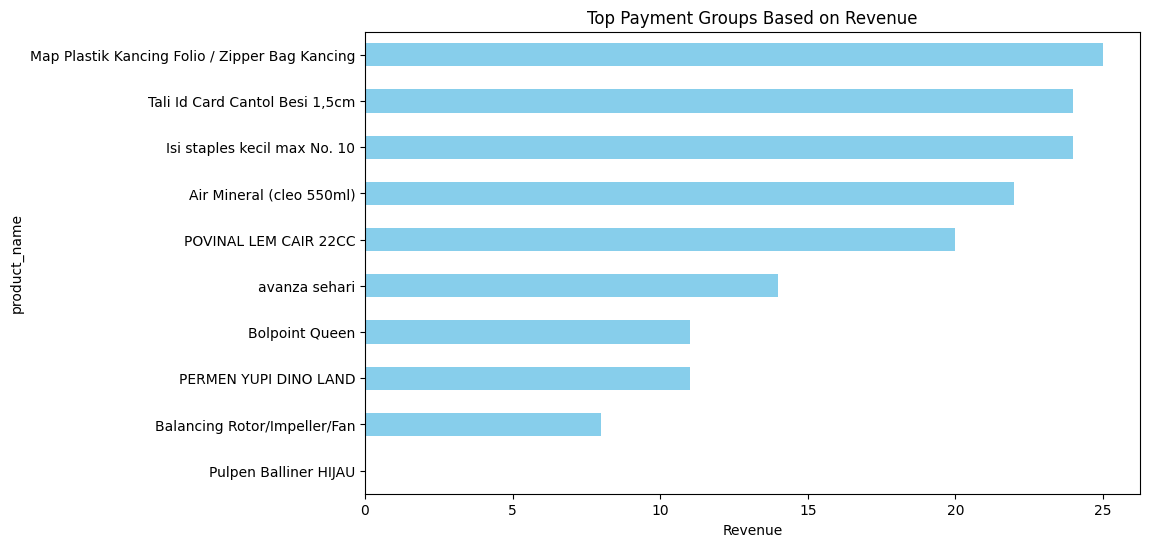

In [22]:
# Assuming 'revenue' is a numeric column and 'product_name' is the payment group
top_payment_groups = cluster_df.groupby('product_name')['revenue'].sum().sort_values(ascending=True).head(10)

# Create a figure canvas
plt.figure(figsize=(10, 6))

# Plotting the bar chart
top_payment_groups.plot(kind='barh', color='skyblue')

# Adding labels and a title
plt.xlabel('Revenue')
plt.ylabel('product_name')
plt.title('Top Payment Groups Based on Revenue')

# Save the image
plt.savefig('top-payment-groups-revenue.jpg', format='jpeg')

# Show the plot
plt.show()

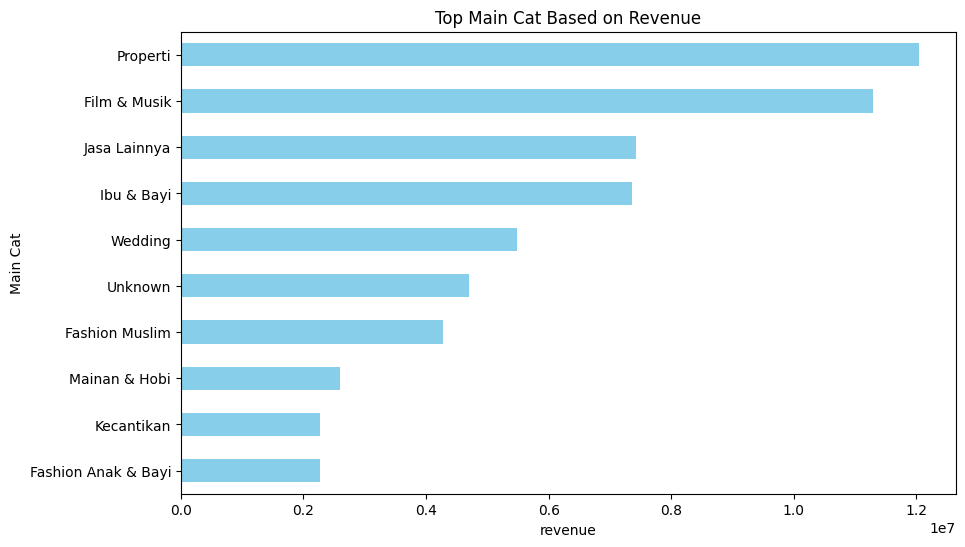

In [23]:
# Assuming 'revenue' is a numeric column and 'main_cat' is the payment group
top_payment_groups = cluster_df.groupby('main_cat')['revenue'].sum().sort_values(ascending=True).head(10)

# Create a figure canvas
plt.figure(figsize=(10, 6))

# Plotting the bar chart
top_payment_groups.plot(kind='barh', color='skyblue')

# Adding labels and a title
plt.xlabel('revenue')
plt.ylabel('Main Cat')
plt.title('Top Main Cat Based on Revenue')

# Save the image
plt.savefig('top-payment-groups-revenue.jpg', format='jpeg')

# Show the plot
plt.show()

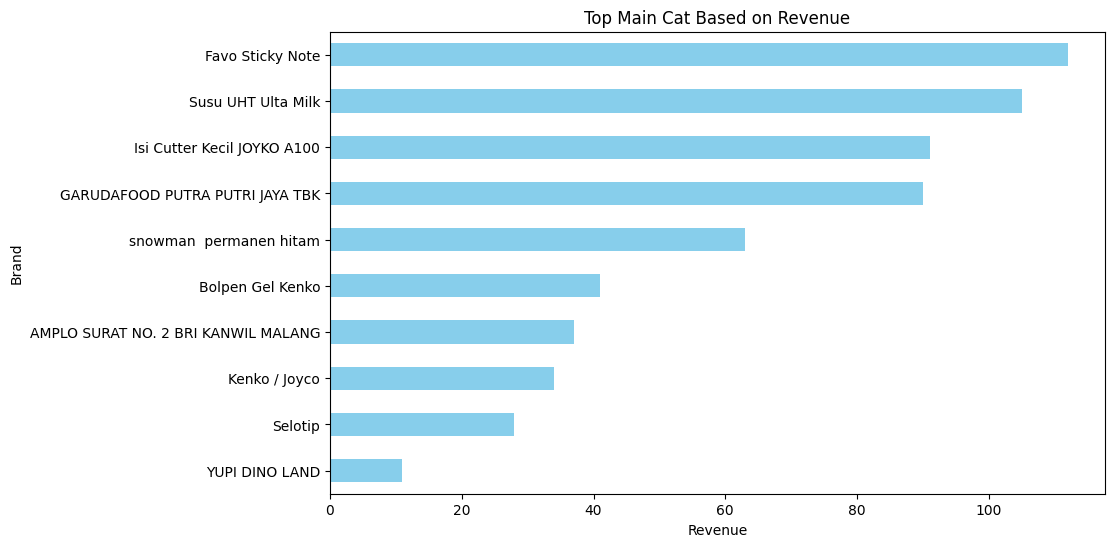

In [24]:
# Assuming 'revenue' is a numeric column and 'brand' is the payment group
top_payment_groups = cluster_df.groupby('brand')['revenue'].sum().sort_values(ascending=True).head(10)

# Create a figure canvas
plt.figure(figsize=(10, 6))

# Plotting the bar chart
top_payment_groups.plot(kind='barh', color='skyblue')

# Adding labels and a title
plt.xlabel('Revenue')
plt.ylabel('Brand')
plt.title('Top Main Cat Based on Revenue')

# Save the image
plt.savefig('top-payment-groups-revenue.jpg', format='jpeg')

# Show the plot
plt.show()

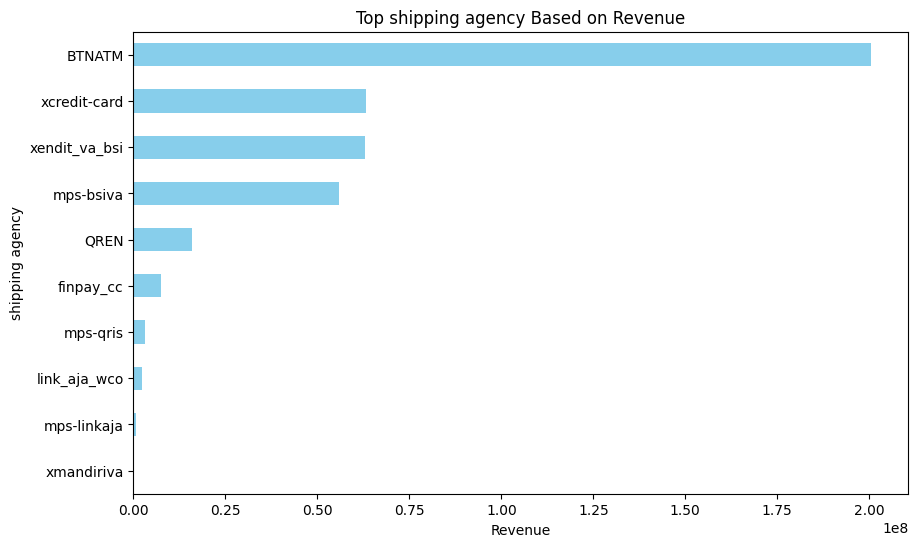

In [27]:
# Assuming 'revenue' is a numeric column and 'shipping_agency' is the payment group
top_payment_groups = cluster_df.groupby('shipping_agency')['revenue'].sum().sort_values(ascending=True).head(10)

# Create a figure canvas
plt.figure(figsize=(10, 6))

# Plotting the bar chart
top_payment_groups.plot(kind='barh', color='skyblue')

# Adding labels and a title
plt.xlabel('Revenue')
plt.ylabel('shipping agency')
plt.title('Top shipping agency Based on Revenue')

# Save the image
plt.savefig('top-payment-groups-revenue.jpg', format='jpeg')

# Show the plot
plt.show()

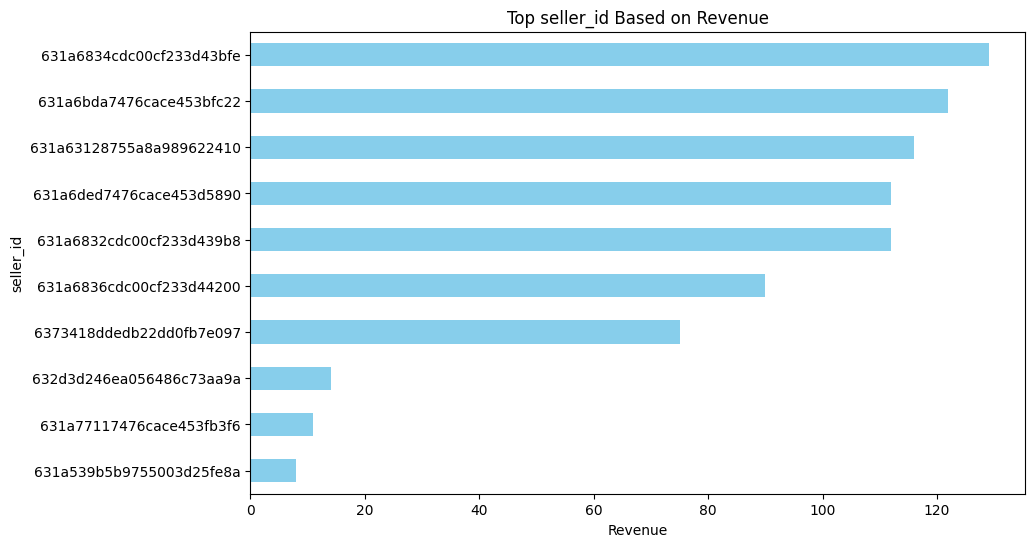

In [28]:
# Assuming 'revenue' is a numeric column and 'shipping_agency' is the payment group
top_payment_groups = cluster_df.groupby('seller_id')['revenue'].sum().sort_values(ascending=True).head(10)

# Create a figure canvas
plt.figure(figsize=(10, 6))

# Plotting the bar chart
top_payment_groups.plot(kind='barh', color='skyblue')

# Adding labels and a title
plt.xlabel('Revenue')
plt.ylabel('seller_id')
plt.title('Top seller_id Based on Revenue')

# Save the image
plt.savefig('top-payment-groups-revenue.jpg', format='jpeg')

# Show the plot
plt.show()

In [29]:
#see data
cluster_df.head()

po_number transaction_date  order_id order_status  \
0  PO-2022-12-12-8804434       2022-12-12    463776      Selesai   
1  PO-2022-10-11-4866339       2022-10-11    426155      Selesai   
2  PO-2022-10-11-4866339       2022-10-11    426155      Selesai   
3  PO-2022-10-11-4866339       2022-10-11    426155      Selesai   
4  PO-2022-10-11-4866339       2022-10-11    426155      Selesai   

  payment_group shipping_agency  shipping_cost  total_project_value  revenue  \
0           TOP       mandiriva              0             53280000   399600   
1           TOP       mps-briva              0             78775501   590816   
2           TOP       mps-briva              0             78775501   590816   
3           TOP       mps-briva              0             78775501   590816   
4           TOP       mps-briva              0             78775501   590816   

                  seller_id  ...  \
0                 anonymous  ...   
1  631a50645b9755003d24d6b9  ...   
2  631a50645b9755003d24d6b9  ...   
3  631a50645b9755003d24d6b9  ...   
4  631a50645b9755003d24d6b9  ...   

                                       product_name                 main_cat  \
0               Oli Compressor ATLAS Synthetic base              Pertukangan   
1  Neonbox LED dengan tiang Saung Pananjung Bandung         Jasa Advertising   
2          Wallpaper Ayam Goreng Bang Toung Jakarta  Jasa Percetakan & Media   
3               Backdrop Pondok Indah Cipala Banten  Jasa Percetakan & Media   
4              Alas Meja Pondok Indah Cipala Banten  Jasa Percetakan & Media   

             brand price_per_item quantity price_total free_shipping      ppn  \
0   ROTO Synthetic     16000000.0        3    48000000             1  5280000   
1  Product_Unknown      6000000.0        1     6000000             1   660000   
2  Product_Unknown      2348760.0        1     2348760             1   258364   
3  Product_Unknown      1898750.0        1     1898750             1   208862   
4  Product_Unknown      1021410.0        1     1021410             1   112355   

  weight_total unit  
0        90000  pcs  
1        17500  pcs  
2        10967  pcs  
3         6767  pcs  
4         3440  pcs  

[5 rows x 29 columns]

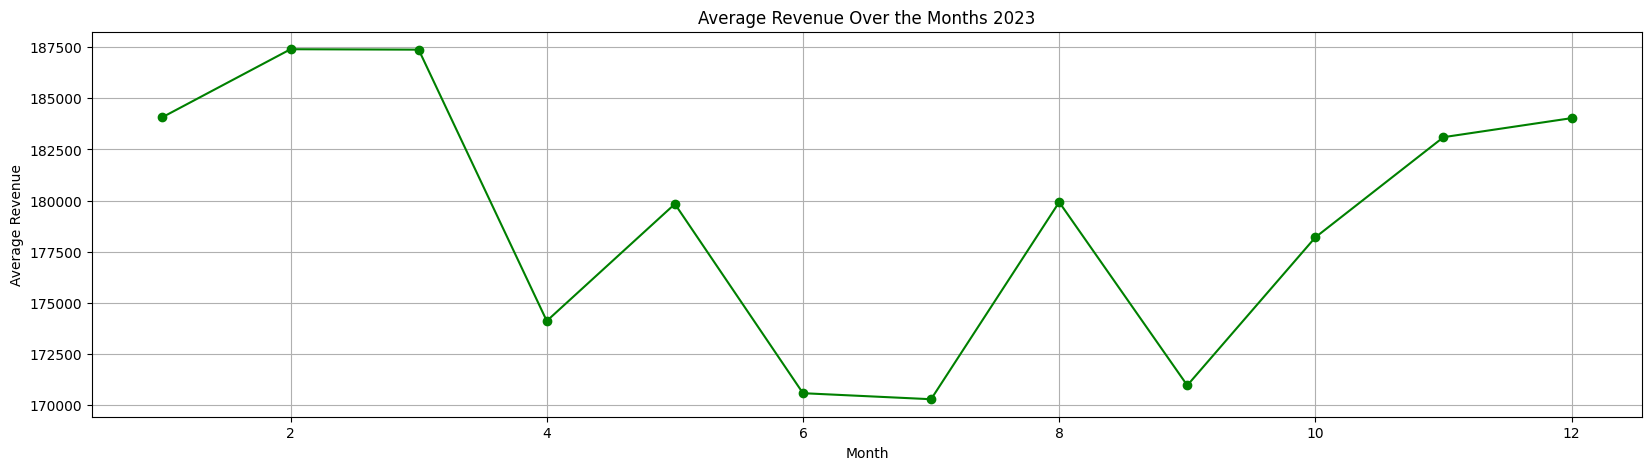

In [30]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

plt.figure(figsize=(20, 5))
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))

avg_revenue_per_month = cluster_df.groupby(cluster_df['transaction_date'].dt.month)['revenue'].mean()

plt.plot(avg_revenue_per_month, color='green', marker='o')
plt.xlabel('Month')
plt.ylabel('Average Revenue')
plt.title('Average Revenue Over the Months 2023')
plt.grid(True)
plt.show()

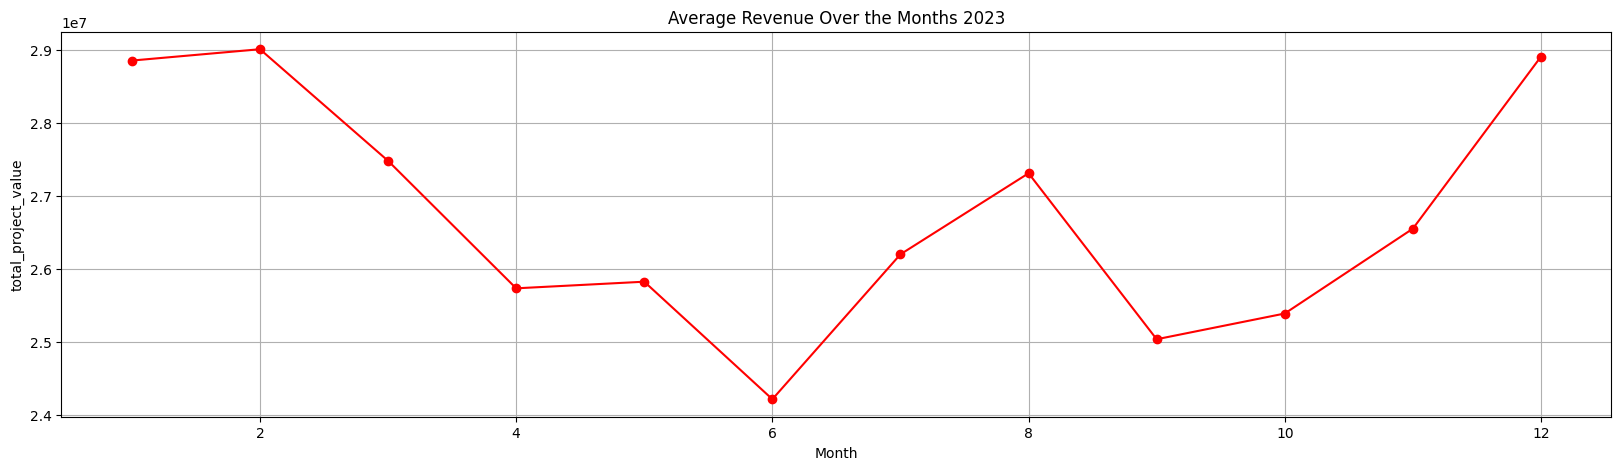

In [31]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

plt.figure(figsize=(20, 5))
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))

avg_revenue_per_month = cluster_df.groupby(cluster_df['transaction_date'].dt.month)['total_project_value'].mean()

plt.plot(avg_revenue_per_month, color='red', marker='o')
plt.xlabel('Month')
plt.ylabel('total_project_value')
plt.title('Average Revenue Over the Months 2023')
plt.grid(True)
plt.show()

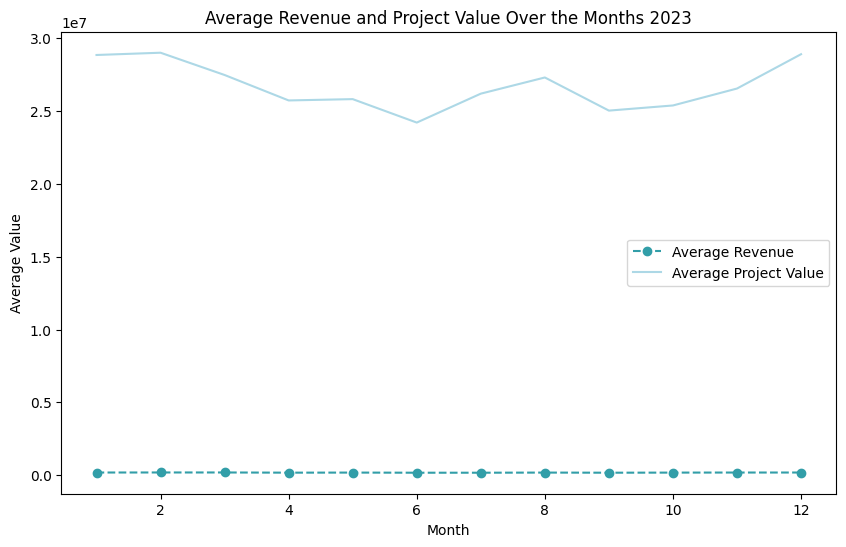

In [32]:
plt.figure(figsize=(10, 6))
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))

# Group by month and calculate the mean revenue and total project value
avg_revenue_per_month = cluster_df.groupby(cluster_df['transaction_date'].dt.month)['revenue'].mean()
avg_project_per_month = cluster_df.groupby(cluster_df['transaction_date'].dt.month)['total_project_value'].mean()

# Plotting the average revenue as a line plot
plt.plot(avg_revenue_per_month, color='#329ea8', marker='o', linestyle='--', label='Average Revenue')

# Plotting the average total project value as a bar plot
plt.plot(avg_project_per_month.index, avg_project_per_month, color='lightblue', label='Average Project Value')

plt.xlabel('Month')
plt.ylabel('Average Value')
plt.title('Average Revenue and Project Value Over the Months 2023')
plt.legend()
plt.show()

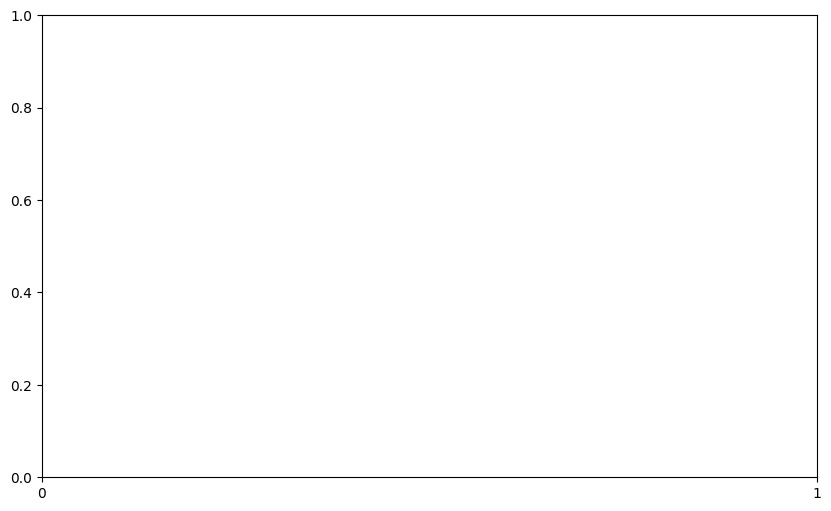

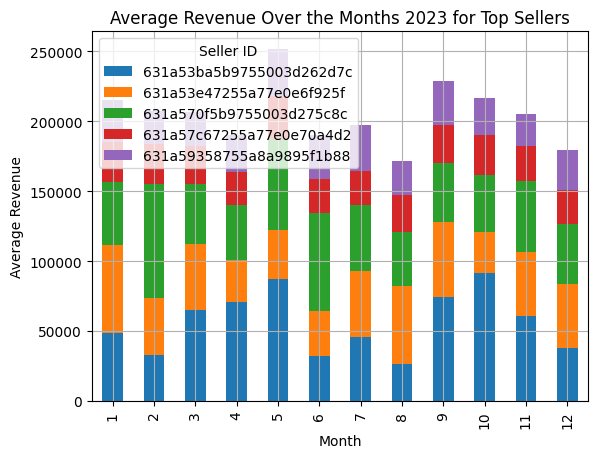

In [33]:
plt.figure(figsize=(10, 6))
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))

# Group by month and seller_id, and calculate the mean revenue
avg_revenue_per_month = cluster_df.groupby([cluster_df['transaction_date'].dt.month, 'seller_id'])['revenue'].mean()

# Get the top sellers based on value counts
top_sellers = cluster_df['seller_id'].value_counts().head(5).index

# Filter the data for the top sellers
avg_revenue_per_month = avg_revenue_per_month.loc[avg_revenue_per_month.index.get_level_values('seller_id').isin(top_sellers)]

# Unstack the DataFrame to have sellers as columns
avg_revenue_per_month = avg_revenue_per_month.unstack(level='seller_id')

# Plotting as a bar plot
avg_revenue_per_month.plot(kind='bar', stacked=True)
plt.xlabel('Month')
plt.ylabel('Average Revenue')
plt.title('Average Revenue Over the Months 2023 for Top Sellers')
plt.grid(True)
plt.legend(title='Seller ID', loc='upper left')
plt.show()

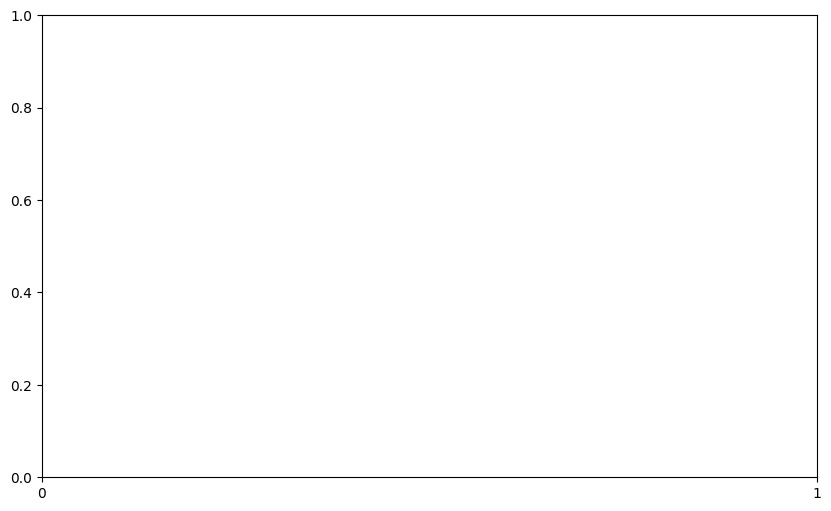

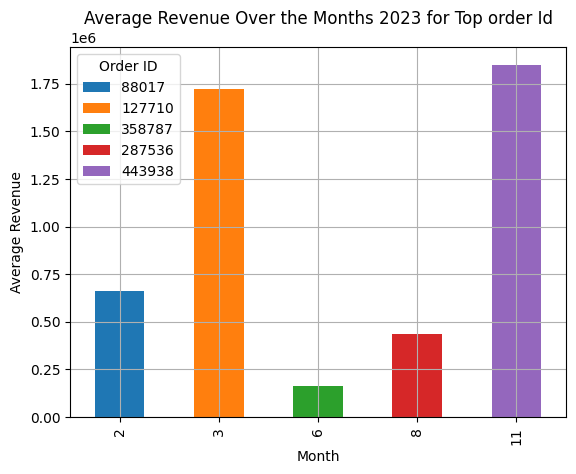

In [34]:
plt.figure(figsize=(10, 6))
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))

# Group by month and seller_id, and calculate the mean revenue
avg_revenue_per_month = cluster_df.groupby([cluster_df['transaction_date'].dt.month, 'order_id'])['revenue'].mean()

# Get the top sellers based on value counts
top_sellers = cluster_df['order_id'].value_counts().head(5).index

# Filter the data for the top sellers
avg_revenue_per_month = avg_revenue_per_month.loc[avg_revenue_per_month.index.get_level_values('order_id').isin(top_sellers)]

# Unstack the DataFrame to have sellers as columns
avg_revenue_per_month = avg_revenue_per_month.unstack(level='order_id')

# Plotting as a bar plot
avg_revenue_per_month.plot(kind='bar', stacked=True)
plt.xlabel('Month')
plt.ylabel('Average Revenue')
plt.title('Average Revenue Over the Months 2023 for Top order Id')
plt.grid(True)
plt.legend(title='Order ID', loc='upper left')
plt.show()

## Top Seller Province

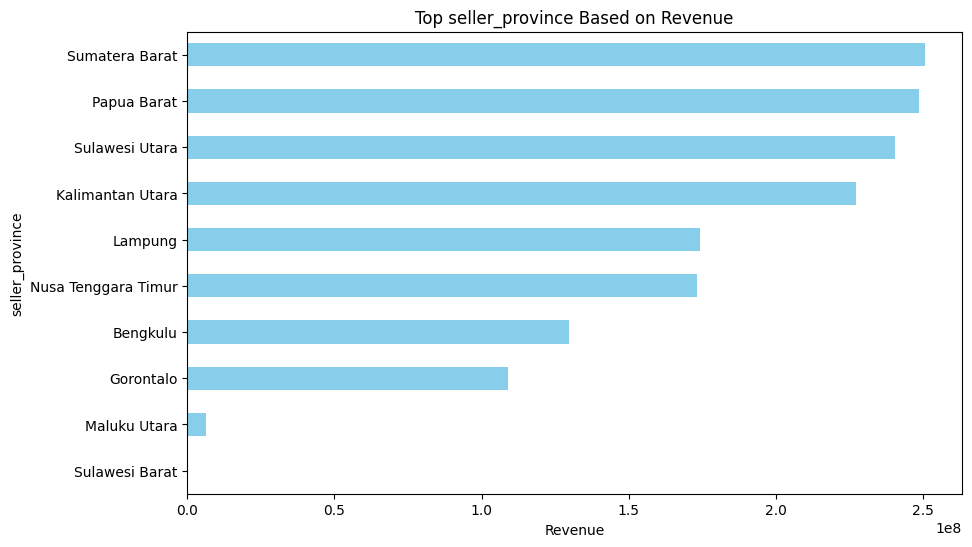

In [35]:
# Assuming 'revenue' is a numeric column and 'shipping_agency' is the payment group
top_payment_groups = cluster_df.groupby('seller_province')['revenue'].sum().sort_values(ascending=True).head(10)

# Create a figure canvas
plt.figure(figsize=(10, 6))

# Plotting the bar chart
top_payment_groups.plot(kind='barh', color='skyblue')

# Adding labels and a title
plt.xlabel('Revenue')
plt.ylabel('seller_province')
plt.title('Top seller_province Based on Revenue')

# Save the image
plt.savefig('top-payment-groups-revenue.jpg', format='jpeg')

# Show the plot
plt.show()

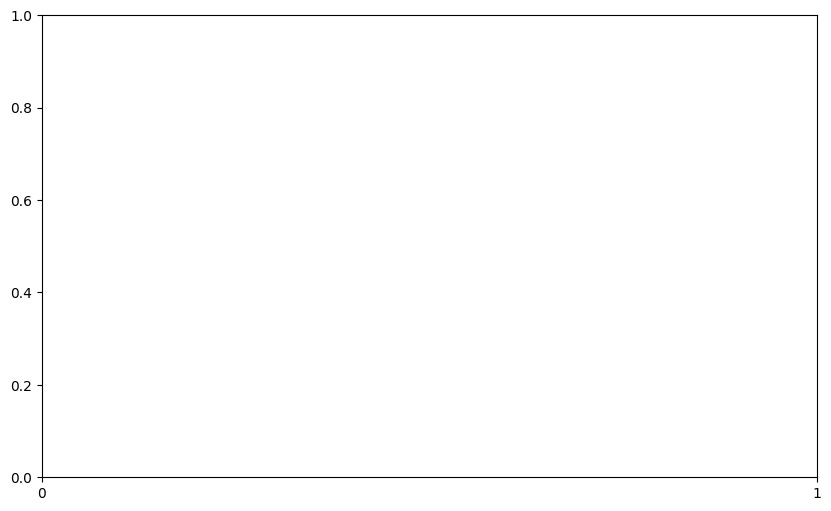

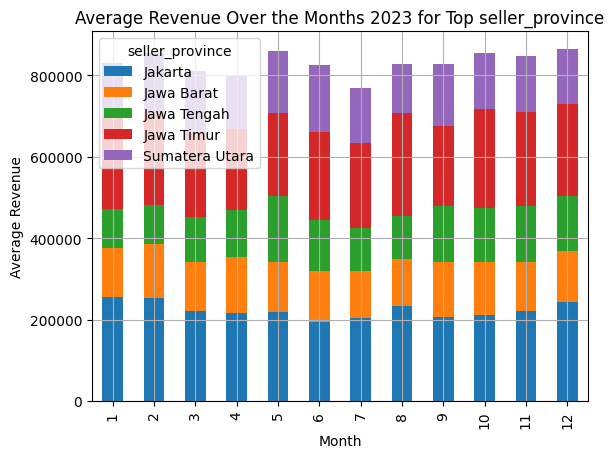

In [36]:
plt.figure(figsize=(10, 6))
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))

# Group by month and seller_id, and calculate the mean revenue
avg_revenue_per_month = cluster_df.groupby([cluster_df['transaction_date'].dt.month, 'seller_province'])['revenue'].mean()

# Get the top sellers based on value counts
top_sellers = cluster_df['seller_province'].value_counts().head(5).index

# Filter the data for the top sellers
avg_revenue_per_month = avg_revenue_per_month.loc[avg_revenue_per_month.index.get_level_values('seller_province').isin(top_sellers)]

# Unstack the DataFrame to have sellers as columns
avg_revenue_per_month = avg_revenue_per_month.unstack(level='seller_province')

# Plotting as a bar plot
avg_revenue_per_month.plot(kind='bar', stacked=True)
plt.xlabel('Month')
plt.ylabel('Average Revenue')
plt.title('Average Revenue Over the Months 2023 for Top seller_province')
plt.grid(True)
plt.legend(title='seller_province', loc='upper left')
plt.show()

## Buyer Seller Province

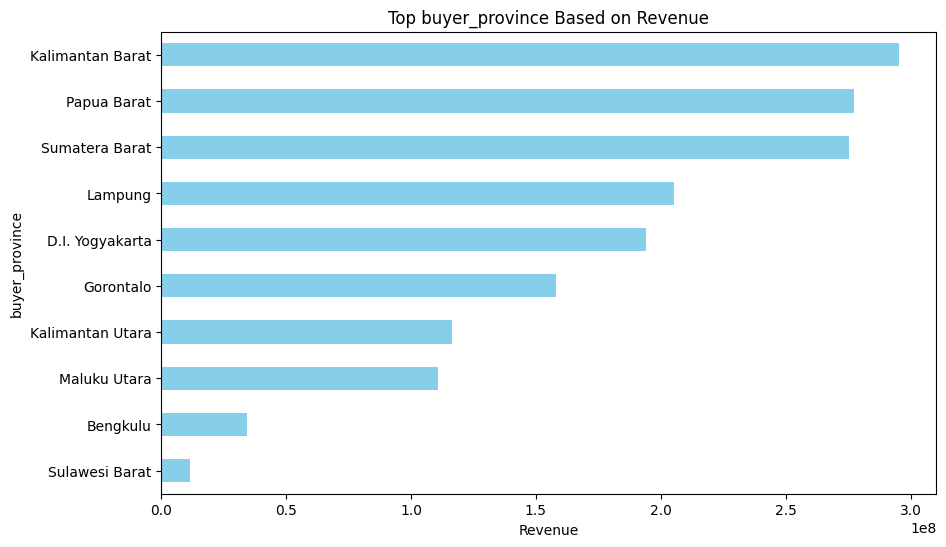

In [37]:
# Assuming 'revenue' is a numeric column and 'shipping_agency' is the payment group
top_payment_groups = cluster_df.groupby('buyer_province')['revenue'].sum().sort_values(ascending=True).head(10)

# Create a figure canvas
plt.figure(figsize=(10, 6))

# Plotting the bar chart
top_payment_groups.plot(kind='barh', color='skyblue')

# Adding labels and a title
plt.xlabel('Revenue')
plt.ylabel('buyer_province')
plt.title('Top buyer_province Based on Revenue')

# Save the image
plt.savefig('top-payment-groups-revenue.jpg', format='jpeg')

# Show the plot
plt.show()

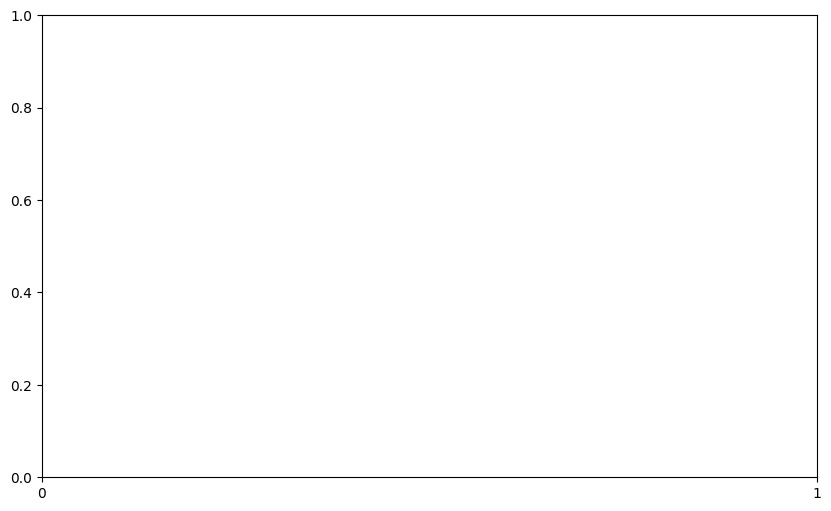

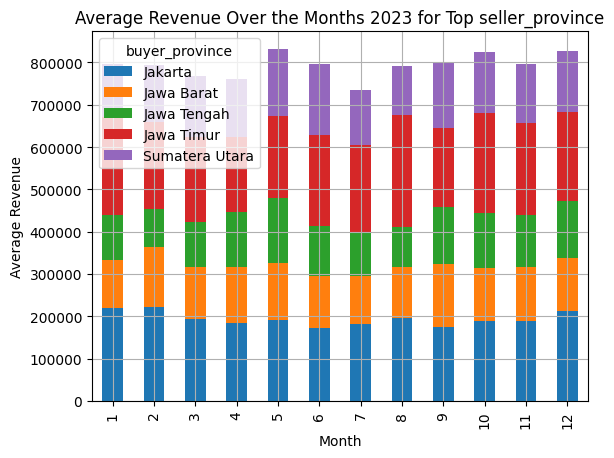

In [38]:
plt.figure(figsize=(10, 6))
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))

# Group by month and seller_id, and calculate the mean revenue
avg_revenue_per_month = cluster_df.groupby([cluster_df['transaction_date'].dt.month, 'buyer_province'])['revenue'].mean()

# Get the top sellers based on value counts
top_sellers = cluster_df['buyer_province'].value_counts().head(5).index

# Filter the data for the top sellers
avg_revenue_per_month = avg_revenue_per_month.loc[avg_revenue_per_month.index.get_level_values('buyer_province').isin(top_sellers)]

# Unstack the DataFrame to have sellers as columns
avg_revenue_per_month = avg_revenue_per_month.unstack(level='buyer_province')

# Plotting as a bar plot
avg_revenue_per_month.plot(kind='bar', stacked=True)
plt.xlabel('Month')
plt.ylabel('Average Revenue')
plt.title('Average Revenue Over the Months 2023 for Top seller_province')
plt.grid(True)
plt.legend(title='buyer_province', loc='upper left')
plt.show()

## Top Seller City

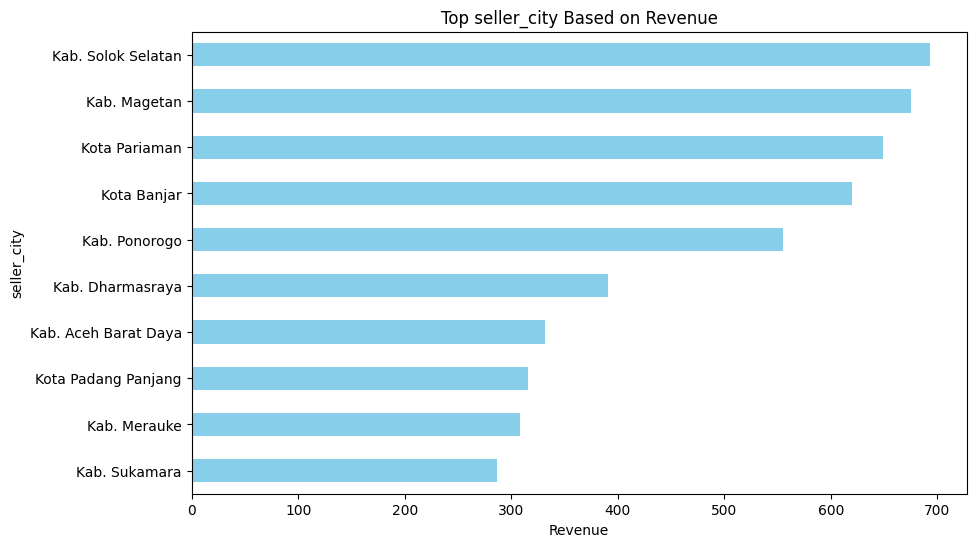

In [39]:
# Assuming 'revenue' is a numeric column and 'shipping_agency' is the payment group
top_payment_groups = cluster_df.groupby('seller_city')['revenue'].sum().sort_values(ascending=True).head(10)

# Create a figure canvas
plt.figure(figsize=(10, 6))

# Plotting the bar chart
top_payment_groups.plot(kind='barh', color='skyblue')

# Adding labels and a title
plt.xlabel('Revenue')
plt.ylabel('seller_city')
plt.title('Top seller_city Based on Revenue')

# Save the image
plt.savefig('top-payment-groups-revenue.jpg', format='jpeg')

# Show the plot
plt.show()

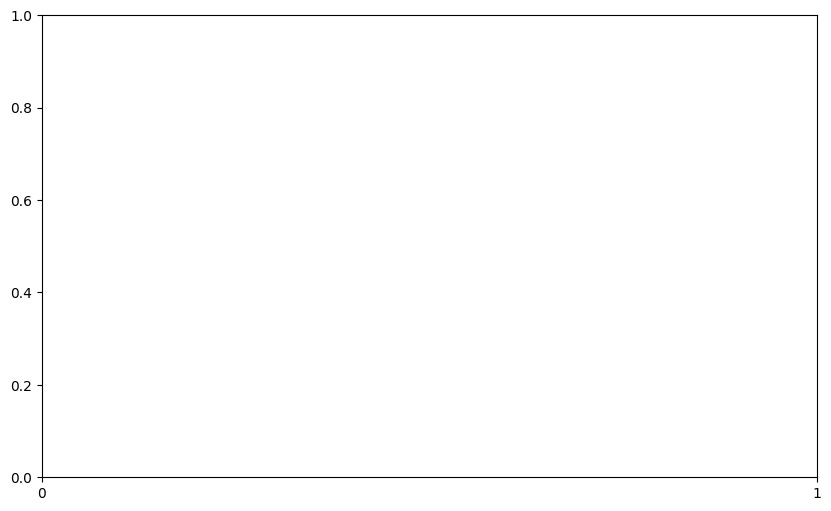

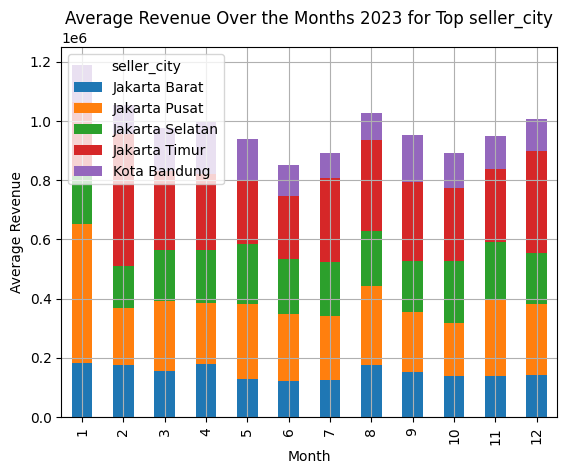

In [40]:
plt.figure(figsize=(10, 6))
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))

# Group by month and seller_id, and calculate the mean revenue
avg_revenue_per_month = cluster_df.groupby([cluster_df['transaction_date'].dt.month, 'seller_city'])['revenue'].mean()

# Get the top sellers based on value counts
top_sellers = cluster_df['seller_city'].value_counts().head(5).index

# Filter the data for the top sellers
avg_revenue_per_month = avg_revenue_per_month.loc[avg_revenue_per_month.index.get_level_values('seller_city').isin(top_sellers)]

# Unstack the DataFrame to have sellers as columns
avg_revenue_per_month = avg_revenue_per_month.unstack(level='seller_city')

# Plotting as a bar plot
avg_revenue_per_month.plot(kind='bar', stacked=True)
plt.xlabel('Month')
plt.ylabel('Average Revenue')
plt.title('Average Revenue Over the Months 2023 for Top seller_city')
plt.grid(True)
plt.legend(title='seller_city', loc='upper left')
plt.show()

## Top Buyer City

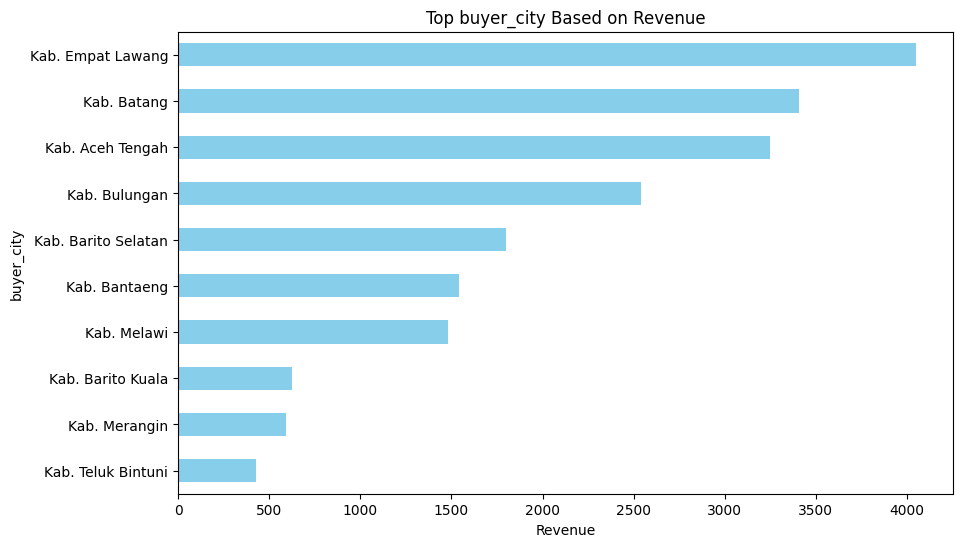

In [41]:
# Assuming 'revenue' is a numeric column and 'shipping_agency' is the payment group
top_payment_groups = cluster_df.groupby('buyer_city')['revenue'].sum().sort_values(ascending=True).head(10)

# Create a figure canvas
plt.figure(figsize=(10, 6))

# Plotting the bar chart
top_payment_groups.plot(kind='barh', color='skyblue')

# Adding labels and a title
plt.xlabel('Revenue')
plt.ylabel('buyer_city')
plt.title('Top buyer_city Based on Revenue')

# Save the image
plt.savefig('top-payment-groups-revenue.jpg', format='jpeg')

# Show the plot
plt.show()

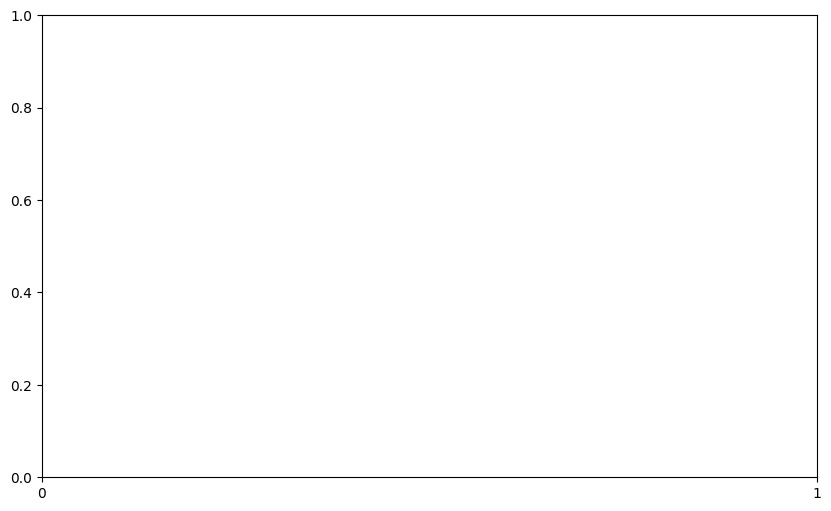

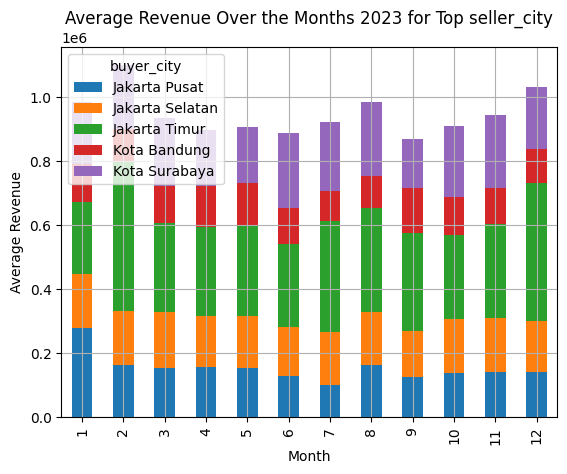

In [42]:
plt.figure(figsize=(10, 6))
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))

# Group by month and seller_id, and calculate the mean revenue
avg_revenue_per_month = cluster_df.groupby([cluster_df['transaction_date'].dt.month, 'buyer_city'])['revenue'].mean()

# Get the top sellers based on value counts
top_sellers = cluster_df['buyer_city'].value_counts().head(5).index

# Filter the data for the top sellers
avg_revenue_per_month = avg_revenue_per_month.loc[avg_revenue_per_month.index.get_level_values('buyer_city').isin(top_sellers)]

# Unstack the DataFrame to have sellers as columns
avg_revenue_per_month = avg_revenue_per_month.unstack(level='buyer_city')

# Plotting as a bar plot
avg_revenue_per_month.plot(kind='bar', stacked=True)
plt.xlabel('Month')
plt.ylabel('Average Revenue')
plt.title('Average Revenue Over the Months 2023 for Top seller_city')
plt.grid(True)
plt.legend(title='buyer_city', loc='upper left')
plt.show()

In [43]:
cluster_df.head()

po_number transaction_date  order_id order_status  \
0  PO-2022-12-12-8804434       2022-12-12    463776      Selesai   
1  PO-2022-10-11-4866339       2022-10-11    426155      Selesai   
2  PO-2022-10-11-4866339       2022-10-11    426155      Selesai   
3  PO-2022-10-11-4866339       2022-10-11    426155      Selesai   
4  PO-2022-10-11-4866339       2022-10-11    426155      Selesai   

  payment_group shipping_agency  shipping_cost  total_project_value  revenue  \
0           TOP       mandiriva              0             53280000   399600   
1           TOP       mps-briva              0             78775501   590816   
2           TOP       mps-briva              0             78775501   590816   
3           TOP       mps-briva              0             78775501   590816   
4           TOP       mps-briva              0             78775501   590816   

                  seller_id  ...  \
0                 anonymous  ...   
1  631a50645b9755003d24d6b9  ...   
2  631a50645b9755003d24d6b9  ...   
3  631a50645b9755003d24d6b9  ...   
4  631a50645b9755003d24d6b9  ...   

                                       product_name                 main_cat  \
0               Oli Compressor ATLAS Synthetic base              Pertukangan   
1  Neonbox LED dengan tiang Saung Pananjung Bandung         Jasa Advertising   
2          Wallpaper Ayam Goreng Bang Toung Jakarta  Jasa Percetakan & Media   
3               Backdrop Pondok Indah Cipala Banten  Jasa Percetakan & Media   
4              Alas Meja Pondok Indah Cipala Banten  Jasa Percetakan & Media   

             brand price_per_item quantity price_total free_shipping      ppn  \
0   ROTO Synthetic     16000000.0        3    48000000             1  5280000   
1  Product_Unknown      6000000.0        1     6000000             1   660000   
2  Product_Unknown      2348760.0        1     2348760             1   258364   
3  Product_Unknown      1898750.0        1     1898750             1   208862   
4  Product_Unknown      1021410.0        1     1021410             1   112355   

  weight_total unit  
0        90000  pcs  
1        17500  pcs  
2        10967  pcs  
3         6767  pcs  
4         3440  pcs  

[5 rows x 29 columns]

# Data Preprocessing

### Look Data

In [44]:
#looks data
#data kategorical
#cluster_df.order_status.unique().tolist()

#data kategorical 2 (1 dan 0)
#cluster_df.payment_group.unique().tolist()

#data kategorical 3
cluster_df.shipping_agency.unique().tolist()

#product_name
cluster_df.main_cat.unique().tolist()

['Pertukangan',
 'Jasa Advertising',
 'Jasa Percetakan & Media',
 'Souvenir & Merchandise',
 'Bahan Kimia',
 'Jasa Mandor & Tenaga Kerja Lainnya',
 'Jasa Perawatan Peralatan & Mesin',
 'Barang Lainnya',
 'Elektronik',
 'Jasa Perawatan Elektronik & IT',
 'Komputer & Laptop',
 'Jasa Ekspedisi & Pengepakan',
 'Pengadaan & Sewa Kendaraan',
 'Pengadaan Peralatan-Mesin',
 'Office & Stationery',
 'Jasa Perawatan Kendaraan',
 'Jasa Event Organizer',
 'Makanan & Minuman',
 'Jasa Perawatan Gedung',
 'Olahraga',
 'Jasa Konstruksi & Renovasi',
 'Buku',
 'Perawatan Tubuh',
 'Rumah Tangga',
 'Kesehatan',
 'Konveksi & Laundry',
 'Jasa Travel & Akomodasi',
 'Jasa Konsultan & Penilaian',
 'Pertanian & Peternakan',
 'Sewa Gedung',
 'Kamera',
 'Fashion',
 'Otomotif',
 'Handphone & Tablet',
 'Fashion Pria',
 'Dapur',
 'Unknown',
 'Pendidikan dan Pelatihan',
 'Properti',
 'Fashion Wanita',
 'Film & Musik',
 'Perlengkapan Pesta & Craft',
 'Jasa Lainnya',
 'Tour & Travel',
 'Fashion Muslim',
 'Gaming',
 'Ibu

## Mengtegorical And Ordinal Data

### Order_Status

In [45]:
#untuk order_
# Provided category mapping
category_mapping = {
    'Selesai': 0,
    'Dibatalkan': 1,
    'Ditolak Penjual': 2,
    'Dibatalkan Otomatis': 3,
    'Expired': 4,
    'Tagihan Ditolak': 5,
    'Refund Selesai': 6,
    'Menunggu Pembayaran': 7,
    'Diterima': 8,
    'Ditolak': 9,
    'Disetujui': 10,
    'Refund': 11,
    'Revisi': 12,
    'Dikirim': 13,
    'Penagihan': 14,
    'Pembayaran Terverifikasi': 15,
    'Dibayar': 16,
    'Diproses Penjual': 17,
    'Permintaan Perubahan': 18,
    'Menunggu Persetujuan': 19,
    'Tagihan Diterima': 20,
    'Permintaan Upload Document': 21
}

# Check if the 'order_status' column exists in cluster_df
if 'order_status' in cluster_df.columns:
    # Apply the mapping
    cluster_df['order_status_encode'] = cluster_df['order_status'].map(category_mapping)
else:
    raise ValueError("Column 'order_status' does not exist in the DataFrame.")

# Display the DataFrame
print(cluster_df)


                    po_number transaction_date  order_id     order_status  \
0       PO-2022-12-12-8804434       2022-12-12    463776          Selesai   
1       PO-2022-10-11-4866339       2022-10-11    426155          Selesai   
2       PO-2022-10-11-4866339       2022-10-11    426155          Selesai   
3       PO-2022-10-11-4866339       2022-10-11    426155          Selesai   
4       PO-2022-10-11-4866339       2022-10-11    426155          Selesai   
...                       ...              ...       ...              ...   
474565  PO-2022-11-30-4342388       2022-11-30    455045          Selesai   
474566   PO-2022-06-07-123774       2022-06-07    108108  Ditolak Penjual   
474567   PO-2022-06-07-123774       2022-06-07    108108  Ditolak Penjual   
474568   PO-2022-07-21-143881       2022-07-21    293510          Selesai   
474569  PO-2022-11-30-5473461       2022-11-30    455203          Selesai   

       payment_group shipping_agency  shipping_cost  total_project_value  \

## Payment Group

In [46]:
payment_group_mapping = {
    'TOP': 0,
    'Direct': 1
}

# Check if the 'payment_group' column exists in cluster_df
if 'payment_group' in cluster_df.columns:
    # Apply the mapping
    cluster_df['payment_group_encode'] = cluster_df['payment_group'].map(payment_group_mapping)
else:
    raise ValueError("Column 'payment_group' does not exist in the DataFrame.")

# Display the DataFrame
print(cluster_df)

                    po_number transaction_date  order_id     order_status  \
0       PO-2022-12-12-8804434       2022-12-12    463776          Selesai   
1       PO-2022-10-11-4866339       2022-10-11    426155          Selesai   
2       PO-2022-10-11-4866339       2022-10-11    426155          Selesai   
3       PO-2022-10-11-4866339       2022-10-11    426155          Selesai   
4       PO-2022-10-11-4866339       2022-10-11    426155          Selesai   
...                       ...              ...       ...              ...   
474565  PO-2022-11-30-4342388       2022-11-30    455045          Selesai   
474566   PO-2022-06-07-123774       2022-06-07    108108  Ditolak Penjual   
474567   PO-2022-06-07-123774       2022-06-07    108108  Ditolak Penjual   
474568   PO-2022-07-21-143881       2022-07-21    293510          Selesai   
474569  PO-2022-11-30-5473461       2022-11-30    455203          Selesai   

       payment_group shipping_agency  shipping_cost  total_project_value  \

In [47]:
# List of shipping agency names
shipping_agencies = [
    'mandiriva', 'mps-briva', 'mandiri_va_billing_fixed', 'mps-bsiva', 'xendit_va_bsi',
    'mps-bniva', 'bni_ecoll_va', 'xendit_va_bri', 'xbriva', 'xbniva', 'mps-btnva',
    'BTNATM', 'xmandiriva', 'QREN', 'finpay_cc', 'xcredit-card', 'mps-qris',
    'mps-linkaja', 'link_aja_wco'
]

# Creating a mapping from the list to integers
shipping_agency_mapping = {agency: i for i, agency in enumerate(shipping_agencies)}

# Check if the 'shipping_agency' column exists in cluster_df
if 'shipping_agency' in cluster_df.columns:
    # Apply the mapping and add the result to cluster_df
    cluster_df['shipping_agency_encode'] = cluster_df['shipping_agency'].map(shipping_agency_mapping)
else:
    raise ValueError("Column 'shipping_agency' does not exist in the DataFrame.")

# Display the DataFrame
print(cluster_df)

                    po_number transaction_date  order_id     order_status  \
0       PO-2022-12-12-8804434       2022-12-12    463776          Selesai   
1       PO-2022-10-11-4866339       2022-10-11    426155          Selesai   
2       PO-2022-10-11-4866339       2022-10-11    426155          Selesai   
3       PO-2022-10-11-4866339       2022-10-11    426155          Selesai   
4       PO-2022-10-11-4866339       2022-10-11    426155          Selesai   
...                       ...              ...       ...              ...   
474565  PO-2022-11-30-4342388       2022-11-30    455045          Selesai   
474566   PO-2022-06-07-123774       2022-06-07    108108  Ditolak Penjual   
474567   PO-2022-06-07-123774       2022-06-07    108108  Ditolak Penjual   
474568   PO-2022-07-21-143881       2022-07-21    293510          Selesai   
474569  PO-2022-11-30-5473461       2022-11-30    455203          Selesai   

       payment_group shipping_agency  shipping_cost  total_project_value  \

## Maincat Group

In [48]:
# Mapping categories to groups
group_mapping = {
    'Pertukangan': 'Services',
    'Jasa Advertising': 'Services',
    'Jasa Percetakan & Media': 'Services',
    'Jasa Mandor & Tenaga Kerja Lainnya': 'Services',
    'Jasa Perawatan Peralatan & Mesin': 'Services',
    'Jasa Perawatan Elektronik & IT': 'Services',
    'Jasa Ekspedisi & Pengepakan': 'Services',
    'Jasa Perawatan Kendaraan': 'Services',
    'Jasa Event Organizer': 'Services',
    'Jasa Perawatan Gedung': 'Services',
    'Jasa Konstruksi & Renovasi': 'Services',
    'Jasa Travel & Akomodasi': 'Services',
    'Jasa Konsultan & Penilaian': 'Services',
    'Jasa Lainnya': 'Services',
    # Retail and Products
    'Souvenir & Merchandise': 'Retail and Products',
    'Barang Lainnya': 'Retail and Products',
    'Elektronik': 'Retail and Products',
    'Komputer & Laptop': 'Retail and Products',
    'Office & Stationery': 'Retail and Products',
    'Makanan & Minuman': 'Retail and Products',
    'Buku': 'Retail and Products',
    'Rumah Tangga': 'Retail and Products',
    'Kamera': 'Retail and Products',
    'Fashion': 'Retail and Products',
    'Otomotif': 'Retail and Products',
    'Handphone & Tablet': 'Retail and Products',
    'Fashion Pria': 'Retail and Products',
    'Dapur': 'Retail and Products',
    'Properti': 'Retail and Products',
    'Fashion Wanita': 'Retail and Products',
    'Film & Musik': 'Retail and Products',
    'Perlengkapan Pesta & Craft': 'Retail and Products',
    'Tour & Travel': 'Retail and Products',
    'Fashion Muslim': 'Retail and Products',
    'Gaming': 'Retail and Products',
    'Ibu & Bayi': 'Retail and Products',
    'Mainan & Hobi': 'Retail and Products',
    'Wedding': 'Retail and Products',
    'Fashion Anak & Bayi': 'Retail and Products',
    # Health and Beauty
    'Perawatan Tubuh': 'Health and Beauty',
    'Kesehatan': 'Health and Beauty',
    'Kecantikan': 'Health and Beauty',
    # Food and Beverages
    'Makanan & Minuman': 'Food and Beverages',
    # Specialized Equipment
    'Pengadaan & Sewa Kendaraan': 'Specialized Equipment',
    'Pengadaan Peralatan-Mesin': 'Specialized Equipment',
    # Others
    'Bahan Kimia': 'Others',
    'Konveksi & Laundry': 'Others',
    'Pertanian & Peternakan': 'Others',
    'Sewa Gedung': 'Others',
    'Unknown': 'Others',
    'Pendidikan dan Pelatihan': 'Others',
}

if 'main_cat' in cluster_df.columns:
    # Apply the mapping and add the result to cluster_df
    cluster_df['group_cat'] = cluster_df['main_cat'].map(group_mapping)
else:
    raise ValueError("Column 'main_cat' does not exist in the DataFrame.")

# Display the DataFrame
print(cluster_df.head())

               po_number transaction_date  order_id order_status  \
0  PO-2022-12-12-8804434       2022-12-12    463776      Selesai   
1  PO-2022-10-11-4866339       2022-10-11    426155      Selesai   
2  PO-2022-10-11-4866339       2022-10-11    426155      Selesai   
3  PO-2022-10-11-4866339       2022-10-11    426155      Selesai   
4  PO-2022-10-11-4866339       2022-10-11    426155      Selesai   

  payment_group shipping_agency  shipping_cost  total_project_value  revenue  \
0           TOP       mandiriva              0             53280000   399600   
1           TOP       mps-briva              0             78775501   590816   
2           TOP       mps-briva              0             78775501   590816   
3           TOP       mps-briva              0             78775501   590816   
4           TOP       mps-briva              0             78775501   590816   

                  seller_id  ... quantity price_total free_shipping      ppn  \
0                 anonymous  .

In [49]:
# Importing numpy for handling nan (Not a Number)
import numpy as np

# List of broader categories
broader_categories = [
    'Services', 'Retail and Products', 'Others', 'Specialized Equipment', 
    'Food and Beverages', np.nan, 'Health and Beauty'
]

# Creating a mapping from the list to integers
broader_category_mapping = {category: i for i, category in enumerate(broader_categories)}

# Apply the mapping to the DataFrame
# Assuming 'group_cat' is the column with the original broader categories
if 'group_cat' in cluster_df.columns:
    cluster_df['group_cat'] = cluster_df['group_cat'].map(broader_category_mapping)
else:
    raise ValueError("Column 'group_cat' does not exist in the DataFrame.")

# Display the DataFrame
print(cluster_df.head())

               po_number transaction_date  order_id order_status  \
0  PO-2022-12-12-8804434       2022-12-12    463776      Selesai   
1  PO-2022-10-11-4866339       2022-10-11    426155      Selesai   
2  PO-2022-10-11-4866339       2022-10-11    426155      Selesai   
3  PO-2022-10-11-4866339       2022-10-11    426155      Selesai   
4  PO-2022-10-11-4866339       2022-10-11    426155      Selesai   

  payment_group shipping_agency  shipping_cost  total_project_value  revenue  \
0           TOP       mandiriva              0             53280000   399600   
1           TOP       mps-briva              0             78775501   590816   
2           TOP       mps-briva              0             78775501   590816   
3           TOP       mps-briva              0             78775501   590816   
4           TOP       mps-briva              0             78775501   590816   

                  seller_id  ... quantity price_total free_shipping      ppn  \
0                 anonymous  .

In [50]:
cluster_df.group_cat.unique().tolist()

[0, 1, 2, 3, 4, 5, 6]

## Handling Outlier

# Clustering Using K-Means

## Clustering By Shipping Cost

In [51]:
cluster_df

po_number transaction_date  order_id     order_status  \
0       PO-2022-12-12-8804434       2022-12-12    463776          Selesai   
1       PO-2022-10-11-4866339       2022-10-11    426155          Selesai   
2       PO-2022-10-11-4866339       2022-10-11    426155          Selesai   
3       PO-2022-10-11-4866339       2022-10-11    426155          Selesai   
4       PO-2022-10-11-4866339       2022-10-11    426155          Selesai   
...                       ...              ...       ...              ...   
474565  PO-2022-11-30-4342388       2022-11-30    455045          Selesai   
474566   PO-2022-06-07-123774       2022-06-07    108108  Ditolak Penjual   
474567   PO-2022-06-07-123774       2022-06-07    108108  Ditolak Penjual   
474568   PO-2022-07-21-143881       2022-07-21    293510          Selesai   
474569  PO-2022-11-30-5473461       2022-11-30    455203          Selesai   

       payment_group shipping_agency  shipping_cost  total_project_value  \
0                TOP       mandiriva              0             53280000   
1                TOP       mps-briva              0             78775501   
2                TOP       mps-briva              0             78775501   
3                TOP       mps-briva              0             78775501   
4                TOP       mps-briva              0             78775501   
...              ...             ...            ...                  ...   
474565        Direct            QREN           9000                59000   
474566        Direct    bni_ecoll_va          42000               142000   
474567        Direct    bni_ecoll_va          42000               142000   
474568        Direct            QREN              0                 6500   
474569        Direct            QREN              0                27000   

        revenue                 seller_id  ... quantity price_total  \
0        399600                 anonymous  ...        3    48000000   
1        590816  631a50645b9755003d24d6b9  ...        1     6000000   
2        590816  631a50645b9755003d24d6b9  ...        1     2348760   
3        590816  631a50645b9755003d24d6b9  ...        1     1898750   
4        590816  631a50645b9755003d24d6b9  ...        1     1021410   
...         ...                       ...  ...      ...         ...   
474565      442  63aa70cbcb47446d5bdef77a  ...        1       50000   
474566     1065  63aa720fcb47446d5bdf1413  ...        2       40000   
474567     1065  63aa720fcb47446d5bdf1413  ...        3       60000   
474568       48  63aa832bcb47446d5be0c3dd  ...        1        6500   
474569      202  63aa832bcb47446d5be0c3dd  ...        1       27000   

       free_shipping      ppn weight_total  unit order_status_encode  \
0                  1  5280000        90000   pcs                   0   
1                  1   660000        17500   pcs                   0   
2                  1   258364        10967   pcs                   0   
3                  1   208862         6767   pcs                   0   
4                  1   112355         3440   pcs                   0   
...              ...      ...          ...   ...                 ...   
474565             0        0          200   pcs                   0   
474566             0        0         1000  pack                   2   
474567             0        0         1500  pack                   2   
474568             1        0           10   pcs                   0   
474569             1        0           10   pcs                   0   

       payment_group_encode shipping_agency_encode group_cat  
0                         0                      0         0  
1                         0                      1         0  
2                         0                      1         0  
3                         0                      1         0  
4                         0                      1         0  
...                     ...                    ...       ...  
474565                 

In [52]:
clustering = cluster_df.copy()
clustering.head()

po_number transaction_date  order_id order_status  \
0  PO-2022-12-12-8804434       2022-12-12    463776      Selesai   
1  PO-2022-10-11-4866339       2022-10-11    426155      Selesai   
2  PO-2022-10-11-4866339       2022-10-11    426155      Selesai   
3  PO-2022-10-11-4866339       2022-10-11    426155      Selesai   
4  PO-2022-10-11-4866339       2022-10-11    426155      Selesai   

  payment_group shipping_agency  shipping_cost  total_project_value  revenue  \
0           TOP       mandiriva              0             53280000   399600   
1           TOP       mps-briva              0             78775501   590816   
2           TOP       mps-briva              0             78775501   590816   
3           TOP       mps-briva              0             78775501   590816   
4           TOP       mps-briva              0             78775501   590816   

                  seller_id  ... quantity price_total free_shipping      ppn  \
0                 anonymous  ...        3    48000000             1  5280000   
1  631a50645b9755003d24d6b9  ...        1     6000000             1   660000   
2  631a50645b9755003d24d6b9  ...        1     2348760             1   258364   
3  631a50645b9755003d24d6b9  ...        1     1898750             1   208862   
4  631a50645b9755003d24d6b9  ...        1     1021410             1   112355   

  weight_total unit order_status_encode payment_group_encode  \
0        90000  pcs                   0                    0   
1        17500  pcs                   0                    0   
2        10967  pcs                   0                    0   
3         6767  pcs                   0                    0   
4         3440  pcs                   0                    0   

  shipping_agency_encode group_cat  
0                      0         0  
1                      1         0  
2                      1         0  
3                      1         0  
4                      1         0  

[5 rows x 33 columns]

In [53]:
clustering = cluster_df.copy()
clustering['revenue'] = clustering['revenue']
clustering['seller_id'] = clustering['seller_id']

# Let's drop the columns we don't use for the cluster analysis
list_columns = clustering.columns.to_list()
drop_columns = list_columns[33:43]
clustering = clustering.drop(columns=drop_columns, axis=1)
rclustering = clustering.groupby(['order_id', 'revenue'], as_index=False).mean()
rclustering

/tmp/ipykernel_32/2705866644.py:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  rclustering = clustering.groupby(['order_id', 'revenue'], as_index=False).mean()


order_id  revenue  shipping_cost  total_project_value  price_per_item  \
0              1    15750            0.0            2100120.0    1.025000e+04   
1              7   160875            0.0           21450000.0    1.950000e+07   
2             18    41437            0.0            5525000.0    6.500000e+04   
3             19     6000            0.0             800000.0    5.000000e+03   
4             22      894        27500.0             119275.0    4.437500e+04   
...          ...      ...            ...                  ...             ...   
159114    476879    48889            0.0            6518600.0    5.398450e+06   
159115    476880  1733055        30000.0          346611082.0    3.465810e+08   
159116    476881    11250            0.0            1500000.0    1.500000e+03   
159117    476882    93090            0.0           12412075.0    5.665395e+04   
159118    476883    41625            0.0            5550000.0    5.000000e+06   

         quantity    price_total  free_shipping           ppn  weight_total  \
0       41.857143  270285.714286            1.0  29731.428571  12128.571429   
1             1.0     19500000.0            1.0     1950000.0        1000.0   
2            85.0      5525000.0            1.0           0.0       42500.0   
3           100.0       800000.0            1.0           0.0      500000.0   
4             1.0        44375.0            0.0           0.0         750.0   
...           ...            ...            ...           ...           ...   
159114        1.5      2963000.0            0.5      296300.0        2583.5   
159115        1.0    346581082.0            0.0           0.0        1000.0   
159116     1000.0      1500000.0            1.0           0.0       15000.0   
159117  10.210526  294264.473684            1.0  32369.105263  24418.342105   
159118        1.0      5000000.0            0.0      550000.0        8000.0   

        order_status_encode  payment_group_encode  shipping_agency_encode  \
0                       0.0                   0.0                     5.0   
1                       0.0                   0.0                     0.0   
2                       0.0                   0.0                     0.0   
3                       0.0                   0.0                     6.0   
4                       0.0                   1.0                    16.0   
...                     ...                   ...                     ...   
159114                  0.0                   1.0                     5.0   
159115                  0.0                   1.0                     1.0   
159116                  0.0                   0.0                     0.0   
159117                  0.0                   0.0                     5.0   
159118                  0.0                   0.0                     2.0   

        group_cat  
0        1.000000  
1        0.000000  
2        4.000000  
3        0.000000  
4        4.000000  
...           ...  
159114   0.500000  
159115   0.000000  
159116   1.000000  
159117   0.421053  
159118   1.000000  

[159119 rows x 14 columns]

In [54]:
#transform the categorical
rclustering = rclustering.set_index('order_id')
group_clustering = rclustering[(rclustering['revenue']>=1)]
group_clustering

revenue  shipping_cost  total_project_value  price_per_item  \
order_id                                                                
1           15750            0.0            2100120.0    1.025000e+04   
7          160875            0.0           21450000.0    1.950000e+07   
18          41437            0.0            5525000.0    6.500000e+04   
19           6000            0.0             800000.0    5.000000e+03   
22            894        27500.0             119275.0    4.437500e+04   
...           ...            ...                  ...             ...   
476879      48889            0.0            6518600.0    5.398450e+06   
476880    1733055        30000.0          346611082.0    3.465810e+08   
476881      11250            0.0            1500000.0    1.500000e+03   
476882      93090            0.0           12412075.0    5.665395e+04   
476883      41625            0.0            5550000.0    5.000000e+06   

           quantity    price_total  free_shipping           ppn  weight_total  \
order_id                                                                        
1         41.857143  270285.714286            1.0  29731.428571  12128.571429   
7               1.0     19500000.0            1.0     1950000.0        1000.0   
18             85.0      5525000.0            1.0           0.0       42500.0   
19            100.0       800000.0            1.0           0.0      500000.0   
22              1.0        44375.0            0.0           0.0         750.0   
...             ...            ...            ...           ...           ...   
476879          1.5      2963000.0            0.5      296300.0        2583.5   
476880          1.0    346581082.0            0.0           0.0        1000.0   
476881       1000.0      1500000.0            1.0           0.0       15000.0   
476882    10.210526  294264.473684            1.0  32369.105263  24418.342105   
476883          1.0      5000000.0            0.0      550000.0        8000.0   

          order_status_encode  payment_group_encode  shipping_agency_encode  \
order_id                                                                      
1                         0.0                   0.0                     5.0   
7                         0.0                   0.0                     0.0   
18                        0.0                   0.0                     0.0   
19                        0.0                   0.0                     6.0   
22                        0.0                   1.0                    16.0   
...                       ...                   ...                     ...   
476879                    0.0                   1.0                     5.0   
476880                    0.0                   1.0                     1.0   
476881                    0.0                   0.0                     0.0   
476882                    0.0                   0.0                     5.0   
476883                    0.0                   0.0                     2.0   

          group_cat  
order_id             
1          1.000000  
7          0.000000  
18         4.000000  
19         0.000000  
22         4.000000  
...             ...  
476879     0.500000  
476880     0.000000  
476881     1.000000  
476882     0.421053  
476883     1.000000  

[159114 rows x 13 columns]

In [55]:
# Define Standard Scale dataset
cluster = group_clustering.copy()

# Scaling numeric total_buy
numeric = ['revenue','shipping_cost']

# using Standard Scaler
ss_scaler = MinMaxScaler()
cluster[numeric] = ss_scaler.fit_transform(cluster[numeric])
cluster.head()

revenue  shipping_cost  total_project_value  price_per_item  \
order_id                                                                 
1         0.000140   3.599999e-07            2100120.0         10250.0   
7         0.001430   3.599999e-07           21450000.0      19500000.0   
18        0.000368   3.599999e-07            5525000.0         65000.0   
19        0.000053   3.599999e-07             800000.0          5000.0   
22        0.000008   4.943332e-06             119275.0         44375.0   

           quantity    price_total  free_shipping           ppn  weight_total  \
order_id                                                                        
1         41.857143  270285.714286            1.0  29731.428571  12128.571429   
7               1.0     19500000.0            1.0     1950000.0        1000.0   
18             85.0      5525000.0            1.0           0.0       42500.0   
19            100.0       800000.0            1.0           0.0      500000.0   
22              1.0        44375.0            0.0           0.0         750.0   

          order_status_encode  payment_group_encode  shipping_agency_encode  \
order_id                                                                      
1                         0.0                   0.0                     5.0   
7                         0.0                   0.0                     0.0   
18                        0.0                   0.0                     0.0   
19                        0.0                   0.0                     6.0   
22                        0.0                   1.0                    16.0   

          group_cat  
order_id             
1               1.0  
7               0.0  
18              4.0  
19              0.0  
22              4.0

<AxesSubplot: xlabel='revenue', ylabel='shipping_cost'>

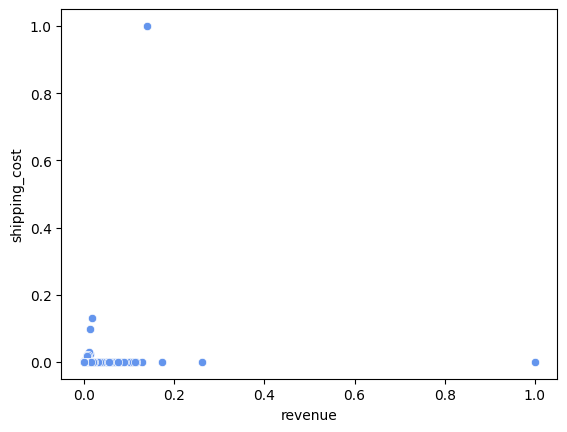

In [56]:
#lets see the scatterplot between this variable
sns.scatterplot (data = cluster , x='revenue', y='shipping_cost', color = 'cornflowerblue')

array([[<AxesSubplot: xlabel='revenue', ylabel='revenue'>,
        <AxesSubplot: xlabel='shipping_cost', ylabel='revenue'>,
        <AxesSubplot: xlabel='total_project_value', ylabel='revenue'>,
        <AxesSubplot: xlabel='price_per_item', ylabel='revenue'>,
        <AxesSubplot: xlabel='quantity', ylabel='revenue'>,
        <AxesSubplot: xlabel='price_total', ylabel='revenue'>,
        <AxesSubplot: xlabel='free_shipping', ylabel='revenue'>,
        <AxesSubplot: xlabel='ppn', ylabel='revenue'>,
        <AxesSubplot: xlabel='weight_total', ylabel='revenue'>,
        <AxesSubplot: xlabel='order_status_encode', ylabel='revenue'>,
        <AxesSubplot: xlabel='payment_group_encode', ylabel='revenue'>,
        <AxesSubplot: xlabel='shipping_agency_encode', ylabel='revenue'>,
        <AxesSubplot: xlabel='group_cat', ylabel='revenue'>],
       [<AxesSubplot: xlabel='revenue', ylabel='shipping_cost'>,
        <AxesSubplot: xlabel='shipping_cost', ylabel='shipping_cost'>,
        <AxesSubp

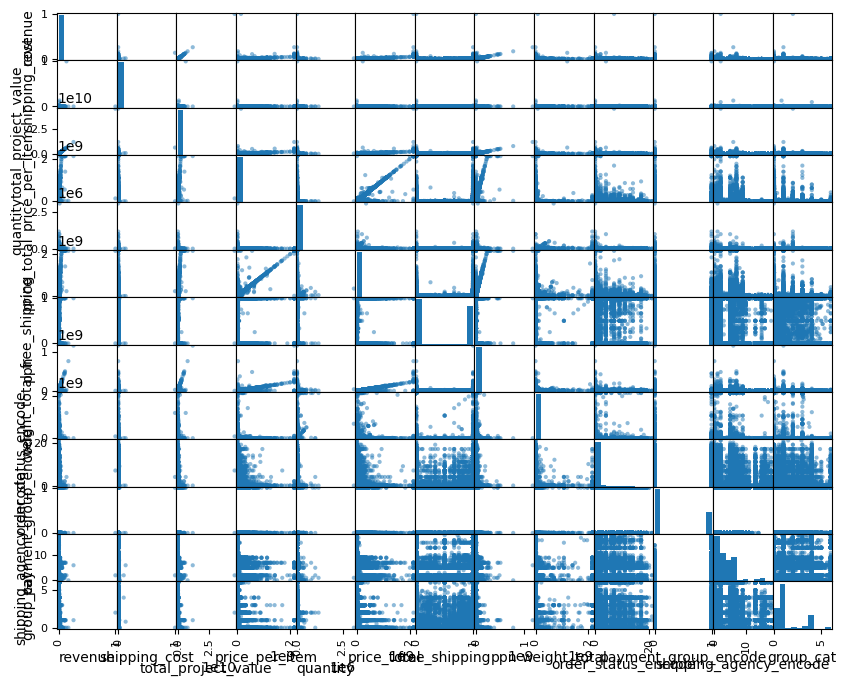

In [57]:
from pandas.plotting import scatter_matrix
scatter_matrix(cluster, figsize = (10,8))

In [58]:
#checking elbow method
from sklearn.cluster import KMeans

distortions = []
K = range(1,11)
for n_clusters in K:
  kmeanModel = KMeans(n_clusters, random_state = 42)
  kmeanModel.fit(cluster)
  distortions.append(kmeanModel.inertia_)

print(distortions)

[5.493383512617507e+21, 3.466784900598805e+21, 2.369050939643078e+21, 1.4398983336635343e+21, 9.101534055200497e+20, 6.750473110297385e+20, 5.3008780860905495e+20, 4.384421917260386e+20, 3.880641561311908e+20, 3.4125216131610804e+20]


<Figure size 1600x800 with 0 Axes>

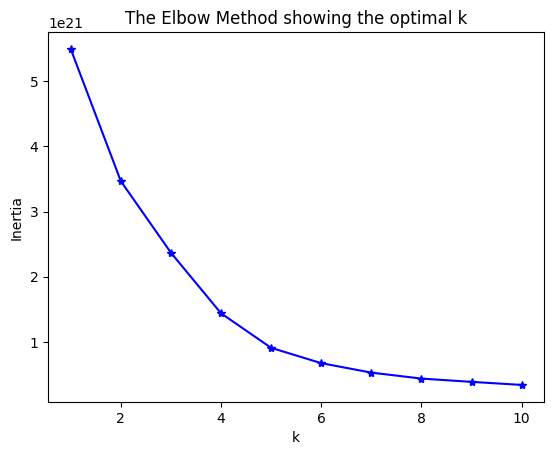

In [59]:
plt.figure(figsize=(16,8))
plt.figure()
plt.plot(K, distortions, 'b*-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [60]:
# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
def silhoutte_analysis(data,cluster=[2,3,4]):
    X = data.to_numpy()

    range_n_clusters = cluster

    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, random_state=10, init = 'k-means++')
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print(
            "For n_clusters =",
            n_clusters,
            "The average silhouette_score is :",
            silhouette_avg,
        )

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(
                np.arange(y_lower, y_upper),
                0,
                ith_cluster_silhouette_values,
                facecolor=color,
                edgecolor=color,
                alpha=0.7,
            )

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(
            X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
        )

        # Labeling the clusters
        centers = clusterer.cluster_centers_
        # Draw white circles at cluster centers
        ax2.scatter(
            centers[:, 0],
            centers[:, 1],
            marker="o",
            c="white",
            alpha=1,
            s=200,
            edgecolor="k",
        )

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(
            "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
            % n_clusters,
            fontsize=14,
            fontweight="bold",
        )

    plt.show()

For n_clusters = 2 The average silhouette_score is : 0.9979715017498656
For n_clusters = 3 The average silhouette_score is : 0.9979475723871128
For n_clusters = 4 The average silhouette_score is : 0.8392063547956443
For n_clusters = 5 The average silhouette_score is : 0.7938102466670696
For n_clusters = 6 The average silhouette_score is : 0.7938158192666019
For n_clusters = 7 The average silhouette_score is : 0.7609420101202871
For n_clusters = 8 The average silhouette_score is : 0.7611732173959608
For n_clusters = 9 The average silhouette_score is : 0.7613479188858526
For n_clusters = 10 The average silhouette_score is : 0.760317526306969


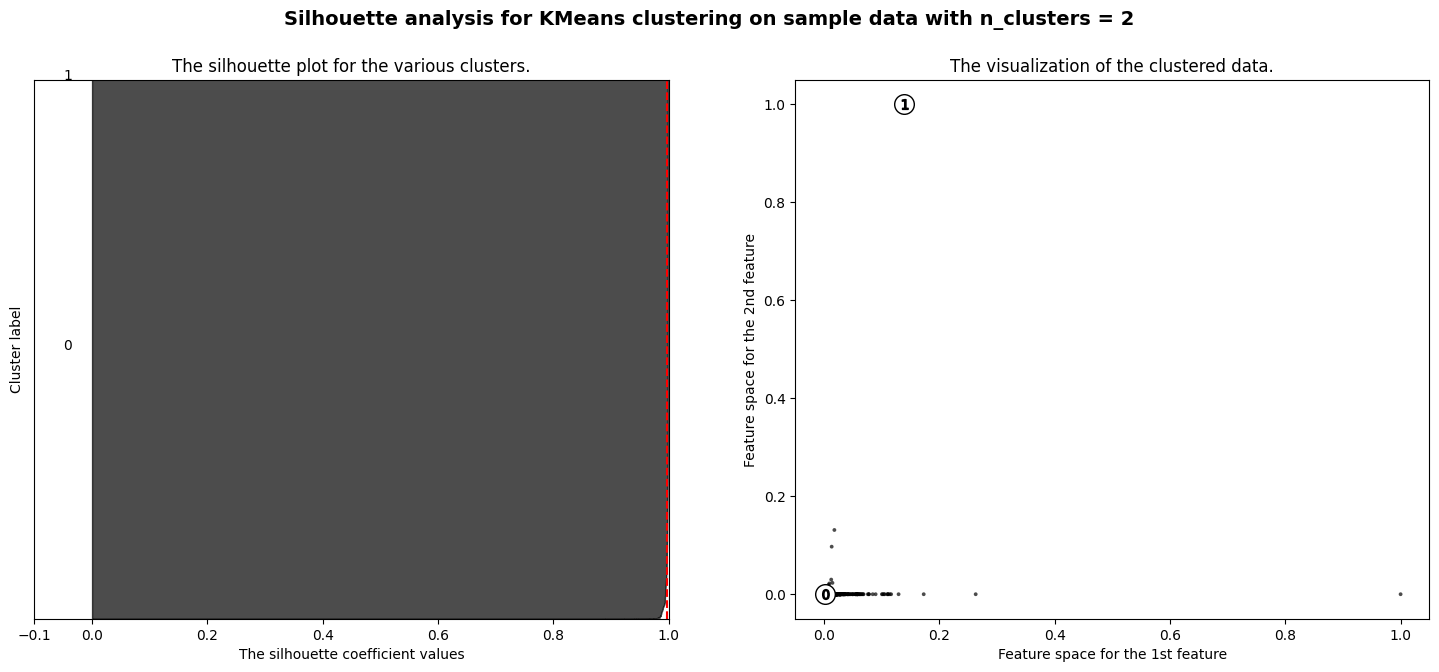

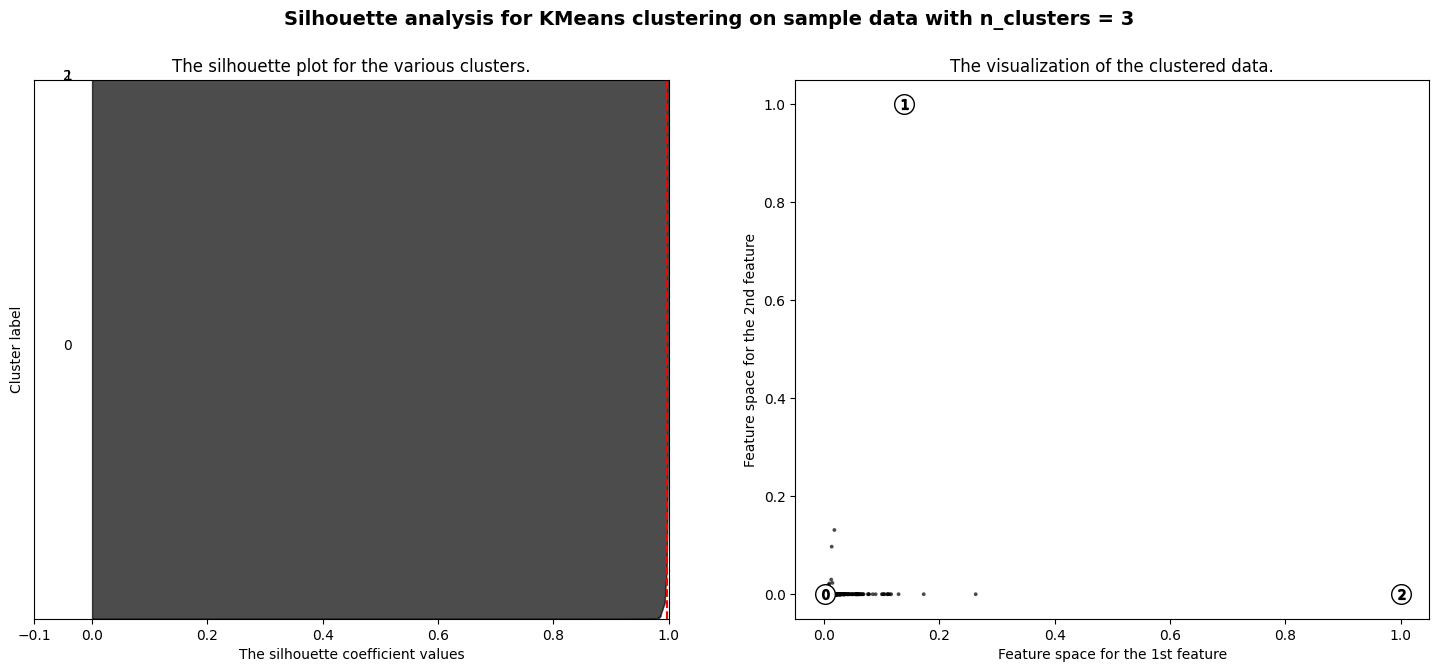

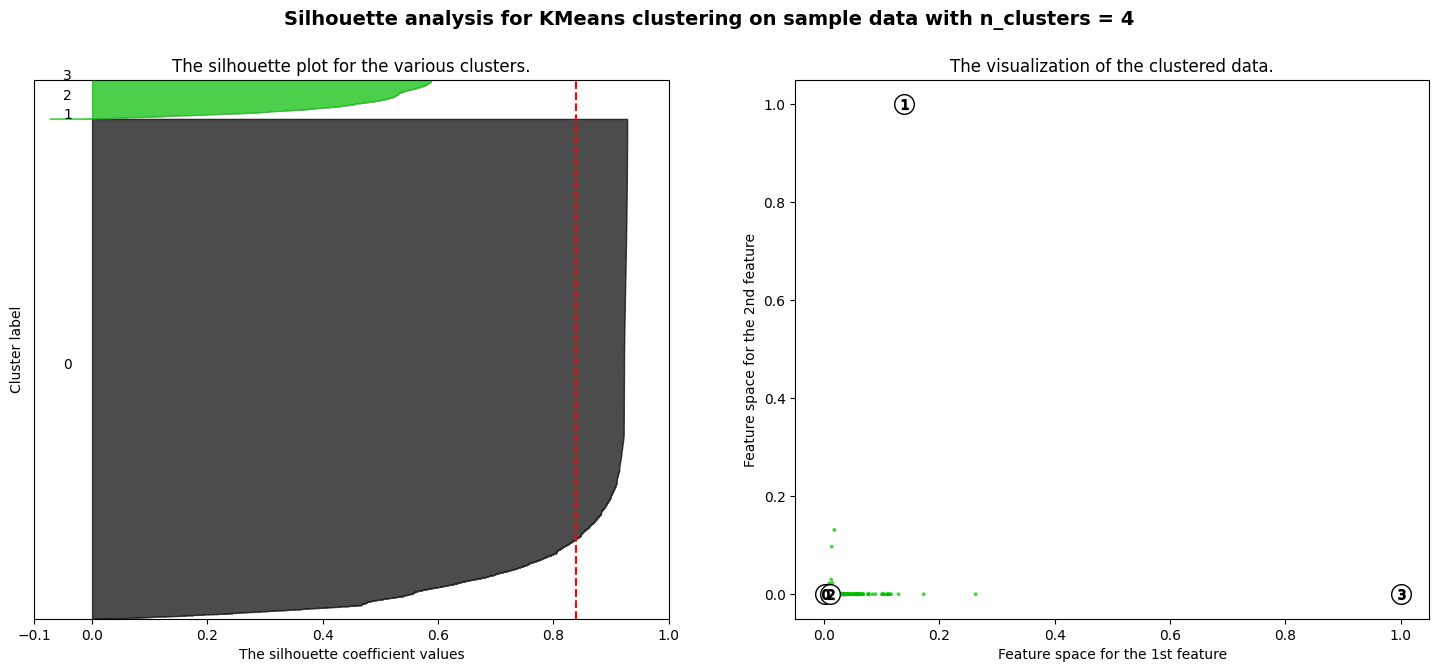

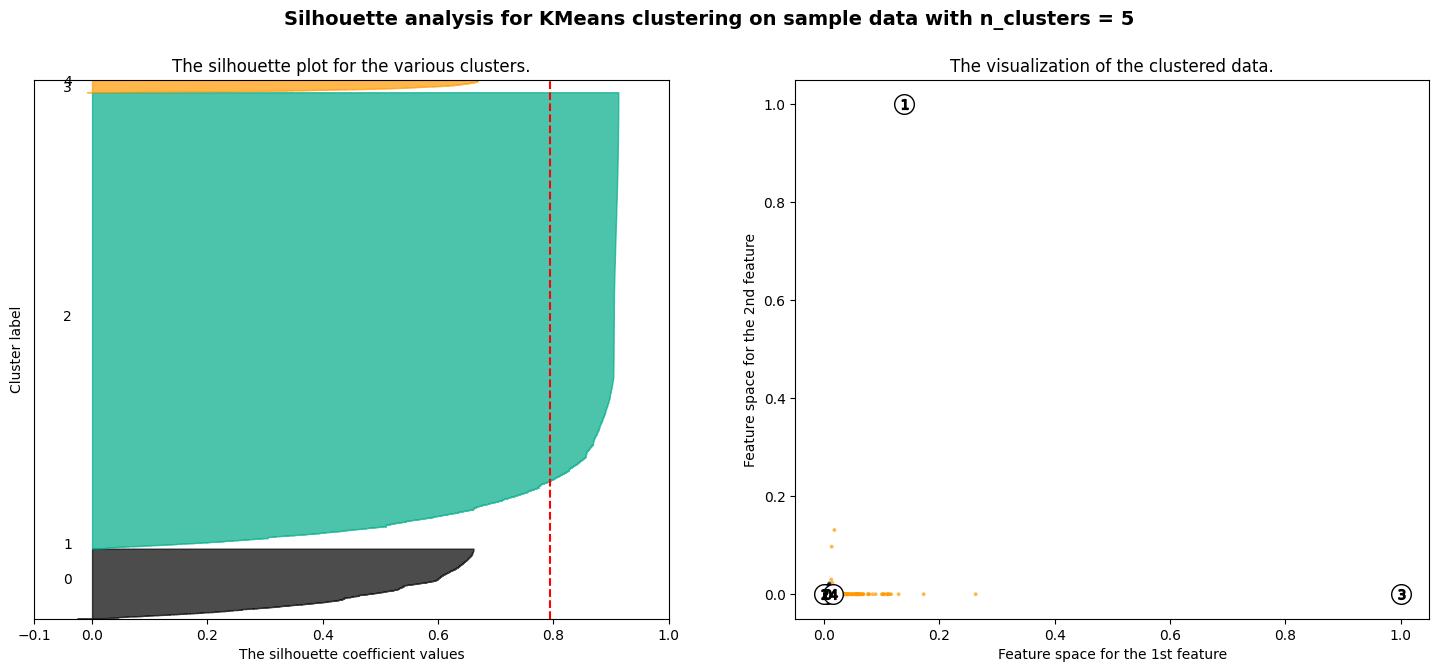

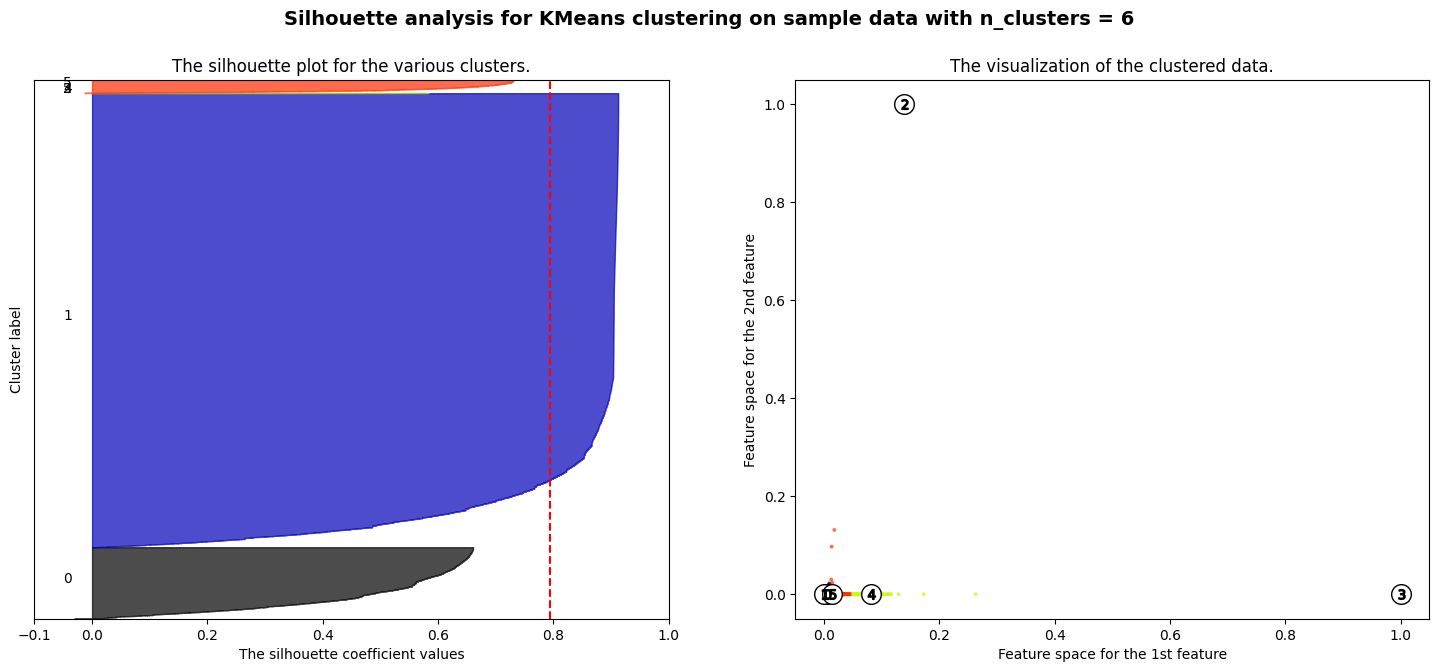

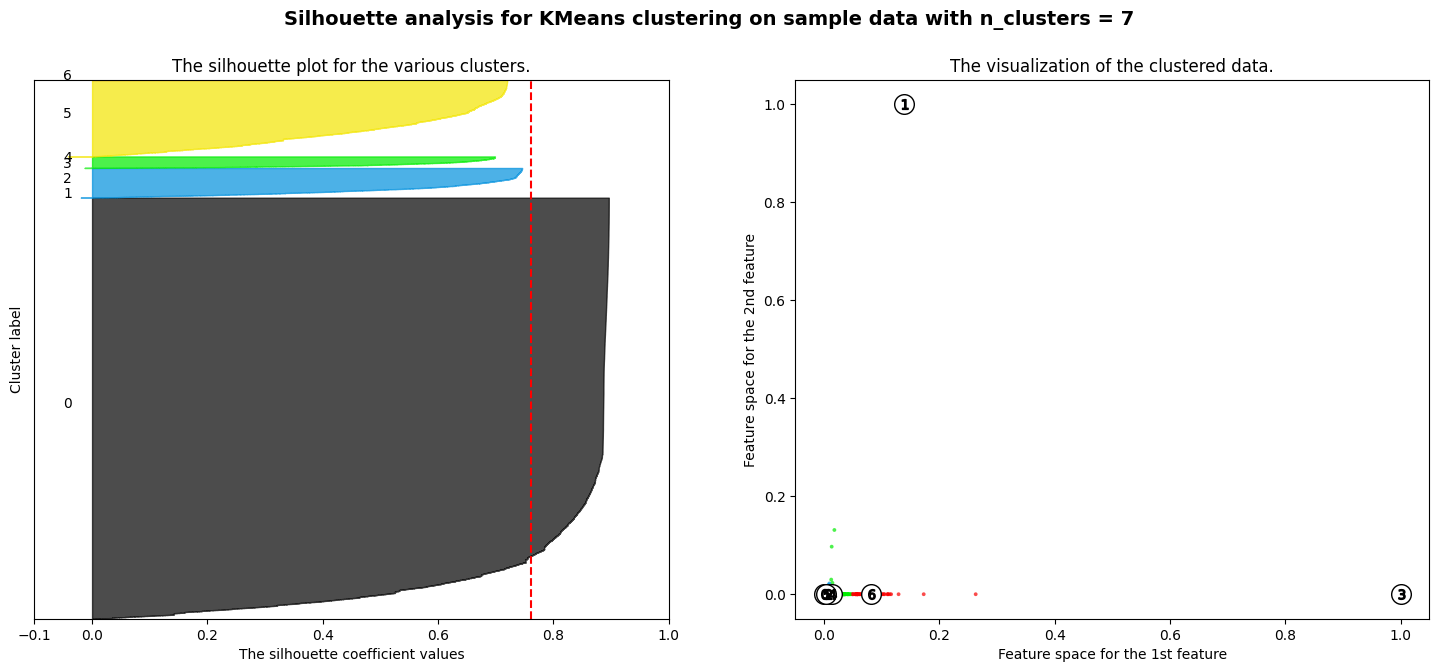

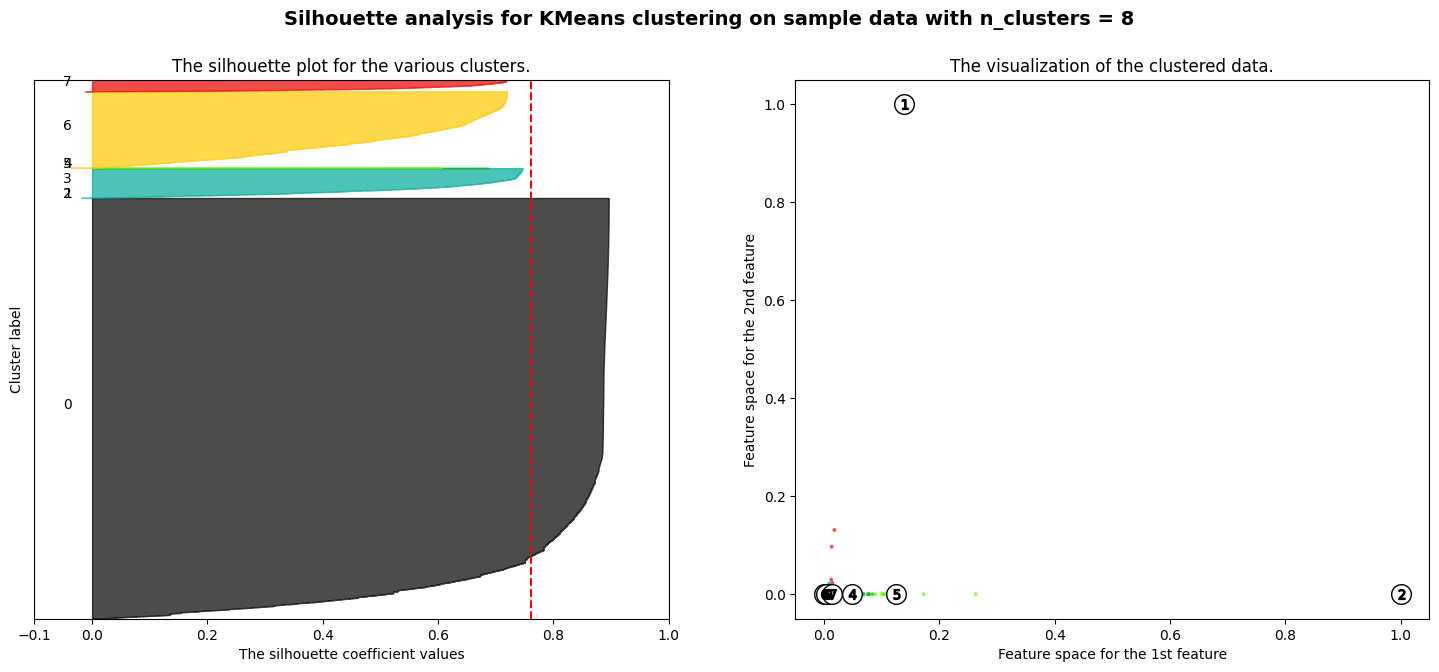

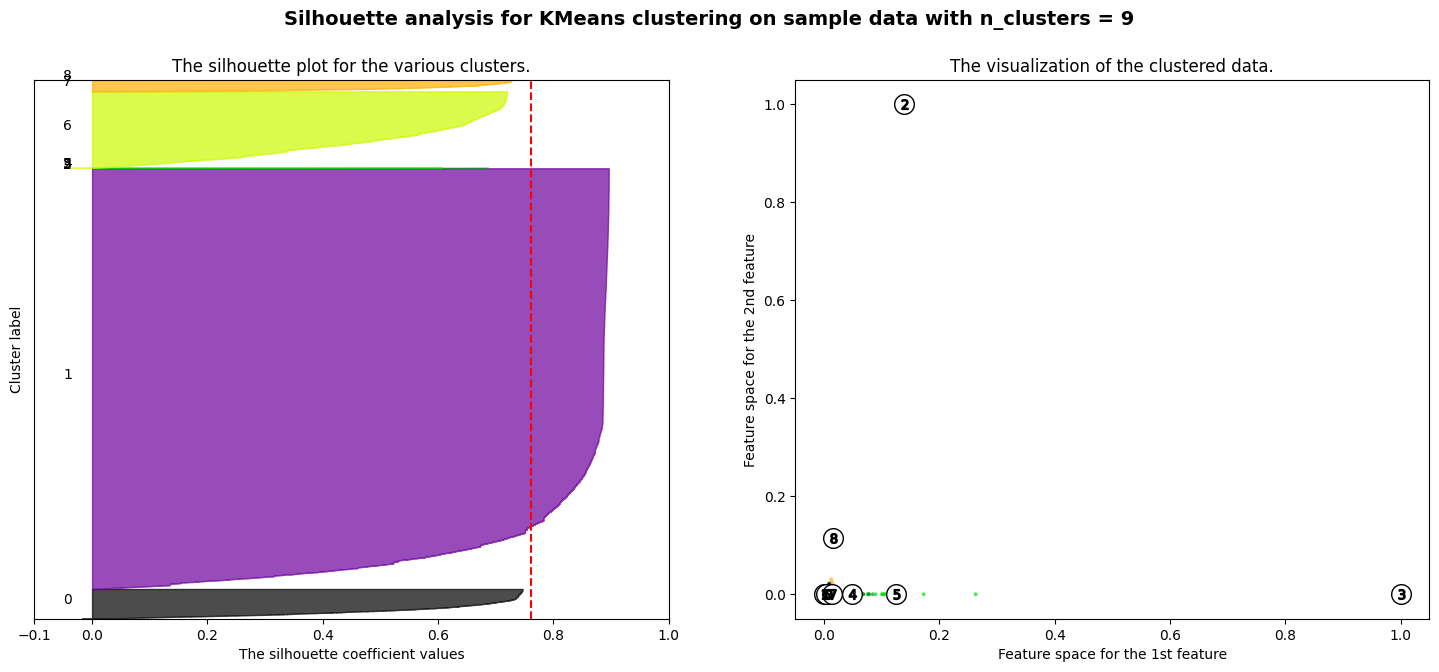

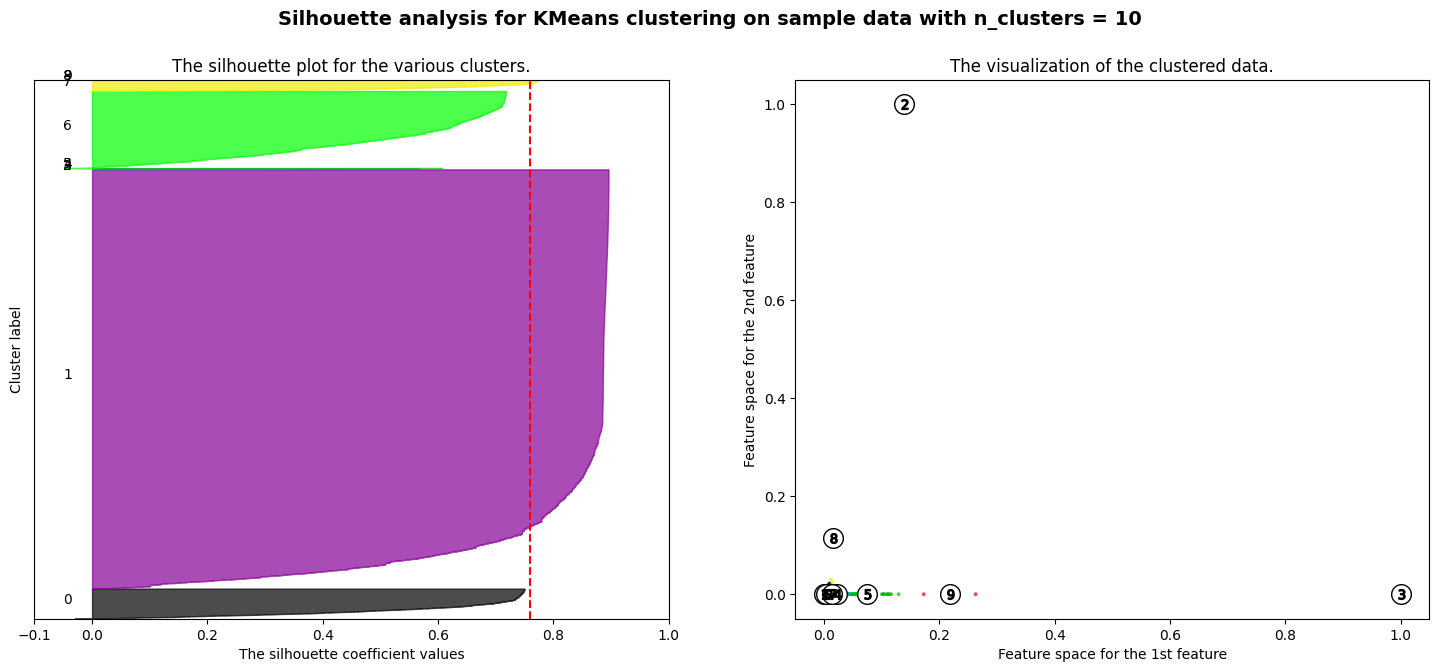

In [61]:
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from matplotlib import cm

# silhouette analysis range between 2-7
silhoutte_analysis(cluster[['revenue','shipping_cost']],list(range(2,11)))

#it seems 3 4 and 5 could be a viable cluster number, but i personally choose 5 because it seems it divides a high purchasing user into 1 cluster

## Predict The Cluster Analysis using K-Means

In [76]:
# lets use fit_predict()

# let make 5 cluster
cluster_model = KMeans(n_clusters=5)
cluster_model.fit_predict(cluster)
cluster['cluster'] = cluster_model.labels_
cluster

revenue  shipping_cost  total_project_value  price_per_item  \
order_id                                                                 
1         0.000140   3.599999e-07            2100120.0    1.025000e+04   
7         0.001430   3.599999e-07           21450000.0    1.950000e+07   
18        0.000368   3.599999e-07            5525000.0    6.500000e+04   
19        0.000053   3.599999e-07             800000.0    5.000000e+03   
22        0.000008   4.943332e-06             119275.0    4.437500e+04   
...            ...            ...                  ...             ...   
476879    0.000435   3.599999e-07            6518600.0    5.398450e+06   
476880    0.015408   5.359998e-06          346611082.0    3.465810e+08   
476881    0.000100   3.599999e-07            1500000.0    1.500000e+03   
476882    0.000828   3.599999e-07           12412075.0    5.665395e+04   
476883    0.000370   3.599999e-07            5550000.0    5.000000e+06   

           quantity    price_total  free_shipping           ppn  weight_total  \
order_id                                                                        
1         41.857143  270285.714286            1.0  29731.428571  12128.571429   
7               1.0     19500000.0            1.0     1950000.0        1000.0   
18             85.0      5525000.0            1.0           0.0       42500.0   
19            100.0       800000.0            1.0           0.0      500000.0   
22              1.0        44375.0            0.0           0.0         750.0   
...             ...            ...            ...           ...           ...   
476879          1.5      2963000.0            0.5      296300.0        2583.5   
476880          1.0    346581082.0            0.0           0.0        1000.0   
476881       1000.0      1500000.0            1.0           0.0       15000.0   
476882    10.210526  294264.473684            1.0  32369.105263  24418.342105   
476883          1.0      5000000.0            0.0      550000.0        8000.0   

          order_status_encode  payment_group_encode  shipping_agency_encode  \
order_id                                                                      
1                         0.0                   0.0                     5.0   
7                         0.0                   0.0                     0.0   
18                        0.0                   0.0                     0.0   
19                        0.0                   0.0                     6.0   
22                        0.0                   1.0                    16.0   
...                       ...                   ...                     ...   
476879                    0.0                   1.0                     5.0   
476880                    0.0                   1.0                     1.0   
476881                    0.0                   0.0                     0.0   
476882                    0.0                   0.0                     5.0   
476883                    0.0                   0.0                     2.0   

          group_cat  cluster  
order_id                      
1          1.000000        0  
7          0.000000        0  
18         4.000000        0  
19         0.000000        0  
22         4.000000        0  
...             ...      ...  
476879     0.500000        0  
476880     0.000000        4  
476881     1.000000        0  
476882     0.421053        0  
476883     1.000000        0  

[159114 rows x 14 columns]

## Analyze Cluster By Revenue

In [63]:
#lets see the population spread if we use 5 segment
cluster.groupby(['cluster']).count()

revenue  shipping_cost  total_project_value  price_per_item  \
cluster                                                                
0         157029         157029               157029          157029   
1              1              1                    1               1   
2             60             60                   60              60   
3            231            231                  231             231   
4           1793           1793                 1793            1793   

         quantity  price_total  free_shipping     ppn  weight_total  \
cluster                                                               
0          157029       157029         157029  157029        157029   
1               1            1              1       1             1   
2              60           60             60      60            60   
3             231          231            231     231           231   
4            1793         1793           1793    1793          1793   

         order_status_encode  payment_group_encode  shipping_agency_encode  \
cluster                                                                      
0                     157029                157029                  157029   
1                          1                     1                       1   
2                         60                    60                      60   
3                        231                   231                     231   
4                       1793                  1793                    1793   

         group_cat  
cluster             
0           157029  
1                1  
2               60  
3              231  
4             1793

<AxesSubplot: xlabel='cluster', ylabel='shipping_cost'>

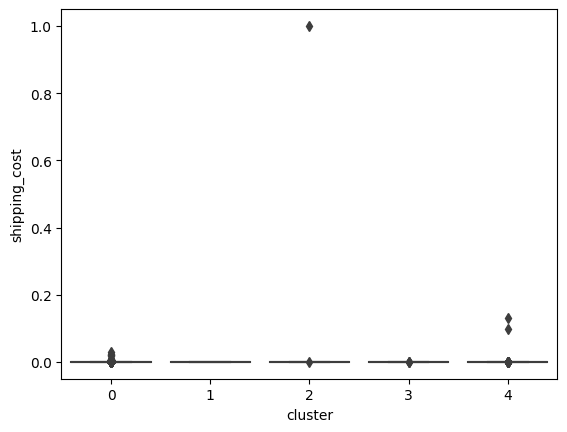

In [64]:
# lets check the data distribution of Age
sns.boxplot (data =cluster , x ='cluster' , y ='shipping_cost')

<AxesSubplot: xlabel='shipping_cost', ylabel='revenue'>

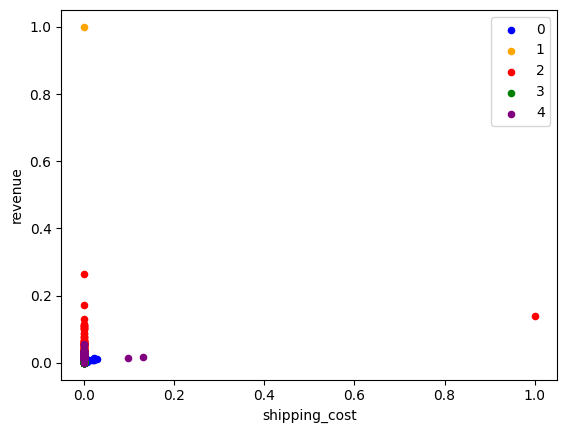

In [65]:
# Make scatter plot based on cluster then mix it in one figure with a more noticeable color
ax = cluster[cluster['cluster'] == 0].plot.scatter(x='shipping_cost', y='revenue', c='blue', label='0')
ax = cluster[cluster['cluster'] == 1].plot.scatter(x='shipping_cost', y='revenue', c='orange', label='1', ax=ax)
ax = cluster[cluster['cluster'] == 2].plot.scatter(x='shipping_cost', y='revenue', c='red', label='2', ax=ax)
ax = cluster[cluster['cluster'] == 3].plot.scatter(x='shipping_cost', y='revenue', c='green', label='3', ax=ax)
ax = cluster[cluster['cluster'] == 4].plot.scatter(x='shipping_cost', y='revenue', c='purple', label='4', ax=ax)
ax

## Clustering By Total Project

In [66]:
clustering = cluster_df.copy()
clustering['revenue'] = clustering['revenue']
clustering['seller_id'] = clustering['seller_id']

# Let's drop the columns we don't use for the cluster analysis
list_columns = clustering.columns.to_list()
drop_columns = list_columns[33:43]
clustering = clustering.drop(columns=drop_columns, axis=1)
tclustering = clustering.groupby(['order_id', 'revenue'], as_index=False).mean()
tclustering

/tmp/ipykernel_32/1640117943.py:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tclustering = clustering.groupby(['order_id', 'revenue'], as_index=False).mean()


order_id  revenue  shipping_cost  total_project_value  price_per_item  \
0              1    15750            0.0            2100120.0    1.025000e+04   
1              7   160875            0.0           21450000.0    1.950000e+07   
2             18    41437            0.0            5525000.0    6.500000e+04   
3             19     6000            0.0             800000.0    5.000000e+03   
4             22      894        27500.0             119275.0    4.437500e+04   
...          ...      ...            ...                  ...             ...   
159114    476879    48889            0.0            6518600.0    5.398450e+06   
159115    476880  1733055        30000.0          346611082.0    3.465810e+08   
159116    476881    11250            0.0            1500000.0    1.500000e+03   
159117    476882    93090            0.0           12412075.0    5.665395e+04   
159118    476883    41625            0.0            5550000.0    5.000000e+06   

         quantity    price_total  free_shipping           ppn  weight_total  \
0       41.857143  270285.714286            1.0  29731.428571  12128.571429   
1             1.0     19500000.0            1.0     1950000.0        1000.0   
2            85.0      5525000.0            1.0           0.0       42500.0   
3           100.0       800000.0            1.0           0.0      500000.0   
4             1.0        44375.0            0.0           0.0         750.0   
...           ...            ...            ...           ...           ...   
159114        1.5      2963000.0            0.5      296300.0        2583.5   
159115        1.0    346581082.0            0.0           0.0        1000.0   
159116     1000.0      1500000.0            1.0           0.0       15000.0   
159117  10.210526  294264.473684            1.0  32369.105263  24418.342105   
159118        1.0      5000000.0            0.0      550000.0        8000.0   

        order_status_encode  payment_group_encode  shipping_agency_encode  \
0                       0.0                   0.0                     5.0   
1                       0.0                   0.0                     0.0   
2                       0.0                   0.0                     0.0   
3                       0.0                   0.0                     6.0   
4                       0.0                   1.0                    16.0   
...                     ...                   ...                     ...   
159114                  0.0                   1.0                     5.0   
159115                  0.0                   1.0                     1.0   
159116                  0.0                   0.0                     0.0   
159117                  0.0                   0.0                     5.0   
159118                  0.0                   0.0                     2.0   

        group_cat  
0        1.000000  
1        0.000000  
2        4.000000  
3        0.000000  
4        4.000000  
...           ...  
159114   0.500000  
159115   0.000000  
159116   1.000000  
159117   0.421053  
159118   1.000000  

[159119 rows x 14 columns]

In [67]:
#transform the categorical
tclustering = tclustering.set_index('order_id')
group_clustering2 = tclustering[(rclustering['revenue']>=1)]
group_clustering2

revenue  shipping_cost  total_project_value  price_per_item  \
order_id                                                                
1           15750            0.0            2100120.0    1.025000e+04   
7          160875            0.0           21450000.0    1.950000e+07   
18          41437            0.0            5525000.0    6.500000e+04   
19           6000            0.0             800000.0    5.000000e+03   
22            894        27500.0             119275.0    4.437500e+04   
...           ...            ...                  ...             ...   
476879      48889            0.0            6518600.0    5.398450e+06   
476880    1733055        30000.0          346611082.0    3.465810e+08   
476881      11250            0.0            1500000.0    1.500000e+03   
476882      93090            0.0           12412075.0    5.665395e+04   
476883      41625            0.0            5550000.0    5.000000e+06   

           quantity    price_total  free_shipping           ppn  weight_total  \
order_id                                                                        
1         41.857143  270285.714286            1.0  29731.428571  12128.571429   
7               1.0     19500000.0            1.0     1950000.0        1000.0   
18             85.0      5525000.0            1.0           0.0       42500.0   
19            100.0       800000.0            1.0           0.0      500000.0   
22              1.0        44375.0            0.0           0.0         750.0   
...             ...            ...            ...           ...           ...   
476879          1.5      2963000.0            0.5      296300.0        2583.5   
476880          1.0    346581082.0            0.0           0.0        1000.0   
476881       1000.0      1500000.0            1.0           0.0       15000.0   
476882    10.210526  294264.473684            1.0  32369.105263  24418.342105   
476883          1.0      5000000.0            0.0      550000.0        8000.0   

          order_status_encode  payment_group_encode  shipping_agency_encode  \
order_id                                                                      
1                         0.0                   0.0                     5.0   
7                         0.0                   0.0                     0.0   
18                        0.0                   0.0                     0.0   
19                        0.0                   0.0                     6.0   
22                        0.0                   1.0                    16.0   
...                       ...                   ...                     ...   
476879                    0.0                   1.0                     5.0   
476880                    0.0                   1.0                     1.0   
476881                    0.0                   0.0                     0.0   
476882                    0.0                   0.0                     5.0   
476883                    0.0                   0.0                     2.0   

          group_cat  
order_id             
1          1.000000  
7          0.000000  
18         4.000000  
19         0.000000  
22         4.000000  
...             ...  
476879     0.500000  
476880     0.000000  
476881     1.000000  
476882     0.421053  
476883     1.000000  

[159114 rows x 13 columns]

In [68]:
# Define Standard Scale dataset
cluster2 = group_clustering2.copy()

# Scaling numeric total_buy
numeric = ['revenue','total_project_value']

# using Standard Scaler
ss_scaler = MinMaxScaler()
cluster2[numeric] = ss_scaler.fit_transform(cluster[numeric])
cluster2.head()

revenue  shipping_cost  total_project_value  price_per_item  \
order_id                                                                 
1         0.000140            0.0             0.000047         10250.0   
7         0.001430            0.0             0.000477      19500000.0   
18        0.000368            0.0             0.000123         65000.0   
19        0.000053            0.0             0.000018          5000.0   
22        0.000008        27500.0             0.000003         44375.0   

           quantity    price_total  free_shipping           ppn  weight_total  \
order_id                                                                        
1         41.857143  270285.714286            1.0  29731.428571  12128.571429   
7               1.0     19500000.0            1.0     1950000.0        1000.0   
18             85.0      5525000.0            1.0           0.0       42500.0   
19            100.0       800000.0            1.0           0.0      500000.0   
22              1.0        44375.0            0.0           0.0         750.0   

          order_status_encode  payment_group_encode  shipping_agency_encode  \
order_id                                                                      
1                         0.0                   0.0                     5.0   
7                         0.0                   0.0                     0.0   
18                        0.0                   0.0                     0.0   
19                        0.0                   0.0                     6.0   
22                        0.0                   1.0                    16.0   

          group_cat  
order_id             
1               1.0  
7               0.0  
18              4.0  
19              0.0  
22              4.0

<AxesSubplot: xlabel='revenue', ylabel='total_project_value'>

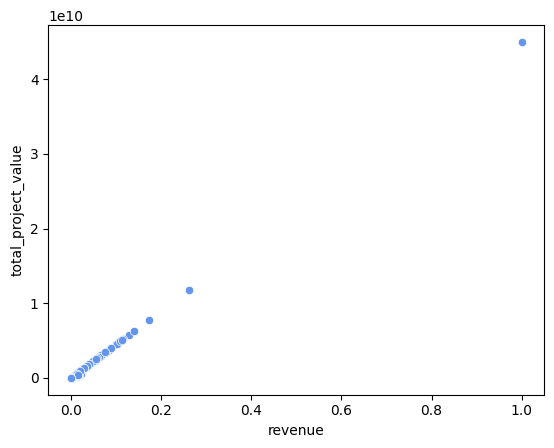

In [69]:
#lets see the scatterplot between this variable
sns.scatterplot (data = cluster , x='revenue', y='total_project_value', color = 'cornflowerblue')

array([[<AxesSubplot: xlabel='revenue', ylabel='revenue'>,
        <AxesSubplot: xlabel='shipping_cost', ylabel='revenue'>,
        <AxesSubplot: xlabel='total_project_value', ylabel='revenue'>,
        <AxesSubplot: xlabel='price_per_item', ylabel='revenue'>,
        <AxesSubplot: xlabel='quantity', ylabel='revenue'>,
        <AxesSubplot: xlabel='price_total', ylabel='revenue'>,
        <AxesSubplot: xlabel='free_shipping', ylabel='revenue'>,
        <AxesSubplot: xlabel='ppn', ylabel='revenue'>,
        <AxesSubplot: xlabel='weight_total', ylabel='revenue'>,
        <AxesSubplot: xlabel='order_status_encode', ylabel='revenue'>,
        <AxesSubplot: xlabel='payment_group_encode', ylabel='revenue'>,
        <AxesSubplot: xlabel='shipping_agency_encode', ylabel='revenue'>,
        <AxesSubplot: xlabel='group_cat', ylabel='revenue'>],
       [<AxesSubplot: xlabel='revenue', ylabel='shipping_cost'>,
        <AxesSubplot: xlabel='shipping_cost', ylabel='shipping_cost'>,
        <AxesSubp

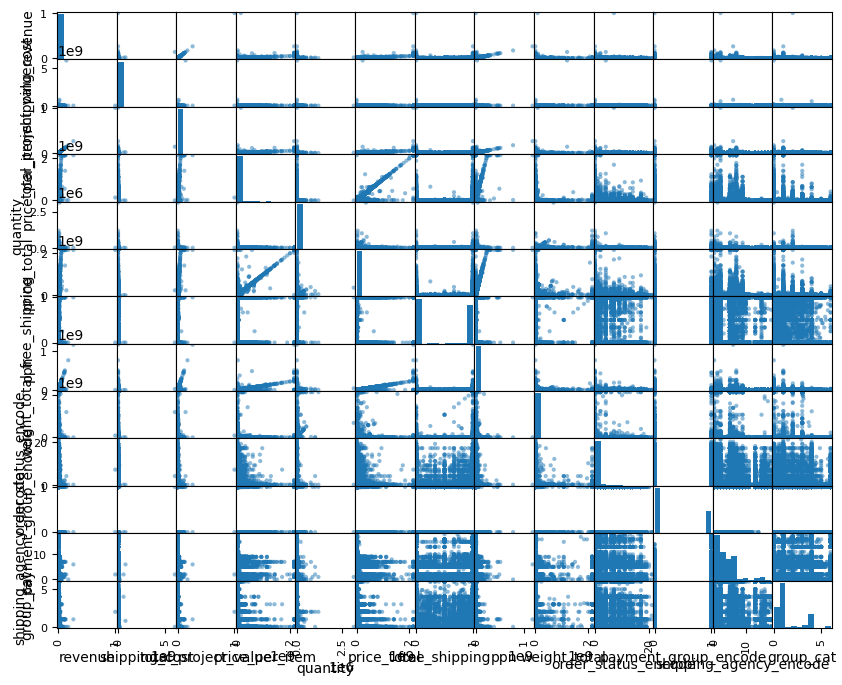

In [70]:
from pandas.plotting import scatter_matrix
scatter_matrix(cluster2, figsize = (10,8))

In [71]:
#checking elbow method
from sklearn.cluster import KMeans

distortions = []
K = range(1,11)
for n_clusters in K:
  kmeanModel = KMeans(n_clusters, random_state = 42)
  kmeanModel.fit(cluster2)
  distortions.append(kmeanModel.inertia_)

print(distortions)

[2.179877722311834e+21, 1.245353114348486e+21, 6.656145313322209e+20, 4.1823350830923966e+20, 3.3047369563537146e+20, 2.582578843819401e+20, 2.049066120674798e+20, 1.6899948374616913e+20, 1.424129792369909e+20, 1.2220194432398875e+20]


<Figure size 1600x800 with 0 Axes>

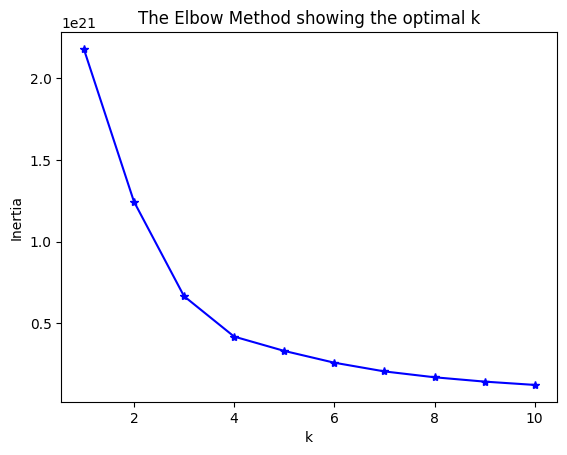

In [72]:
plt.figure(figsize=(16,8))
plt.figure()
plt.plot(K, distortions, 'b*-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('The Elbow Method showing the optimal k')
plt.show()

For n_clusters = 2 The average silhouette_score is : 0.9991814921425972
For n_clusters = 3 The average silhouette_score is : 0.9892086251511957
For n_clusters = 4 The average silhouette_score is : 0.9216562218366534
For n_clusters = 5 The average silhouette_score is : 0.839165433742938
For n_clusters = 6 The average silhouette_score is : 0.8153624700116856
For n_clusters = 7 The average silhouette_score is : 0.7961136923277297
For n_clusters = 8 The average silhouette_score is : 0.796128764514054
For n_clusters = 9 The average silhouette_score is : 0.7952482883605648
For n_clusters = 10 The average silhouette_score is : 0.7626182459771639


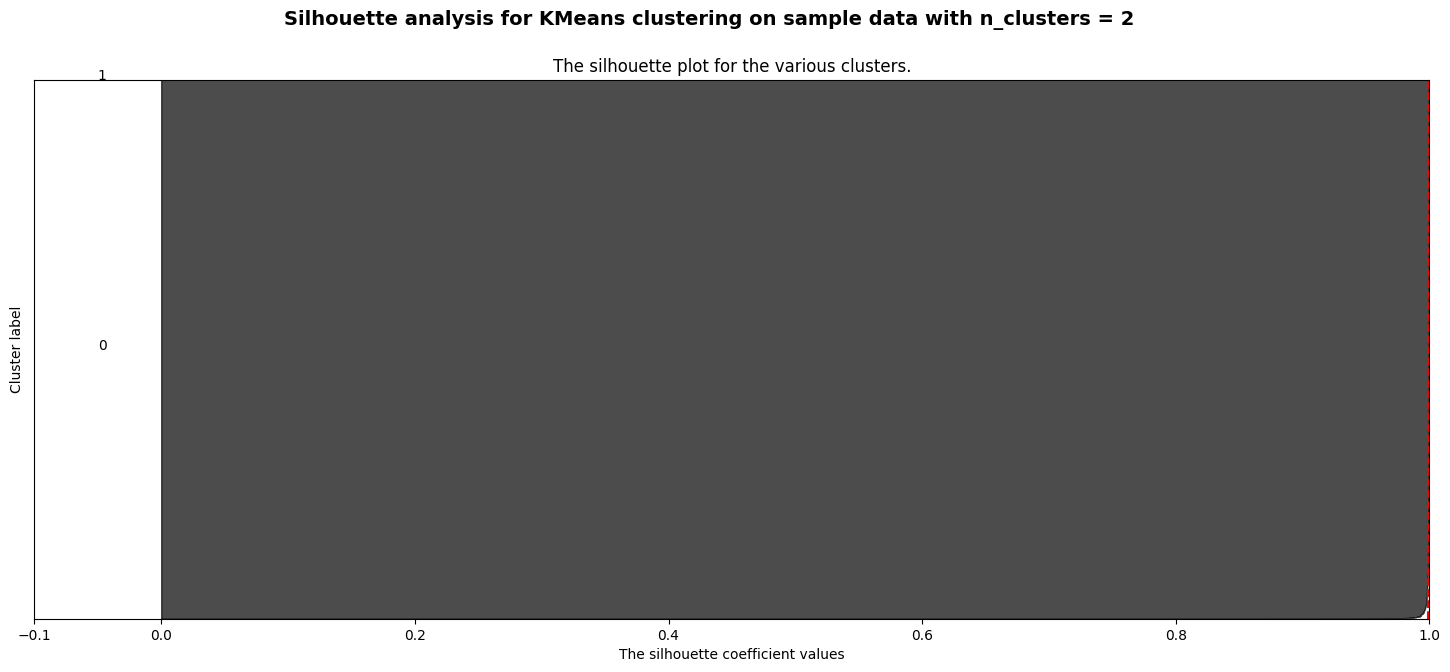

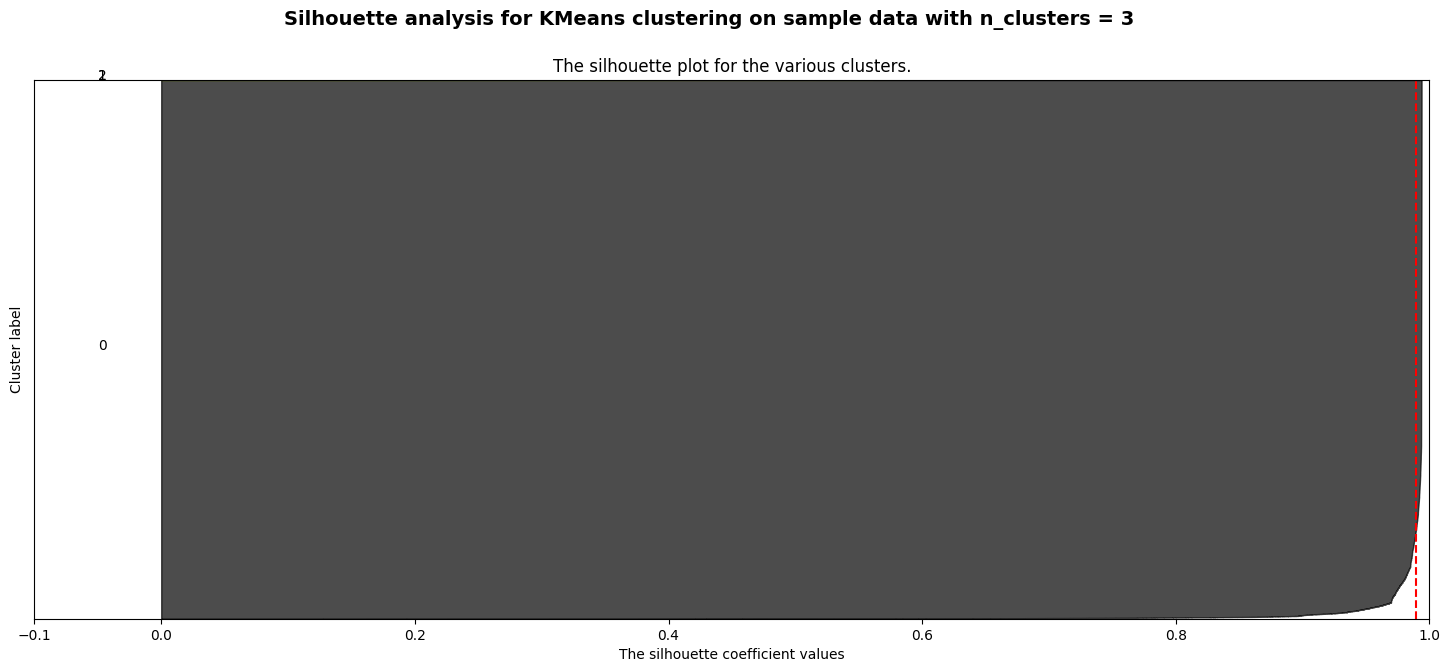

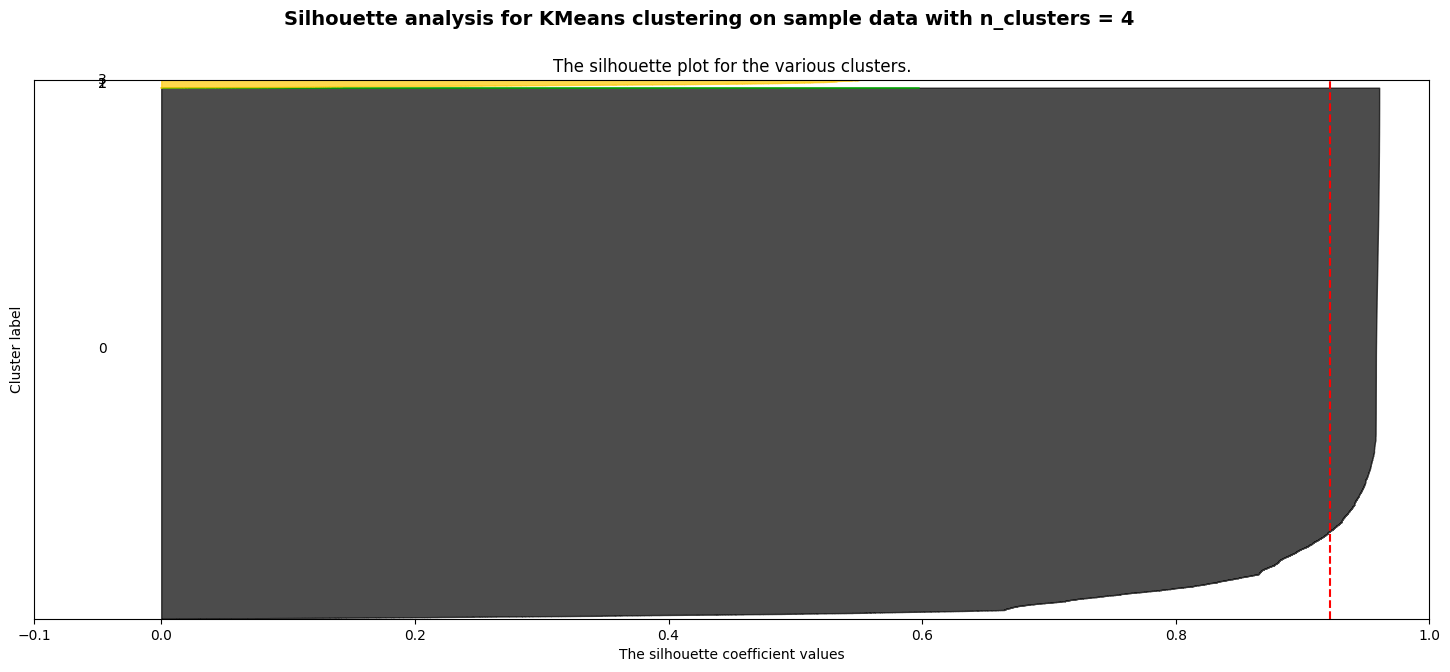

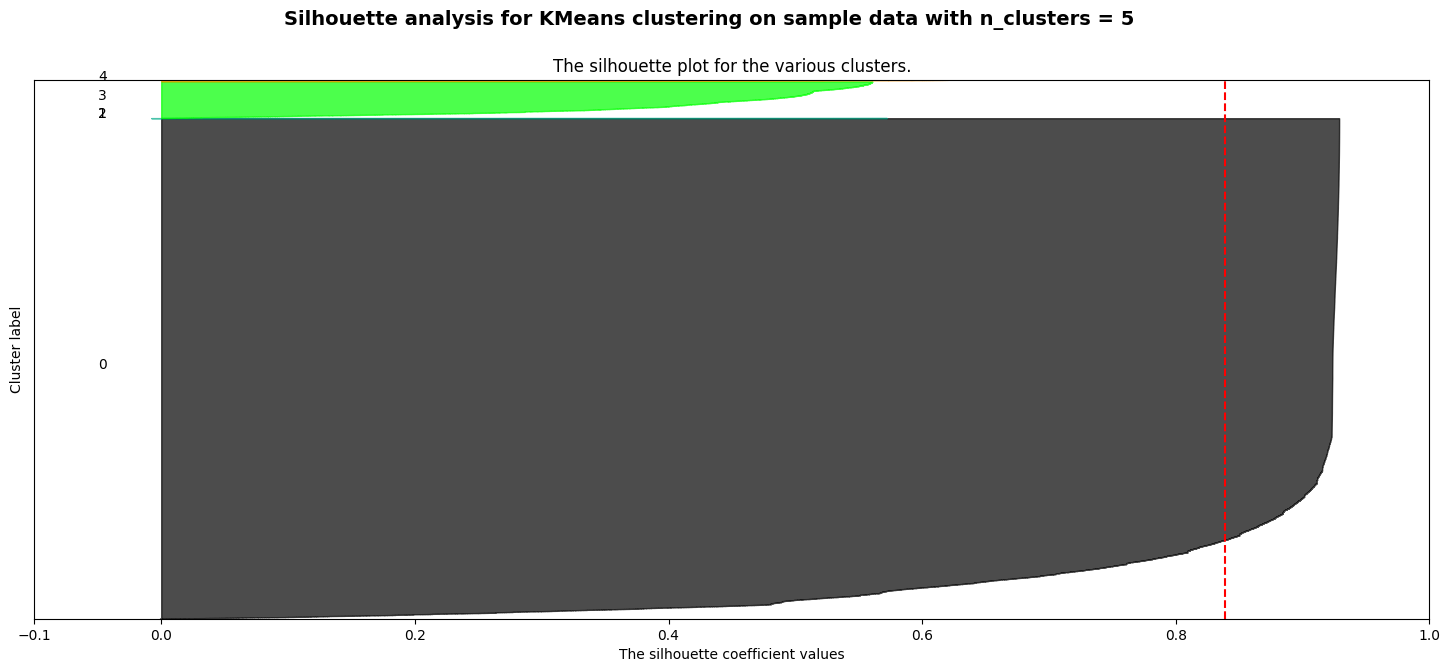

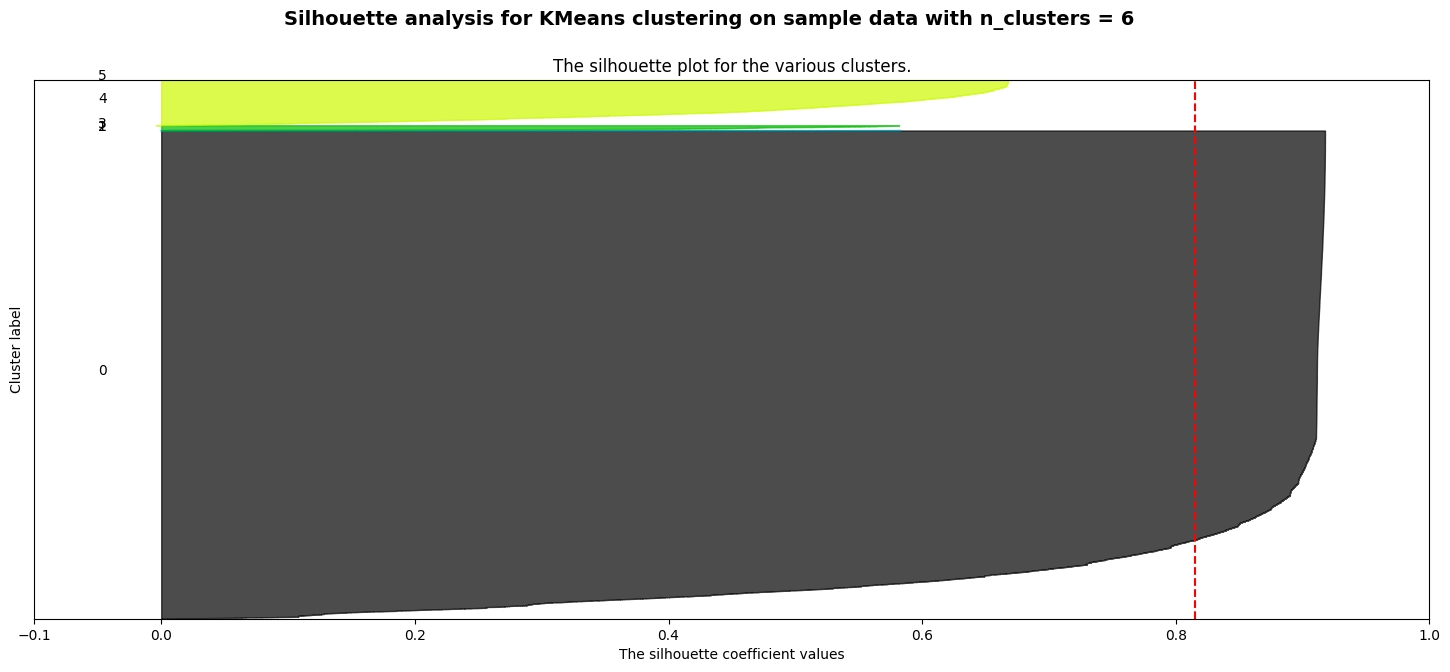

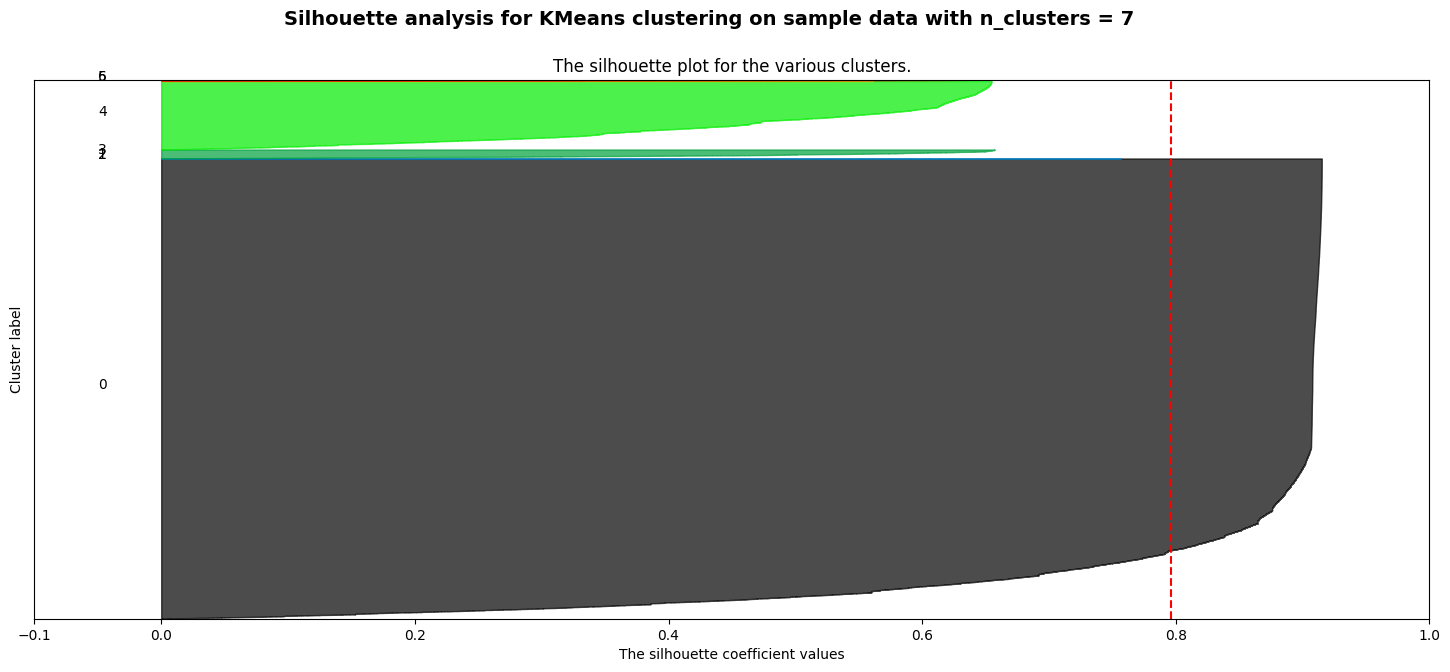

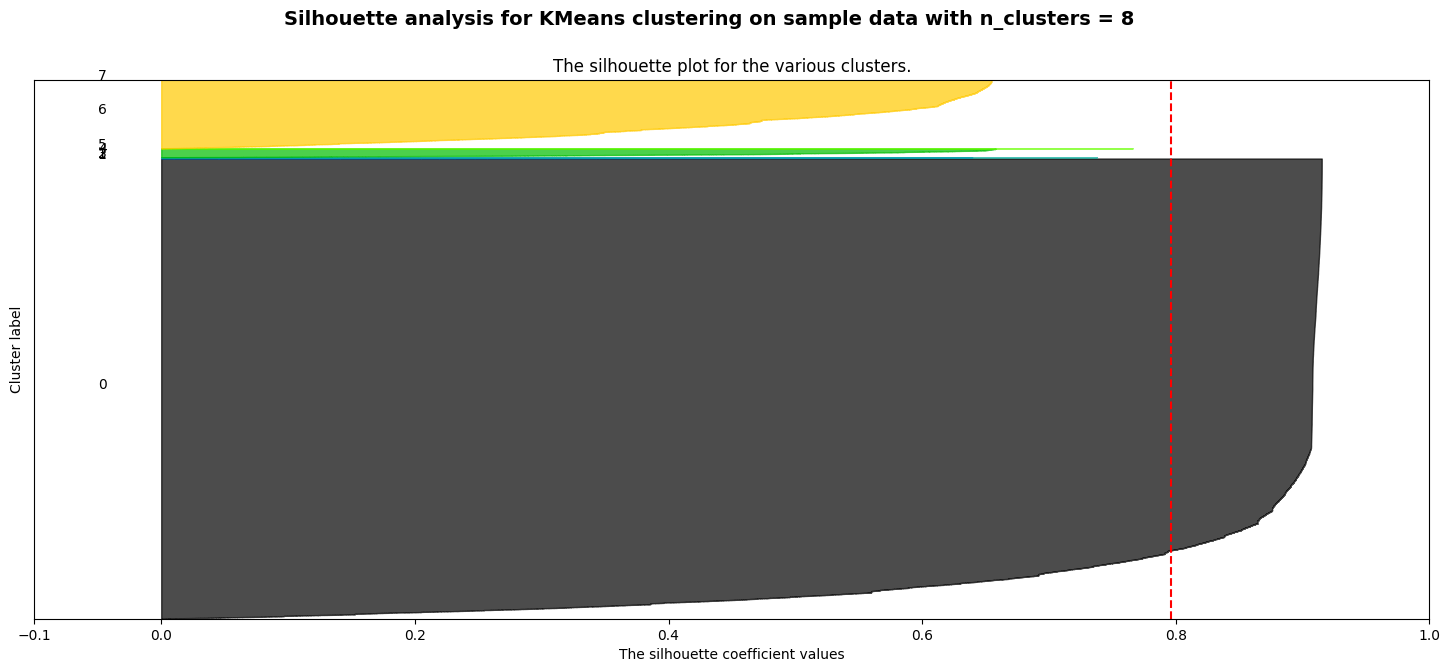

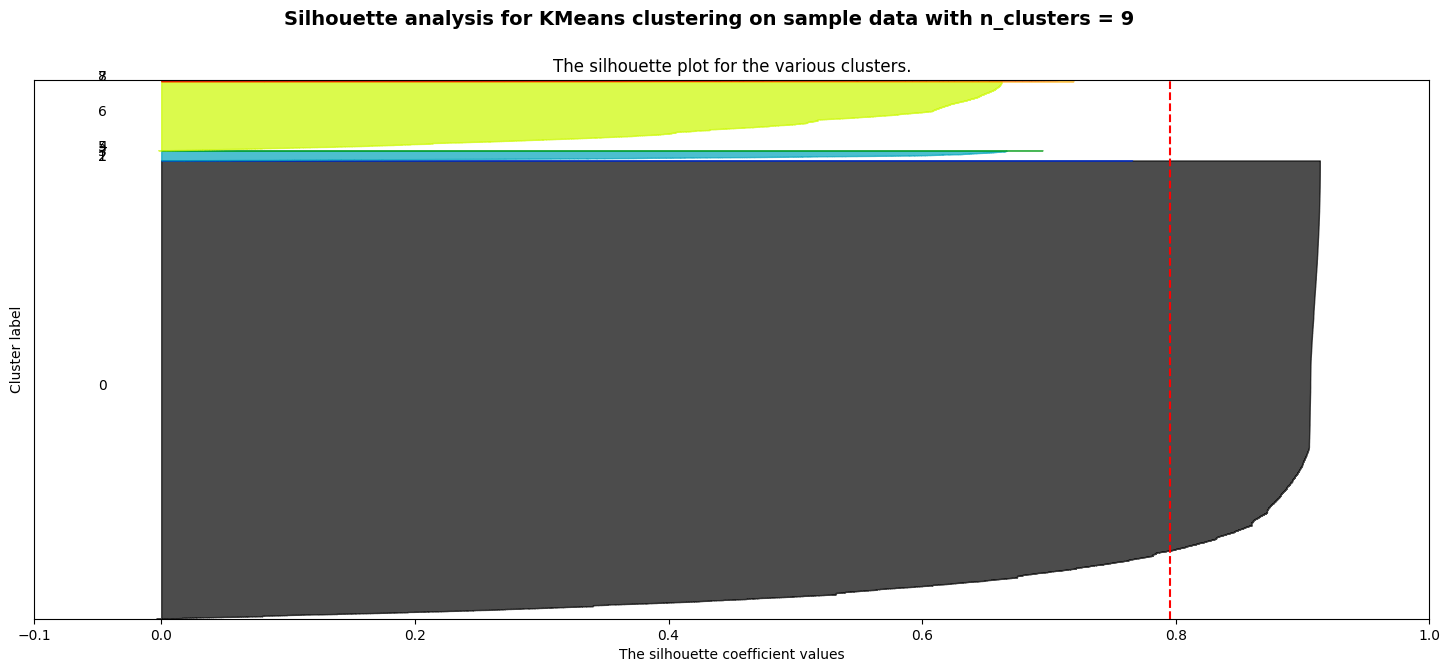

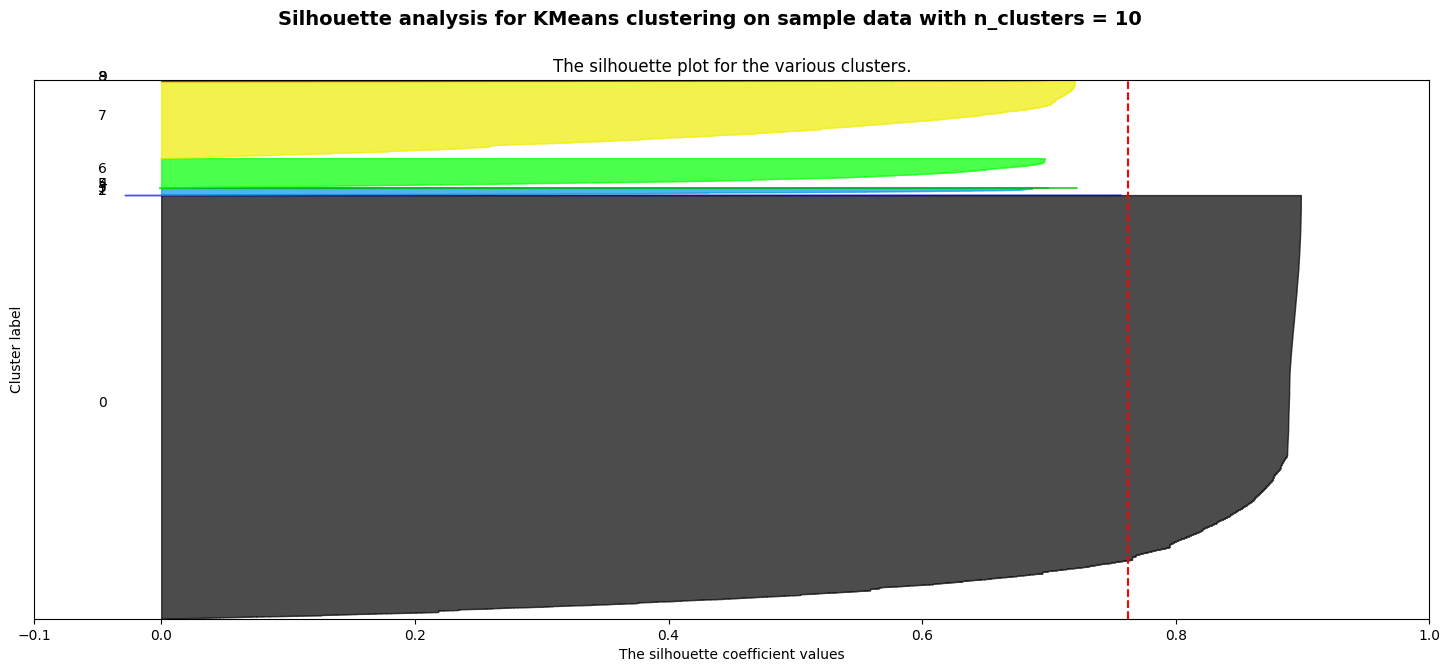

In [73]:
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np

def silhouette_analysis(X, range_n_clusters):
    for n_clusters in range_n_clusters:
        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, random_state=10)
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        silhouette_avg = silhouette_score(X, cluster_labels)
        print("For n_clusters =", n_clusters, 
              "The average silhouette_score is :", silhouette_avg)

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        # Create a subplot with 1 row and 1 column
        fig, ax1 = plt.subplots(1, 1)
        fig.set_size_inches(18, 7)

        # The silhouette coefficient can range from -1, 1 but in this example all
        # lies within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = \
                sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                      "with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')

    plt.show()

# Assuming 'cluster' is your DataFrame and has the columns 'revenue' and 'total_project_value'
# Replace this with your actual data
silhouette_analysis(cluster[['revenue', 'total_project_value']], range(2, 11))

## Analyze Cluster

In [74]:
# lets use fit_predict()

# let make 5 cluster
cluster_model = KMeans(n_clusters=5)
cluster_model.fit_predict(cluster)
cluster['cluster'] = cluster_model.labels_
cluster

revenue  shipping_cost  total_project_value  price_per_item  \
order_id                                                                 
1         0.000140   3.599999e-07            2100120.0    1.025000e+04   
7         0.001430   3.599999e-07           21450000.0    1.950000e+07   
18        0.000368   3.599999e-07            5525000.0    6.500000e+04   
19        0.000053   3.599999e-07             800000.0    5.000000e+03   
22        0.000008   4.943332e-06             119275.0    4.437500e+04   
...            ...            ...                  ...             ...   
476879    0.000435   3.599999e-07            6518600.0    5.398450e+06   
476880    0.015408   5.359998e-06          346611082.0    3.465810e+08   
476881    0.000100   3.599999e-07            1500000.0    1.500000e+03   
476882    0.000828   3.599999e-07           12412075.0    5.665395e+04   
476883    0.000370   3.599999e-07            5550000.0    5.000000e+06   

           quantity    price_total  free_shipping           ppn  weight_total  \
order_id                                                                        
1         41.857143  270285.714286            1.0  29731.428571  12128.571429   
7               1.0     19500000.0            1.0     1950000.0        1000.0   
18             85.0      5525000.0            1.0           0.0       42500.0   
19            100.0       800000.0            1.0           0.0      500000.0   
22              1.0        44375.0            0.0           0.0         750.0   
...             ...            ...            ...           ...           ...   
476879          1.5      2963000.0            0.5      296300.0        2583.5   
476880          1.0    346581082.0            0.0           0.0        1000.0   
476881       1000.0      1500000.0            1.0           0.0       15000.0   
476882    10.210526  294264.473684            1.0  32369.105263  24418.342105   
476883          1.0      5000000.0            0.0      550000.0        8000.0   

          order_status_encode  payment_group_encode  shipping_agency_encode  \
order_id                                                                      
1                         0.0                   0.0                     5.0   
7                         0.0                   0.0                     0.0   
18                        0.0                   0.0                     0.0   
19                        0.0                   0.0                     6.0   
22                        0.0                   1.0                    16.0   
...                       ...                   ...                     ...   
476879                    0.0                   1.0                     5.0   
476880                    0.0                   1.0                     1.0   
476881                    0.0                   0.0                     0.0   
476882                    0.0                   0.0                     5.0   
476883                    0.0                   0.0                     2.0   

          group_cat  cluster  
order_id                      
1          1.000000        0  
7          0.000000        0  
18         4.000000        0  
19         0.000000        0  
22         4.000000        0  
...             ...      ...  
476879     0.500000        0  
476880     0.000000        4  
476881     1.000000        0  
476882     0.421053        0  
476883     1.000000        0  

[159114 rows x 14 columns]

<AxesSubplot: xlabel='revenue', ylabel='shipping_cost'>

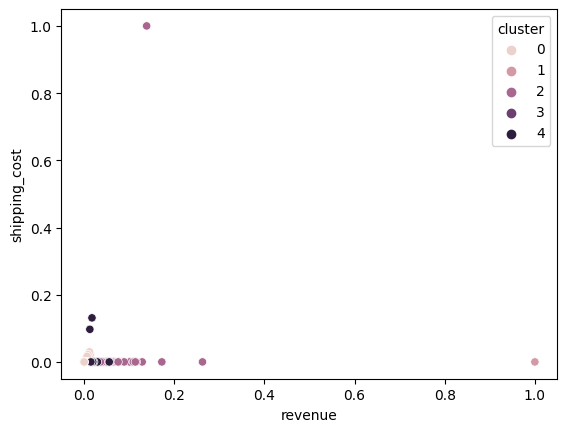

In [75]:
# Let's re-look into data after clustering, and it is clustered nicely
sns.scatterplot(x = 'revenue', y = 'shipping_cost', data=cluster, hue='cluster')

In [77]:
#lets see the population spread if we use 5 segment
cluster.groupby(['cluster']).count()

revenue  shipping_cost  total_project_value  price_per_item  \
cluster                                                                
0         157073         157073               157073          157073   
1             49             49                   49              49   
2              1              1                    1               1   
3            231            231                  231             231   
4           1760           1760                 1760            1760   

         quantity  price_total  free_shipping     ppn  weight_total  \
cluster                                                               
0          157073       157073         157073  157073        157073   
1              49           49             49      49            49   
2               1            1              1       1             1   
3             231          231            231     231           231   
4            1760         1760           1760    1760          1760   

         order_status_encode  payment_group_encode  shipping_agency_encode  \
cluster                                                                      
0                     157073                157073                  157073   
1                         49                    49                      49   
2                          1                     1                       1   
3                        231                   231                     231   
4                       1760                  1760                    1760   

         group_cat  
cluster             
0           157073  
1               49  
2                1  
3              231  
4             1760

<AxesSubplot: xlabel='cluster', ylabel='revenue'>

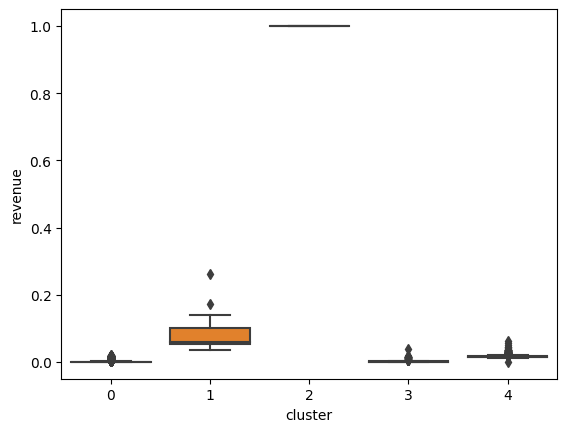

In [78]:
# lets check the data distribution of Total_buy
sns.boxplot (data =cluster , x ='cluster' , y ='revenue')

<AxesSubplot: xlabel='payment_group_encode', ylabel='revenue'>

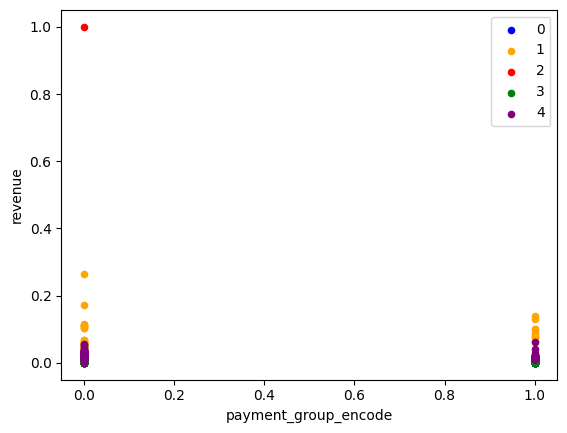

In [81]:
# Make scatter plot based on cluster then mix it in one figure with a more noticeable color
ax = cluster[cluster['cluster'] == 0].plot.scatter(x='payment_group_encode', y='revenue', c='blue', label='0')
ax = cluster[cluster['cluster'] == 1].plot.scatter(x='payment_group_encode', y='revenue', c='orange', label='1', ax=ax)
ax = cluster[cluster['cluster'] == 2].plot.scatter(x='payment_group_encode', y='revenue', c='red', label='2', ax=ax)
ax = cluster[cluster['cluster'] == 3].plot.scatter(x='payment_group_encode', y='revenue', c='green', label='3', ax=ax)
ax = cluster[cluster['cluster'] == 4].plot.scatter(x='payment_group_encode', y='revenue', c='purple', label='4', ax=ax)
ax

In [91]:
cluster_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 474570 entries, 0 to 474569
Data columns (total 33 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   po_number               474570 non-null  object        
 1   transaction_date        474570 non-null  datetime64[ns]
 2   order_id                474570 non-null  Int64         
 3   order_status            474570 non-null  object        
 4   payment_group           474570 non-null  object        
 5   shipping_agency         474570 non-null  object        
 6   shipping_cost           474570 non-null  Int64         
 7   total_project_value     474570 non-null  Int64         
 8   revenue                 474570 non-null  Int64         
 9   seller_id               474570 non-null  object        
 10  seller_category         474570 non-null  object        
 11  buyer_id                474570 non-null  object        
 12  seller_province         474570

In [100]:
# Tambahkan 'order_id' ke dalam daftar kolom yang dipilih
selected_columns = ["payment_group", "order_status", "shipping_agency", "seller_id", "po_number",
                    "transaction_date", "order_id", "product_name", "main_cat", "brand", "unit",
                    'seller_category', 'buyer_id', 'seller_province', 'seller_flag', 'buyer_city',
                    'product_id', 'seller_city', 'buyer_province', 'buyer_flag']

# Memilih kolom yang diinginkan dari cluster_df
cluster_df_selected = cluster_df[selected_columns]

# Pastikan bahwa 'order_id' di cluster_df adalah string jika dibutuhkan
cluster_df_selected['order_id'] = cluster_df_selected['order_id'].astype('str')

# Reset indeks di cluster dan konversi indeks menjadi kolom 'user_id'
cluster_reset = cluster.reset_index(drop=True)

# Merge cluster_df_selected dengan cluster berdasarkan 'order_id'
cluster_user_transaksi= cluster_df_selected.merge(cluster_reset[['cluster', 'order_id']], on='order_id', how='inner')

# Tampilkan hasilnya
cluster_user_transaksi.head()

/tmp/ipykernel_32/2367744577.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_df_selected['order_id'] = cluster_df_selected['order_id'].astype('str')


payment_group order_status shipping_agency                 seller_id  \
0           TOP      Selesai       mandiriva                 anonymous   
1           TOP      Selesai       mps-briva  631a50645b9755003d24d6b9   
2           TOP      Selesai       mps-briva  631a50645b9755003d24d6b9   
3           TOP      Selesai       mps-briva  631a50645b9755003d24d6b9   
4           TOP      Selesai       mps-briva  631a50645b9755003d24d6b9   

               po_number transaction_date order_id  \
0  PO-2022-12-12-8804434       2022-12-12   463776   
1  PO-2022-10-11-4866339       2022-10-11   426155   
2  PO-2022-10-11-4866339       2022-10-11   426155   
3  PO-2022-10-11-4866339       2022-10-11   426155   
4  PO-2022-10-11-4866339       2022-10-11   426155   

                                       product_name                 main_cat  \
0               Oli Compressor ATLAS Synthetic base              Pertukangan   
1  Neonbox LED dengan tiang Saung Pananjung Bandung         Jasa Advertising   
2          Wallpaper Ayam Goreng Bang Toung Jakarta  Jasa Percetakan & Media   
3               Backdrop Pondok Indah Cipala Banten  Jasa Percetakan & Media   
4              Alas Meja Pondok Indah Cipala Banten  Jasa Percetakan & Media   

             brand  ... seller_category                  buyer_id  \
0   ROTO Synthetic  ...           Kecil  631a5aafaa3096cbda250540   
1  Product_Unknown  ...           Kecil  631a5c7f8755a8a989600737   
2  Product_Unknown  ...           Kecil  631a5c7f8755a8a989600737   
3  Product_Unknown  ...           Kecil  631a5c7f8755a8a989600737   
4  Product_Unknown  ...           Kecil  631a5c7f8755a8a989600737   

  seller_province seller_flag       buyer_city                product_id  \
0         Jakarta      Seller  Jakarta Selatan  6323b5129845235dded08633   
1         Jakarta      Seller    Jakarta Pusat  631addafcdc00cf233d72eea   
2         Jakarta      Seller    Jakarta Pusat  631addafcdc00cf233d72ed1   
3         Jakarta      Seller    Jakarta Pusat  631addafcdc00cf233d72eca   
4         Jakarta      Seller    Jakarta Pusat  631addafcdc00cf233d72ec5   

       seller_city buyer_province buyer_flag cluster  
0    Jakarta Timur        Jakarta      Buyer       0  
1  Jakarta Selatan        Jakarta      Buyer       0  
2  Jakarta Selatan        Jakarta      Buyer       0  
3  Jakarta Selatan        Jakarta      Buyer       0  
4  Jakarta Selatan        Jakarta      Buyer       0  

[5 rows x 21 columns]

In [123]:
#check the gender proportion of each cluster
cluster_payment = cluster_user_transaksi.groupby(['cluster','payment_group']).count()
list_columns = cluster_payment.columns.to_list()
drop_columns = list_columns[7:21]
cluster_payment = cluster_payment.drop(columns=drop_columns, axis = 1)
cluster_payment

order_status  shipping_agency  seller_id  po_number  \
cluster payment_group                                                        
0       Direct               122402           122402     122402     122402   
        TOP                  348967           348967     348967     348967   
1       Direct                   14               14         14         14   
        TOP                      39               39         39         39   
2       TOP                       2                2          2          2   
3       Direct                   76               76         76         76   
        TOP                     219              219        219        219   
4       Direct                  140              140        140        140   
        TOP                    2706             2706       2706       2706   

                       transaction_date  order_id  product_name  
cluster payment_group                                            
0       Direct                   122402    122402        122402  
        TOP                      348967    348967        348967  
1       Direct                       14        14            14  
        TOP                          39        39            39  
2       TOP                           2         2             2  
3       Direct                       76        76            76  
        TOP                         219       219           219  
4       Direct                      140       140           140  
        TOP                        2706      2706          2706

In [124]:
#check the gender proportion of each cluster
cluster_order = cluster_user_transaksi.groupby(['cluster','order_status']).count()
list_columns = cluster_order.columns.to_list()
drop_columns = list_columns[7:21]
cluster_order = cluster_order.drop(columns=drop_columns, axis = 1)
cluster_order

payment_group  shipping_agency  seller_id  \
cluster order_status                                                            
0       Dibatalkan                          15026            15026      15026   
        Dibatalkan Otomatis                  1954             1954       1954   
        Dibayar                               226              226        226   
        Dikirim                              1462             1462       1462   
        Diproses Penjual                     1219             1219       1219   
        Disetujui                            1072             1072       1072   
        Diterima                              911              911        911   
        Ditolak                              3622             3622       3622   
        Ditolak Penjual                     12772            12772      12772   
        Expired                             13060            13060      13060   
        Menunggu Pembayaran                  7008             7008       7008   
        Menunggu Persetujuan                   76               76         76   
        Pembayaran Terverifikasi              114              114        114   
        Penagihan                            1012             1012       1012   
        Permintaan Perubahan                   73               73         73   
        Permintaan Upload Document             15               15         15   
        Refund                               2317             2317       2317   
        Refund Selesai                       2989             2989       2989   
        Revisi                                498              498        498   
        Selesai                            405613           405613     405613   
        Tagihan Diterima                        3                3          3   
        Tagihan Ditolak                       327              327        327   
1       Dibatalkan                              5                5          5   
        Ditolak Penjual                         3                3          3   
        Expired                                 1                1          1   
        Menunggu Pembayaran                     1                1          1   
        Selesai                                43               43         43   
2       Menunggu Pembayaran                     2                2          2   
3       Dibatalkan                              9                9          9   
        Dibatalkan Otomatis                    11               11         11   
        Dibayar                                 1                1          1   
        Dikirim                                 1                1          1   
        Diproses Penjual                        2                2          2   
        Disetujui                               1                1          1   
        Ditolak                                 2                2          2   
        Ditolak Penjual                        10               10         10   
        Expired                                19               19         19   
        Refund                                  1                1          1   
        Refund Selesai                          2                2          2   
        Revisi                                  1                1          1   
        Selesai                               235              235        235   
4       Dibatalkan                            111              111        111   
        Dibatalkan Otomatis                    10               10         10   
        Dikirim                                 6                6          6   
        Diproses Penjual                        8                8          8   
        Disetujui                               2                2          2   
        Diterima                                5                5          5   
        Ditolak                                20               20 

In [125]:
#check the gender proportion of each cluster
cluster_shipping_agency = cluster_user_transaksi.groupby(['cluster','shipping_agency']).count()
list_columns = cluster_shipping_agency.columns.to_list()
drop_columns = list_columns[7:21]
cluster_shipping_agency = cluster_shipping_agency.drop(columns=drop_columns, axis = 1)
cluster_shipping_agency

payment_group  order_status  seller_id  \
cluster shipping_agency                                                    
0       BTNATM                             1203          1203       1203   
        QREN                               5081          5081       5081   
        bni_ecoll_va                      60561         60561      60561   
        finpay_cc                           108           108        108   
        link_aja_wco                        563           563        563   
        mandiri_va_billing_fixed         106877        106877     106877   
        mandiriva                        141671        141671     141671   
        mps-bniva                         76275         76275      76275   
        mps-briva                         30060         30060      30060   
        mps-bsiva                           424           424        424   
        mps-btnva                          1609          1609       1609   
        mps-linkaja                         650           650        650   
        mps-qris                           3752          3752       3752   
        xbniva                             8253          8253       8253   
        xbriva                             5533          5533       5533   
        xcredit-card                       2069          2069       2069   
        xendit_va_bri                     25849         25849      25849   
        xendit_va_bsi                       826           826        826   
        xmandiriva                            5             5          5   
1       bni_ecoll_va                          3             3          3   
        mandiri_va_billing_fixed              9             9          9   
        mandiriva                             4             4          4   
        mps-bniva                             6             6          6   
        mps-briva                            10            10         10   
        xendit_va_bri                        21            21         21   
2       mandiri_va_billing_fixed              2             2          2   
3       bni_ecoll_va                         12            12         12   
        mandiri_va_billing_fixed             16            16         16   
        mandiriva                            49            49         49   
        mps-bniva                            94            94         94   
        mps-briva                            43            43         43   
        mps-linkaja                           5             5          5   
        mps-qris                             25            25         25   
        xbniva                               25            25         25   
        xbriva                                5             5          5   
        xcredit-card                          2             2          2   
        xendit_va_bri                        19            19         19   
4       bni_ecoll_va                        179           179        179   
        mandiri_va_billing_fixed            900           900        900   
        mandiriva                           865           865        865   
        mps-bniva                           373           373        373   
        mps-briva                           221           221        221   
        mps-bsiva                             2             2          2   
        xbniva                              111           111        111   
        xbriva                               24            24         24   
        xendit_va_bri                       171           171        171   

                                  po_number  transaction_date  order_id  \
cluster shipping_agency                                                   
0       BTNATM                         1203              1203      1203   
        QREN                           5081              5081      5081   
        bni_ecoll_va                  60561             60561     60561   
        fi

In [127]:
#check the gender proportion of each cluster
cluster_seller_category = cluster_user_transaksi.groupby(['cluster','seller_category']).count()
list_columns = cluster_seller_category.columns.to_list()
drop_columns = list_columns[7:21]
cluster_seller_category = cluster_seller_category.drop(columns=drop_columns, axis = 1)
cluster_seller_category

payment_group  order_status  shipping_agency  \
cluster seller_category                                                 
0       Besar                     3542          3542             3542   
        Kecil                   170527        170527           170527   
        Menengah                169275        169275           169275   
        Mikro                   127805        127805           127805   
        Swasta                     220           220              220   
1       Kecil                        6             6                6   
        Menengah                    46            46               46   
        Mikro                        1             1                1   
2       Besar                        2             2                2   
3       Kecil                       52            52               52   
        Menengah                   171           171              171   
        Mikro                       72            72               72   
4       Besar                       52            52               52   
        Kecil                      878           878              878   
        Menengah                   865           865              865   
        Mikro                     1045          1045             1045   
        Swasta                       6             6                6   

                         seller_id  po_number  transaction_date  order_id  
cluster seller_category                                                    
0       Besar                 3542       3542              3542      3542  
        Kecil               170527     170527            170527    170527  
        Menengah            169275     169275            169275    169275  
        Mikro               127805     127805            127805    127805  
        Swasta                 220        220               220       220  
1       Kecil                    6          6                 6         6  
        Menengah                46         46                46        46  
        Mikro                    1          1                 1         1  
2       Besar                    2          2                 2         2  
3       Kecil                   52         52                52        52  
        Menengah               171        171               171       171  
        Mikro                   72         72                72        72  
4       Besar                   52         52                52        52  
        Kecil                  878        878               878       878  
        Menengah               865        865               865       865  
        Mikro                 1045       1045              1045      1045  
        Swasta                   6          6                 6         6

In [128]:
#check the gender proportion of each cluster
cluster_main_cat = cluster_user_transaksi.groupby(['cluster','main_cat']).count()
list_columns = cluster_main_cat.columns.to_list()
drop_columns = list_columns[7:21]
cluster_main_cat = cluster_main_cat.drop(columns=drop_columns, axis = 1)
cluster_main_cat

payment_group  order_status  shipping_agency  \
cluster main_cat                                                               
0       Bahan Kimia                      2878          2878             2878   
        Barang Lainnya                  23004         23004            23004   
        Buku                              564           564              564   
        Dapur                            1558          1558             1558   
        Elektronik                      36030         36030            36030   
...                                       ...           ...              ...   
4       Pertanian & Peternakan             58            58               58   
        Pertukangan                       153           153              153   
        Rumah Tangga                       20            20               20   
        Sewa Gedung                        10            10               10   
        Souvenir & Merchandise             17            17               17   

                                seller_id  po_number  transaction_date  \
cluster main_cat                                                         
0       Bahan Kimia                  2878       2878              2878   
        Barang Lainnya              23004      23004             23004   
        Buku                          564        564               564   
        Dapur                        1558       1558              1558   
        Elektronik                  36030      36030             36030   
...                                   ...        ...               ...   
4       Pertanian & Peternakan         58         58                58   
        Pertukangan                   153        153               153   
        Rumah Tangga                   20         20                20   
        Sewa Gedung                    10         10                10   
        Souvenir & Merchandise         17         17                17   

                                order_id  
cluster main_cat                          
0       Bahan Kimia                 2878  
        Barang Lainnya             23004  
        Buku                         564  
        Dapur                       1558  
        Elektronik                 36030  
...                                  ...  
4       Pertanian & Peternakan        58  
        Pertukangan                  153  
        Rumah Tangga                  20  
        Sewa Gedung                   10  
        Souvenir & Merchandise        17  

[120 rows x 7 columns]

In [129]:
import pandas as pd

# Set option to display all rows
pd.set_option('display.max_rows', None)

# Cetak DataFrame cluster_main_cat
print(cluster_main_cat)

# Kembalikan opsi display.max_rows ke nilai default jika diperlukan
pd.reset_option('display.max_rows')

                                            payment_group  order_status  \
cluster main_cat                                                          
0       Bahan Kimia                                  2878          2878   
        Barang Lainnya                              23004         23004   
        Buku                                          564           564   
        Dapur                                        1558          1558   
        Elektronik                                  36030         36030   
        Fashion                                      1159          1159   
        Fashion Anak & Bayi                             3             3   
        Fashion Muslim                                163           163   
        Fashion Pria                                  451           451   
        Fashion Wanita                                335           335   
        Film & Musik                                   23            23   
        Gaming           

## Prediction Product Price

In [135]:
cluster_df.columns

Index(['po_number', 'transaction_date', 'order_id', 'order_status',
       'payment_group', 'shipping_agency', 'shipping_cost',
       'total_project_value', 'revenue', 'seller_id', 'seller_category',
       'buyer_id', 'seller_province', 'seller_city', 'seller_flag',
       'buyer_province', 'buyer_city', 'buyer_flag', 'product_id',
       'product_name', 'main_cat', 'brand', 'price_per_item', 'quantity',
       'price_total', 'free_shipping', 'ppn', 'weight_total', 'unit',
       'order_status_encode', 'payment_group_encode', 'shipping_agency_encode',
       'group_cat'],
      dtype='object')

In [136]:
df_preprocessed = cluster_df.copy()

In [137]:
# Daftar nama kolom yang ingin dihapus
columns_to_drop = ["payment_group", "order_status", "shipping_agency", "seller_id", "po_number",
                   "transaction_date", "order_id", "product_name", "main_cat", "brand", "unit",'seller_category','buyer_id','seller_province','seller_flag','buyer_city','product_id','seller_city','buyer_province','buyer_flag','seller_category','buyer_id','seller_province','seller_flag','buyer_city','product_id']

# Menghapus kolom-kolom tersebut dari DataFrame
df_preprocessed = df_preprocessed.drop(columns=columns_to_drop, axis=1)
df_preprocessed


shipping_cost  total_project_value  revenue  price_per_item  quantity  \
0                   0             53280000   399600      16000000.0         3   
1                   0             78775501   590816       6000000.0         1   
2                   0             78775501   590816       2348760.0         1   
3                   0             78775501   590816       1898750.0         1   
4                   0             78775501   590816       1021410.0         1   
...               ...                  ...      ...             ...       ...   
474565           9000                59000      442         50000.0         1   
474566          42000               142000     1065         20000.0         2   
474567          42000               142000     1065         20000.0         3   
474568              0                 6500       48          6500.0         1   
474569              0                27000      202         27000.0         1   

        price_total  free_shipping      ppn  weight_total  \
0          48000000              1  5280000         90000   
1           6000000              1   660000         17500   
2           2348760              1   258364         10967   
3           1898750              1   208862          6767   
4           1021410              1   112355          3440   
...             ...            ...      ...           ...   
474565        50000              0        0           200   
474566        40000              0        0          1000   
474567        60000              0        0          1500   
474568         6500              1        0            10   
474569        27000              1        0            10   

        order_status_encode  payment_group_encode  shipping_agency_encode  \
0                         0                     0                       0   
1                         0                     0                       1   
2                         0                     0                       1   
3                         0                     0                       1   
4                         0                     0                       1   
...                     ...                   ...                     ...   
474565                    0                     1                      13   
474566                    2                     1                       6   
474567                    2                     1                       6   
474568                    0                     1                      13   
474569                    0                     1                      13   

        group_cat  
0               0  
1               0  
2               0  
3               0  
4               0  
...           ...  
474565          4  
474566          4  
474567          4  
474568          1  
474569          1  

[474570 rows x 13 columns]

In [138]:
dataset_train = df_preprocessed
X = dataset_train.drop('price_total' , axis =1)
y = dataset_train['price_total']

X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state = 1)

dataset_test = df_preprocessed
dataset_test =dataset_test.drop(['price_total'] , axis = 1)
dataset_test.dropna(inplace = True)
dataset_test.head(5)

shipping_cost  total_project_value  revenue  price_per_item  quantity  \
0              0             53280000   399600      16000000.0         3   
1              0             78775501   590816       6000000.0         1   
2              0             78775501   590816       2348760.0         1   
3              0             78775501   590816       1898750.0         1   
4              0             78775501   590816       1021410.0         1   

   free_shipping      ppn  weight_total  order_status_encode  \
0              1  5280000         90000                    0   
1              1   660000         17500                    0   
2              1   258364         10967                    0   
3              1   208862          6767                    0   
4              1   112355          3440                    0   

   payment_group_encode  shipping_agency_encode  group_cat  
0                     0                       0          0  
1                     0                       1          0  
2                     0                       1          0  
3                     0                       1          0  
4                     0                       1          0

In [139]:
import plotly.express as px
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

# Assuming X_train and y_train are already defined in your environment

# Create and fit the RandomForestRegressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Get feature importances
feature_importances = model.feature_importances_

# Create a DataFrame to display feature names and their importance scores
importances_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
importances_df = importances_df.sort_values(by='Importance', ascending=False)

# Using Plotly to create a bar chart for feature importances
fig = px.bar(importances_df, 
             x='Importance', 
             y='Feature', 
             orientation='h', 
             color='Importance', 
             color_continuous_scale='Viridis')

# Updating layout for better readability
fig.update_layout(
    title='Feature Importance',
    xaxis_title='Importance',
    yaxis_title='Feature',
    height=600
)

# Showing the Plotly figure
fig.show()

## Using Neural Network

In [140]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Assuming df_preprocessed is your preprocessed dataset
df_preprocessed = df_preprocessed

# Prepare the data
X = df_preprocessed.drop('price_total', axis=1)
y = df_preprocessed['price_total']

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train).astype(np.float32)
X_test_scaled = scaler.transform(X_test).astype(np.float32)

# Convert y_train and y_test to numpy arrays of type float32
y_train = np.array(y_train).astype(np.float32)
y_test = np.array(y_test).astype(np.float32)

# Build the neural network model
def build_model(input_shape):
    model = Sequential()
    model.add(Dense(64, input_dim=input_shape, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1))  # Output layer for regression

    model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
    return model

model = build_model(X_train_scaled.shape[1])

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the model
mse = model.evaluate(X_test_scaled, y_test)
rmse = np.sqrt(mse)

print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)


Epoch 1/100


2024-01-09 03:34:21.518585: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-01-09 03:34:21.527092: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2256] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


9492/9492 [==============================] - 10s 974us/step - loss: 1570859995103232.0000 - val_loss: 1257217323958272.0000
Epoch 2/100
9492/9492 [==============================] - 9s 989us/step - loss: 1557797791596544.0000 - val_loss: 1239761637343232.0000
Epoch 3/100
9492/9492 [==============================] - 10s 1ms/step - loss: 1526255685992448.0000 - val_loss: 1204391642136576.0000
Epoch 4/100
9492/9492 [==============================] - 9s 964us/step - loss: 1478204799844352.0000 - val_loss: 1153915710078976.0000
Epoch 5/100
9492/9492 [==============================] - 9s 1ms/step - loss: 1409751342645248.0000 - val_loss: 1096749494042624.0000
Epoch 6/100
9492/9492 [==============================] - 10s 1ms/step - loss: 1334689675608064.0000 - val_loss: 1036098851569664.0000
Epoch 7/100
9492/9492 [==============================] - 9s 967us/step - loss: 1261823944818688.0000 - val_loss: 972666076921856.0000
Epoch 8/100
9492/9492 [==============================] - 9s 994us/step 

## Hypertuning Parameter Using KERAS

In [141]:
!pip install keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.9/128.9 kB 22.7 MB/s eta 0:00:00


In [142]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
from keras_tuner import RandomSearch
from tensorflow.keras.callbacks import EarlyStopping

# Assuming df_preprocessed is already loaded
# df_preprocessed = pd.read_csv('path_to_your_preprocessed_dataset.csv')

# Prepare the data
X = df_preprocessed.drop('price_total', axis=1).astype(np.float32)
y = df_preprocessed['price_total'].astype(np.float32)

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Callback for early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

# Build the neural network model with hyperparameters
def build_model(hp):
    model = Sequential()
    for i in range(hp.Int('num_layers', 1, 3)):
        model.add(Dense(units=hp.Int('units_' + str(i), min_value=32, max_value=512, step=32),
                        activation=hp.Choice('activation', ['relu', 'tanh']),
                        input_dim=X_train_scaled.shape[1]))
    model.add(Dense(1))  # Output layer for regression
    model.compile(optimizer=Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
                  loss='mean_squared_error')
    return model

# Hyperparameter tuner setup
tuner = RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=5,
    executions_per_trial=3,
    directory='model_tuning',
    project_name='house_price_prediction'
)

# Perform hyperparameter tuning
tuner.search(X_train_scaled, y_train, epochs=10, validation_split=0.2, callbacks=[early_stopping], verbose=1)

# Get the best model
best_model = tuner.get_best_models(num_models=1)[0]

# Evaluate the best model
mse = best_model.evaluate(X_test_scaled, y_test)
rmse = np.sqrt(mse)

print('Best Model Mean Squared Error:', mse)
print('Best Model Root Mean Squared Error:', rmse)

Reloading Tuner from model_tuning/house_price_prediction/tuner0.json
2967/2967 [==============================] - 3s 828us/step - loss: 1312238807810048.0000
Best Model Mean Squared Error: 1312238807810048.0
Best Model Root Mean Squared Error: 36224836.89142089


Epoch 1/100


/usr/local/lib/python3.9/dist-packages/keras/src/engine/data_adapter.py:1808: FutureWarning:

The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.



9492/9492 [==============================] - 10s 982us/step - loss: 1570498412544000.0000 - val_loss: 1256838024658944.0000
Epoch 2/100
9492/9492 [==============================] - 9s 960us/step - loss: 1557070599946240.0000 - val_loss: 1238347787796480.0000
Epoch 3/100
9492/9492 [==============================] - 10s 1ms/step - loss: 1522308611047424.0000 - val_loss: 1198672222093312.0000
Epoch 4/100
9492/9492 [==============================] - 10s 1ms/step - loss: 1470117376425984.0000 - val_loss: 1149431361568768.0000
Epoch 5/100
9492/9492 [==============================] - 10s 1ms/step - loss: 1399219143311360.0000 - val_loss: 1084724458029056.0000
Epoch 6/100
9492/9492 [==============================] - 10s 1ms/step - loss: 1318592809271296.0000 - val_loss: 1022315764645888.0000
Epoch 7/100
9492/9492 [==============================] - 9s 993us/step - loss: 1232195515580416.0000 - val_loss: 950452438958080.0000
Epoch 8/100
9492/9492 [==============================] - 10s 1ms/step -

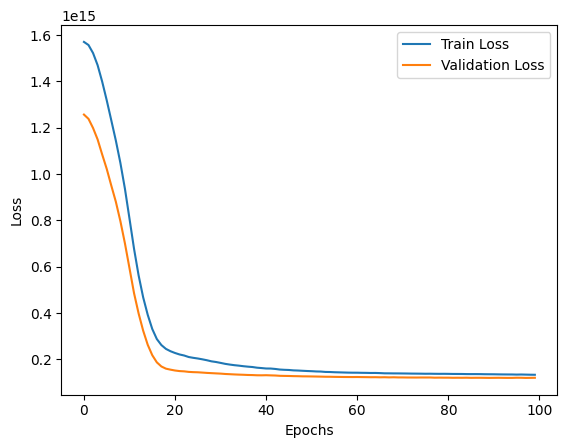

In [158]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error

# Load your preprocessed dataset
# df_preprocessed = pd.read_csv('path_to_your_preprocessed_dataset.csv')

# Prepare the data
X = df_preprocessed.drop('price_total', axis=1).astype(np.float32)
y = df_preprocessed['price_total'].astype(np.float32)

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build your neural network model
model = Sequential()
model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))  # Output layer for regression

# Compile the model with your choice of optimizer and loss function
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Set up early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping], verbose=1)

# Evaluate the model
y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)

# Plot training and validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Prediction Model

In [143]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Load your preprocessed dataset
# df_preprocessed = pd.read_csv('path_to_your_preprocessed_dataset.csv')
df_preprocessed = df_preprocessed  # Assuming df_preprocessed is already loaded

# Prepare the data
X = df_preprocessed.drop('price_total', axis=1)
y = df_preprocessed['price_total']

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train).astype(np.float32)
X_test_scaled = scaler.transform(X_test).astype(np.float32)

# Convert y_train and y_test to float32
y_train = y_train.astype(np.float32)
y_test = y_test.astype(np.float32)

# Function to build model with optimized hyperparameters
def build_optimized_model():
    optimized_units = 128  # example value
    optimized_learning_rate = 0.001  # example value

    model = Sequential()
    model.add(Dense(optimized_units, activation='relu', input_dim=X_train_scaled.shape[1]))
    model.add(Dense(optimized_units, activation='relu'))
    model.add(Dense(1))  # Output layer for regression

    model.compile(optimizer=Adam(learning_rate=optimized_learning_rate), loss='mean_squared_error')
    return model

# Build and train the optimized model
optimized_model = build_optimized_model()
optimized_model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, verbose=1)

# Evaluate the model
mse = optimized_model.evaluate(X_test_scaled, y_test)
rmse = np.sqrt(mse)
print('Optimized Model Mean Squared Error:', mse)
print('Optimized Model Root Mean Squared Error:', rmse)

# Make predictions
predictions = optimized_model.predict(X_test_scaled)

# Display some example predictions
for i in range(5):
    print(f'Actual Price: {y_test.iloc[i]}, Predicted Price: {predictions[i][0]}')

Epoch 1/100
11865/11865 [==============================] - 12s 986us/step - loss: 1486271285297152.0000
Epoch 2/100
11865/11865 [==============================] - 12s 991us/step - loss: 1341543369670656.0000
Epoch 3/100
11865/11865 [==============================] - 11s 958us/step - loss: 1133121491697664.0000
Epoch 4/100
11865/11865 [==============================] - 11s 953us/step - loss: 878207398051840.0000
Epoch 5/100
11865/11865 [==============================] - 12s 978us/step - loss: 561515132354560.0000
Epoch 6/100
11865/11865 [==============================] - 11s 964us/step - loss: 357197733167104.0000
Epoch 7/100
11865/11865 [==============================] - 11s 939us/step - loss: 262612403093504.0000
Epoch 8/100
11865/11865 [==============================] - 12s 980us/step - loss: 229327396405248.0000
Epoch 9/100
11865/11865 [==============================] - 11s 964us/step - loss: 206314173104128.0000
Epoch 10/100
11865/11865 [==============================] - 11s 950us/

## Feature "Price_per_item" Using Neural Network

In [146]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Assuming df_preprocessed1 is your first preprocessed dataset
df_preprocessed1 = df_preprocessed

# Prepare the data for the first dataset
X1 = df_preprocessed1.drop('price_per_item', axis=1)
y1 = df_preprocessed1['price_per_item']

# Splitting the first dataset
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=1)

# Standardize the data for the first dataset
scaler1 = StandardScaler()
X_train_scaled1 = scaler1.fit_transform(X_train1).astype(np.float32)
X_test_scaled1 = scaler1.transform(X_test1).astype(np.float32)

# Convert y_train and y_test to numpy arrays of type float32 for the first dataset
y_train1 = np.array(y_train1).astype(np.float32)
y_test1 = np.array(y_test1).astype(np.float32)

# Build the neural network model for the first dataset
def build_model1(input_shape):
    model1 = Sequential()
    model1.add(Dense(64, input_dim=input_shape, activation='relu'))
    model1.add(Dense(32, activation='relu'))
    model1.add(Dense(1))  # Output layer for regression

    model1.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
    return model1

model1 = build_model1(X_train_scaled1.shape[1])

# Train the model for the first dataset
history1 = model1.fit(X_train_scaled1, y_train1, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the model for the first dataset
mse1 = model1.evaluate(X_test_scaled1, y_test1)
rmse1 = np.sqrt(mse1)

print('Mean Squared Error for the first dataset:', mse1)
print('Root Mean Squared Error for the first dataset:', rmse1)

Epoch 1/100
9492/9492 [==============================] - 11s 1ms/step - loss: 1222829936738304.0000 - val_loss: 986543049146368.0000
Epoch 2/100
9492/9492 [==============================] - 9s 994us/step - loss: 1214096791830528.0000 - val_loss: 974941268738048.0000
Epoch 3/100
9492/9492 [==============================] - 9s 986us/step - loss: 1196325961990144.0000 - val_loss: 954720092946432.0000
Epoch 4/100
9492/9492 [==============================] - 9s 991us/step - loss: 1163792121593856.0000 - val_loss: 924453726846976.0000
Epoch 5/100
9492/9492 [==============================] - 9s 985us/step - loss: 1123309974454272.0000 - val_loss: 887009665089536.0000
Epoch 6/100
9492/9492 [==============================] - 10s 1ms/step - loss: 1073948989063168.0000 - val_loss: 847502207090688.0000
Epoch 7/100
9492/9492 [==============================] - 10s 1ms/step - loss: 1024164882284544.0000 - val_loss: 806936643633152.0000
Epoch 8/100
9492/9492 [==============================] - 10s 1ms/

## Priceperitem Hypertuning Parameter

In [147]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
from keras_tuner import RandomSearch
from tensorflow.keras.callbacks import EarlyStopping

# Assuming df_preprocessed1 is your first preprocessed dataset
df_preprocessed1 = df_preprocessed

# Prepare the data for the first dataset
X1 = df_preprocessed1.drop('price_per_item', axis=1)
y1 = df_preprocessed1['price_per_item']

# Splitting the first dataset
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=1)

# Standardize the data for the first dataset
scaler1 = StandardScaler()
X_train_scaled1 = scaler1.fit_transform(X_train1).astype(np.float32)
X_test_scaled1 = scaler1.transform(X_test1).astype(np.float32)

# Convert y_train and y_test to numpy arrays of type float32 for the first dataset
y_train1 = np.array(y_train1).astype(np.float32)
y_test1 = np.array(y_test1).astype(np.float32)

# Callback for early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

# Build the neural network model for the first dataset with hyperparameters
def build_model1(hp):
    model = Sequential()
    for i in range(hp.Int('num_layers', 1, 3)):
        model.add(Dense(units=hp.Int('units_' + str(i), min_value=32, max_value=512, step=32),
                        activation=hp.Choice('activation', ['relu', 'tanh']),
                        input_dim=X_train_scaled1.shape[1]))
    model.add(Dense(1))  # Output layer for regression
    model.compile(optimizer=Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
                  loss='mean_squared_error')
    return model

# Hyperparameter tuner setup for the first dataset
tuner1 = RandomSearch(
    build_model1,
    objective='val_loss',
    max_trials=5,
    executions_per_trial=3,
    directory='model_tuning',
    project_name='house_price_prediction1'  # Change the project_name
)

# Perform hyperparameter tuning for the first dataset
tuner1.search(X_train_scaled1, y_train1, epochs=10, validation_split=0.2, callbacks=[early_stopping], verbose=1)

# Get the best model for the first dataset
best_model1 = tuner1.get_best_models(num_models=1)[0]

# Evaluate the best model for the first dataset
mse1 = best_model1.evaluate(X_test_scaled1, y_test1)
rmse1 = np.sqrt(mse1)

print('Best Model Mean Squared Error for the first dataset:', mse1)
print('Best Model Root Mean Squared Error for the first dataset:', rmse1)


Trial 5 Complete [00h 04m 48s]
val_loss: 988717152643754.6

Best val_loss So Far: 369603052743338.7
Total elapsed time: 00h 34m 15s
2967/2967 [==============================] - 3s 850us/step - loss: 372427016110080.0000
Best Model Mean Squared Error for the first dataset: 372427016110080.0
Best Model Root Mean Squared Error for the first dataset: 19298368.224025574


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error

# Load your preprocessed dataset
# df_preprocessed = pd.read_csv('path_to_your_preprocessed_dataset.csv')

# Prepare the data
X = df_preprocessed.drop('price_total', axis=1).astype(np.float32)
y = df_preprocessed['price_total'].astype(np.float32)

# Splitting the dataset
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.2, random_state=1)

# Standardize the data
scaler = StandardScaler()
X_train_scaled2 = scaler.fit_transform(X_train)
X_test_scaled2 = scaler.transform(X_test)

# Build your neural network model
model = Sequential()
model.add(Dense(64, input_dim=X_train_scaled2.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))  # Output layer for regression

# Compile the model with your choice of optimizer and loss function
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Set up early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(X_train_scaled2, y_train2, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping], verbose=1)

# Evaluate the model
y_pred = model.predict(X_test_scaled2)
mse2 = mean_squared_error(y_test2, y_pred)
rmse2 = np.sqrt(mse2)  # Corrected to use mse2

print('Mean Squared Error:', mse2)
print('Root Mean Squared Error:', rmse2)

# Plot training and validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Epoch 1/100


/usr/local/lib/python3.9/dist-packages/keras/src/engine/data_adapter.py:1808: FutureWarning:

The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.



9492/9492 [==============================] - 10s 984us/step - loss: 1570455865524224.0000 - val_loss: 1255950174388224.0000
Epoch 2/100
9492/9492 [==============================] - 11s 1ms/step - loss: 1552639133220864.0000 - val_loss: 1230126415085568.0000
Epoch 3/100
9492/9492 [==============================] - 11s 1ms/step - loss: 1513236834811904.0000 - val_loss: 1187346527551488.0000
Epoch 4/100
9492/9492 [==============================] - 10s 1ms/step - loss: 1444023168401408.0000 - val_loss: 1122361860423680.0000
Epoch 5/100
9492/9492 [==============================] - 11s 1ms/step - loss: 1361806488502272.0000 - val_loss: 1055373121290240.0000
Epoch 6/100
9492/9492 [==============================] - 9s 1000us/step - loss: 1281420404195328.0000 - val_loss: 985832567603200.0000
Epoch 7/100
9492/9492 [==============================] - 10s 1ms/step - loss: 1184247305994240.0000 - val_loss: 909486235582464.0000
Epoch 8/100
9492/9492 [==============================] - 9s 959us/step -

In [160]:
# Evaluate the optimized model
# Making predictions
predictions = best_model.predict(X_test_scaled1)  # Use best_model instead of optimized_model

# Showing some example predictions
for i in range(5):
    print(f'Actual Price: {y_test.iloc[i]}, Predicted Price: {predictions[i][0]}')

2967/2967 [==============================] - 3s 843us/step
Actual Price: 3800000.0, Predicted Price: 216754.140625
Actual Price: 10165000.0, Predicted Price: 216754.140625
Actual Price: 185000.0, Predicted Price: 216754.140625
Actual Price: 900000.0, Predicted Price: 216754.140625
Actual Price: 78000.0, Predicted Price: 216754.140625
